#### –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –∏–∑—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [1]:
pip install scikit-learn==1.3.2 -q 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap -q 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost lightgbm catboost -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import re
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
from pandas.api.types import is_integer_dtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_score, recall_score
import shap
from typing import Optional, List

import warnings
warnings.filterwarnings('ignore')

In [6]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
TARGET_COL = "heart_attack_risk_binary"

In [7]:
heart_train = pd.read_csv('C:/Users/malen/OneDrive/Desktop/data_since/–º–∞—Å—Ç–µ—Ä—Å–∫–∞—è 1/data/raw/heart_train.csv', index_col='id')
heart_train.head()

Unnamed: 0       Age  Cholesterol  Heart rate  Diabetes  Family History  \
id                                                                              
2664           0  0.359551     0.732143    0.074244       1.0             1.0   
9287           1  0.202247     0.325000    0.047663       1.0             1.0   
5379           2  0.606742     0.860714    0.055912       1.0             0.0   
8222           3  0.730337     0.007143    0.053162       0.0             0.0   
4047           4  0.775281     0.757143    0.021998       0.0             0.0   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
id                                                                    ...   
2664      1.0      1.0                  1.0                 0.535505  ...   
9287      0.0      0.0                  1.0                 0.068690  ...   
5379      1.0      1.0                  1.0                 0.944001  ...   
8222      1.0      0.0                  1.0                 0.697023  ...   
4047      1.0      0.0                  1.0                 0.412878  ...   

      Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
id                                                                          
2664       0.979221                              3.0             0.333333   
9287       0.515584                              3.0             0.833333   
5379       0.012987                              2.0             1.000000   
8222       0.131169                              0.0             0.333333   
4047       0.070130                              5.0             1.000000   

      Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  Gender  \
id                                                                          
2664                         0.0     0.227018  0.048229  0.036512    Male   
9287                         0.0     0.150198  0.017616  0.000194  Female   
5379                         0.0     0.227018  0.048229  0.036512  Female   
8222                         1.0     0.227018  0.048229  0.036512  Female   
4047                         1.0     0.227018  0.048229  0.036512    Male   

      Systolic blood pressure  Diastolic blood pressure  
id                                                       
2664                 0.212903                  0.709302  
9287                 0.412903                  0.569767  
5379                 0.238710                  0.220930  
8222                 0.348387                  0.267442  
4047                 0.619355                  0.441860  

[5 rows x 27 columns]

In [8]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8685 entries, 2664 to 7270
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use        

heart_train —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 8685 –∑–∞–ø–∏—Å–µ–π –∏ 27 —Å—Ç–æ–ª–±—Ü–æ–≤, 243 –ø—Ä–æ–ø—É—Å–∫–∞ –≤ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö. –¢—Ä–µ–±—É–µ—Ç—Å—è –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö object.

In [9]:
heart_test = pd.read_csv('C:/Users/malen/OneDrive/Desktop/data_since/–º–∞—Å—Ç–µ—Ä—Å–∫–∞—è 1/data/raw/heart_test.csv', index_col='id')
heart_test.head()

Unnamed: 0       Age  Cholesterol  Heart rate  Diabetes  Family History  \
id                                                                              
7746           0  0.494382     0.264286    0.062328       0.0             1.0   
4202           1  0.224719     0.953571    0.082493       1.0             0.0   
6632           2  0.629213     0.092857    0.064161       0.0             1.0   
4639           3  0.460674     0.567857    0.055912       1.0             1.0   
4825           4  0.719101     0.485714    0.022915       1.0             0.0   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
id                                                                    ...   
7746      1.0      1.0                  1.0                 0.361618  ...   
4202      0.0      1.0                  0.0                 0.996483  ...   
6632      1.0      1.0                  0.0                 0.995561  ...   
4639      1.0      1.0                  1.0                 0.437277  ...   
4825      1.0      0.0                  1.0                 0.514920  ...   

           BMI  Triglycerides  Physical Activity Days Per Week  \
id                                                               
7746  0.283490       0.306494                              1.0   
4202  0.467036       0.087013                              0.0   
6632  0.409366       0.205195                              7.0   
4639  0.910261       0.163636                              0.0   
4825  0.758924       0.580519                              5.0   

      Sleep Hours Per Day  Blood sugar     CK-MB  Troponin  Gender  \
id                                                                   
7746             0.333333     0.227018  0.048229  0.036512    Male   
4202             0.166667     0.227018  0.048229  0.036512  Female   
6632             1.000000     0.102767  0.002666  0.088455    Male   
4639             0.666667     0.203557  0.056390  0.271774  Female   
4825             0.000000     0.227018  0.048229  0.036512    Male   

      Systolic blood pressure  Diastolic blood pressure  
id                                                       
7746                 0.283871                  0.372093  
4202                 0.703226                  0.441860  
6632                 0.458065                  0.779070  
4639                 0.741935                  0.255814  
4825                 0.412903                  0.395349  

[5 rows x 26 columns]

In [10]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 7746 to 6521
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use         

heart_test —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 8685 –∑–∞–ø–∏—Å–µ–π –∏ 26 —Å—Ç–æ–ª–±—Ü–æ–≤, 31 –ø—Ä–æ–ø—É—Å–∫ –≤ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö. –¢—Ä–µ–±—É–µ—Ç—Å—è –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö object.

In [11]:
heart_train['Unnamed: 0'].value_counts()

Unnamed: 0
0       1
5785    1
5799    1
5798    1
5797    1
       ..
2890    1
2889    1
2888    1
2887    1
8684    1
Name: count, Length: 8685, dtype: int64

In [12]:
heart_test['Unnamed: 0'].value_counts()

Unnamed: 0
0      1
604    1
636    1
637    1
638    1
      ..
326    1
327    1
328    1
329    1
965    1
Name: count, Length: 966, dtype: int64

–¥–∞–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è –¥–ª—è –Ω—É–º–µ—Ä–∞—Ü–∏–∏ —Å—Ç—Ä–æ–∫ –≤ —Ç–∞–±–ª–∏—Ü–µ, –ø–æ—ç—Ç–æ–º—É –æ–Ω –Ω–∞–º –Ω–µ –Ω—É–∂–µ–Ω.

In [13]:
heart_train = heart_train.drop('Unnamed: 0', axis=1)
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8685 entries, 2664 to 7270
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8685 non-null   float64
 1   Cholesterol                      8685 non-null   float64
 2   Heart rate                       8685 non-null   float64
 3   Diabetes                         8442 non-null   float64
 4   Family History                   8442 non-null   float64
 5   Smoking                          8442 non-null   float64
 6   Obesity                          8442 non-null   float64
 7   Alcohol Consumption              8442 non-null   float64
 8   Exercise Hours Per Week          8685 non-null   float64
 9   Diet                             8685 non-null   int64  
 10  Previous Heart Problems          8442 non-null   float64
 11  Medication Use                   8442 non-null   float64
 12  Stress Level          

In [14]:
heart_test = heart_test.drop('Unnamed: 0', axis=1)
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 7746 to 6521
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              966 non-null    float64
 1   Cholesterol                      966 non-null    float64
 2   Heart rate                       966 non-null    float64
 3   Diabetes                         935 non-null    float64
 4   Family History                   935 non-null    float64
 5   Smoking                          935 non-null    float64
 6   Obesity                          935 non-null    float64
 7   Alcohol Consumption              935 non-null    float64
 8   Exercise Hours Per Week          966 non-null    float64
 9   Diet                             966 non-null    int64  
 10  Previous Heart Problems          935 non-null    float64
 11  Medication Use                   935 non-null    float64
 12  Stress Level           

#### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–í—ã–ø–æ–ª–Ω–∏–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö. –ò–∑–º–µ–Ω–∏–º –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö, –≥–¥–µ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ. –ü—Ä–æ–≤–µ–¥–µ–º –ø—Ä–æ–≤–µ—Ä–∫—É –Ω–∞ —è–≤–Ω—ã–µ –∏ –Ω–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ –¥–∞–Ω–Ω—ã—Ö.

##### –ò–∑–º–µ–Ω–µ–Ω–∏–µ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤

–ü—Ä–∏–≤–µ–¥–µ–º –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –∑–º–µ–∏–Ω–æ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

In [15]:
def to_snake_case(name):
    name = name.strip()
    name = re.sub(r'[\s\-]+', '_', name)               # –ø—Ä–æ–±–µ–ª—ã –∏ –¥–µ—Ñ–∏—Å—ã ‚Üí _
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name) # camelCase ‚Üí camel_case
    name = re.sub(r'[^\w_]', '', name)                  # —É–±—Ä–∞—Ç—å –ª–∏—à–Ω–∏–µ —Å–∏–º–≤–æ–ª—ã
    return name.lower()

heart_train.columns = [to_snake_case(c) for c in heart_train.columns]
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8685 entries, 2664 to 7270
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8685 non-null   float64
 1   cholesterol                      8685 non-null   float64
 2   heart_rate                       8685 non-null   float64
 3   diabetes                         8442 non-null   float64
 4   family_history                   8442 non-null   float64
 5   smoking                          8442 non-null   float64
 6   obesity                          8442 non-null   float64
 7   alcohol_consumption              8442 non-null   float64
 8   exercise_hours_per_week          8685 non-null   float64
 9   diet                             8685 non-null   int64  
 10  previous_heart_problems          8442 non-null   float64
 11  medication_use                   8442 non-null   float64
 12  stress_level          

In [16]:
heart_test.columns = [to_snake_case(c) for c in heart_test.columns]
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 7746 to 6521
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              966 non-null    float64
 1   cholesterol                      966 non-null    float64
 2   heart_rate                       966 non-null    float64
 3   diabetes                         935 non-null    float64
 4   family_history                   935 non-null    float64
 5   smoking                          935 non-null    float64
 6   obesity                          935 non-null    float64
 7   alcohol_consumption              935 non-null    float64
 8   exercise_hours_per_week          966 non-null    float64
 9   diet                             966 non-null    int64  
 10  previous_heart_problems          935 non-null    float64
 11  medication_use                   935 non-null    float64
 12  stress_level           

##### –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [17]:
heart_train[heart_train['stress_level'].isna()]

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
id                                                                           
9528  0.449438      0.49978    0.063245       NaN             NaN      NaN   
9640  0.370787      0.49978    0.066911       NaN             NaN      NaN   
9515  0.629213      0.49978    0.073327       NaN             NaN      NaN   
9491  0.516854      0.49978    0.045830       NaN             NaN      NaN   
9448  0.269663      0.49978    0.035747       NaN             NaN      NaN   
...        ...          ...         ...       ...             ...      ...   
9455  0.719101      0.49978    0.049496       NaN             NaN      NaN   
9506  0.651685      0.49978    0.036664       NaN             NaN      NaN   
9474  0.651685      0.49978    0.054079       NaN             NaN      NaN   
9467  0.606742      0.49978    0.059578       NaN             NaN      NaN   
9555  0.629213      0.49978    0.057745       NaN             NaN      NaN   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  ...  \
id                                                                 ...   
9528      NaN                  NaN                  0.50211     3  ...   
9640      NaN                  NaN                  0.50211     3  ...   
9515      NaN                  NaN                  0.50211     3  ...   
9491      NaN                  NaN                  0.50211     3  ...   
9448      NaN                  NaN                  0.50211     3  ...   
...       ...                  ...                      ...   ...  ...   
9455      NaN                  NaN                  0.50211     3  ...   
9506      NaN                  NaN                  0.50211     3  ...   
9474      NaN                  NaN                  0.50211     3  ...   
9467      NaN                  NaN                  0.50211     3  ...   
9555      NaN                  NaN                  0.50211     3  ...   

      triglycerides  physical_activity_days_per_week  sleep_hours_per_day  \
id                                                                          
9528       0.503603                              NaN             0.504621   
9640       0.503603                              NaN             0.504621   
9515       0.503603                              NaN             0.504621   
9491       0.503603                              NaN             0.504621   
9448       0.503603                              NaN             0.504621   
...             ...                              ...                  ...   
9455       0.503603                              NaN             0.504621   
9506       0.503603                              NaN             0.504621   
9474       0.503603                              NaN             0.504621   
9467       0.503603                              NaN             0.504621   
9555       0.503603                              NaN             0.504621   

      heart_attack_risk_binary  blood_sugar     ck_mb  troponin  gender  \
id                                                                        
9528                       0.0     0.233202  0.026692  0.000777     1.0   
9640                       0.0     0.154150  0.004702  0.042043     1.0   
9515                       0.0     0.256917  0.012310  0.000777     0.0   
9491                       0.0     0.559289  0.006704  0.000291     0.0   
9448                       0.0     0.112648  0.051218  0.000485     0.0   
...                        ...          ...       ...       ...     ...   
9455                       0.0     0.138340  0.004034  0.003204     1.0   
9506                       0.0     0.239130  0.055790  0.060783     1.0   
9474                       0.0     0.276680  0.008673  0.150403     1.0   
9467                       0.0     0.156126  0.057692  0.000583     0.0   
9555                       0.0     0.148221  0.004001  0.067968     1.0   

      systolic_blood_pressure  diastolic_blood_pressure

–í –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–æ–ø—É—Å–∫–∏ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –≤ 9 –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö:
diabetes, family_history, smoking, obesity, alcohol_consumption,
physical_activity_days_per_week, previous_heart_problems, medication_use, stress_level.

–í—Å–µ –æ–Ω–∏ —Å–≤—è–∑–∞–Ω—ã —Å –æ–±—Ä–∞–∑–æ–º –∂–∏–∑–Ω–∏ –∏ –∏—Å—Ç–æ—Ä–∏–µ–π –±–æ–ª–µ–∑–Ω–∏ –ø–∞—Ü–∏–µ–Ω—Ç–∞.
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –≤–æ –≤—Å–µ—Ö —ç—Ç–∏—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö ‚Äî 243 –∑–∞–ø–∏—Å–∏ (‚âà 2,8% –¥–∞—Ç–∞—Å–µ—Ç–∞). –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–µ —Å–ª—É—á–∞–π–Ω—ã, –∞ –≤–æ–∑–Ω–∏–∫–∞—é—Ç ¬´–ø–∞–∫–µ—Ç–æ–º¬ª –¥–ª—è —Ü–µ–ª—ã—Ö —Å—Ç—Ä–æ–∫, —á—Ç–æ, –≤–µ—Ä–æ—è—Ç–Ω–æ, —Å–≤—è–∑–∞–Ω–æ —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏ —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–µ–ø–æ–ª–Ω—ã–µ –∞–Ω–∫–µ—Ç—ã –∏–ª–∏ –ø–∞—Ü–∏–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–º –Ω–µ –∑–∞–¥–∞–≤–∞–ª–∏ —ç—Ç–∏ –≤–æ–ø—Ä–æ—Å—ã).

–ü–æ—Ç–µ—Ä—è 2,8% —Å—Ç—Ä–æ–∫ —Å–Ω–∏–∑–∏—Ç —Ä–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –º–æ–∂–µ—Ç —É–±—Ä–∞—Ç—å —Ü–µ–ª—É—é –ø–æ–¥–≥—Ä—É–ø–ø—É –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤, —á—Ç–æ –ø—Ä–∏–≤–µ–¥—ë—Ç –∫ —Å–º–µ—â–µ–Ω–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–í —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤–æ–∑–º–æ–∂–Ω—ã —Ç–∞–∫–∏–µ –∂–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∏ –µ—Å–ª–∏ –º—ã –∏—Ö –≤—ã–±—Ä–æ—Å–∏–º –∏–∑ train, –º–æ–¥–µ–ª—å –Ω–µ –Ω–∞—É—á–∏—Ç—Å—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å —Ç–∞–∫–∏–µ —Å–ª—É—á–∞–∏.

–ü—Ä–æ–ø—É—Å–∫–∏ —Å–æ–¥–µ—Ä–∂–∞—Ç –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –ø–æ–ª–µ–∑–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é ‚Äî —Å–∞–º —Ñ–∞–∫—Ç, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã, –º–æ–∂–µ—Ç –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞—Ç—å —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —Å–µ—Ä–¥–µ—á–Ω–æ–≥–æ –ø—Ä–∏—Å—Ç—É–ø–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–∞—Ü–∏–µ–Ω—Ç—ã —Å –Ω–µ–ø–æ–ª–Ω–æ–π –º–µ–¥–∏—Ü–∏–Ω—Å–∫–æ–π –∏—Å—Ç–æ—Ä–∏–µ–π).

–°—Ç—Ä–∞—Ç–µ–≥–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ NaN:
- –°–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤—Å–µ —Å—Ç—Ä–æ–∫–∏, –≤–∫–ª—é—á–∞—è —Ç–µ, –≥–¥–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏.
- –î–æ–±–∞–≤–∏—Ç—å –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ __was_missing –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ 9 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ ‚Äî 1, –µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç, –∏ 0, –µ—Å–ª–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç –º–æ–¥–µ–ª–∏ —É—á–∏—Ç—ã–≤–∞—Ç—å —Å–∞–º —Ñ–∞–∫—Ç –ø—Ä–æ–ø—É—Å–∫–∞ –∫–∞–∫ —Å–∏–≥–Ω–∞–ª.
- –ò–º–ø—É—Ç–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏. –î–ª—è –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (0/1) ‚Äî –º–æ–¥–∞ –ø–æ –æ–±—É—á–∞—é—â–∏–º –¥–∞–Ω–Ω—ã–º. –î–ª—è –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (stress_level, physical_activity_days_per_week) ‚Äî –º–µ–¥–∏–∞–Ω–∞. –î–ª—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ‚Äî –º–µ–¥–∏–∞–Ω–∞.

–¢–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç –ø–æ—Ç–µ—Ä—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –¥–∞—ë—Ç –º–æ–¥–µ–ª–∏ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫ ¬´–ø—Ä–æ–ø—É—Å–∫¬ª –∫–∞–∫ —Ñ–∞–∫—Ç–æ—Ä –ø—Ä–æ–≥–Ω–æ–∑–∞, –∏ –ø—Ä–∏ —ç—Ç–æ–º –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –≥–æ—Ç–æ–≤–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç —Å NaN –Ω–∞–ø—Ä—è–º—É—é.

##### –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

–ü–µ—Ä–µ–¥ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∏—Å–∫–∞ —Å–µ—Ä–¥–µ—á–Ω–æ–≥–æ –ø—Ä–∏—Å—Ç—É–ø–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –¶–µ–ª—å ‚Äî –≤—ã—è–≤–∏—Ç—å –∏ —É—Å—Ç—Ä–∞–Ω–∏—Ç—å –∑–∞–ø–∏—Å–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –∏—Å–∫–∞–∑–∏—Ç—å –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: –ø–æ–ª–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã —Å—Ç—Ä–æ–∫, –¥—É–±–ª–∏–∫–∞—Ç—ã —Å –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –∞ —Ç–∞–∫–∂–µ –Ω–µ—è–≤–Ω—ã–µ –ø–æ–≤—Ç–æ—Ä—ã. –≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–Ω–∏–∑–∏—Ç—å —Ä–∏—Å–∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è, –∏—Å–∫–ª—é—á–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ –∏ –ø–æ–≤—ã—Å–∏—Ç—å –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç—Ç–∞–ø–æ–≤:
1. –ü–æ–ª–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã
- –ò—â–µ–º —Å—Ç—Ä–æ–∫–∏, –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–≤–ø–∞–¥–∞—é—â–∏–µ –ø–æ –≤—Å–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º (–≤–∫–ª—é—á–∞—è —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫).
- –ï—Å–ª–∏ —Ç–∞–∫–∏–µ —Å—Ç—Ä–æ–∫–∏ –µ—Å—Ç—å, –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—É—é, –æ—Å—Ç–∞–ª—å–Ω—ã–µ —É–¥–∞–ª—è–µ–º.
- –≠—Ç–æ –∏—Å–∫–ª—é—á–∞–µ—Ç —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ –ø–∞—Ü–∏–µ–Ω—Ç —É—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π –¥–∞–Ω–Ω—ã—Ö.

2. –î—É–±–ª–∏–∫–∞—Ç—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ (–∫–æ–Ω—Ñ–ª–∏–∫—Ç–Ω—ã–µ –∑–∞–ø–∏—Å–∏)
- –û–ø—Ä–µ–¥–µ–ª—è–µ–º –≥—Ä—É–ø–ø—ã –∑–∞–ø–∏—Å–µ–π, –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–≤–ø–∞–¥–∞—é—â–∏—Ö –ø–æ –≤—Å–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º, –∫—Ä–æ–º–µ —Ü–µ–ª–µ–≤–æ–≥–æ (heart_attack_risk_binary).
- –ï—Å–ª–∏ –≤–Ω—É—Ç—Ä–∏ –≥—Ä—É–ø–ø—ã –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–∞–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, —É–¥–∞–ª—è–µ–º –≤—Å–µ —Ç–∞–∫–∏–µ –∑–∞–ø–∏—Å–∏.
- –≠—Ç–æ –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–∞–µ—Ç –ø–æ–ø–∞–¥–∞–Ω–∏–µ –≤ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏–≤–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –º–µ—à–∞–µ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º—É –æ–±—É—á–∞—Ç—å—Å—è.

3. –î—É–±–ª–∏–∫–∞—Ç—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º —Ü–µ–ª–µ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º (–Ω–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã)
- –ï—Å–ª–∏ –∑–∞–ø–∏—Å–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç –ø–æ –≤—Å–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –∏ —Ü–µ–ª–µ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É, –Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –ø–æ –∏–Ω–¥–µ–∫—Å—É (ID), –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—É—é.
- –≠—Ç–æ —Å–Ω–∏–∂–∞–µ—Ç –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –≤–µ—Å–∞ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ –≤ –æ–±—É—á–µ–Ω–∏–∏.

In [18]:
def drop_duplicates_and_conflicts(df: pd.DataFrame, target_col: str) -> pd.DataFrame:
    """
    –£–¥–∞–ª—è–µ—Ç –ø–æ–ª–Ω—ã–µ –∏ –∫–æ–Ω—Ñ–ª–∏–∫—Ç–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –∏ –ø–µ—á–∞—Ç–∞–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É.
    """
    df = df.copy()

    # 1) –ü–æ–ª–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã
    full_dupes = df.duplicated(keep="first")
    n_full_dupes = full_dupes.sum()
    df = df[~full_dupes]

    # 2) –ö–æ–Ω—Ñ–ª–∏–∫—Ç–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã (–æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Ñ–∏—á–∏, —Ä–∞–∑–Ω—ã–π —Ç–∞—Ä–≥–µ—Ç)
    feature_cols = [c for c in df.columns if c != target_col]
    grp = df.groupby(feature_cols, dropna=False)[target_col].nunique()
    conflict_keys = grp[grp > 1].index
    n_conflict_groups = len(conflict_keys)

    if n_conflict_groups > 0:
        conflict_df = pd.DataFrame(list(conflict_keys), columns=feature_cols)
        df = df.merge(conflict_df.assign(__conflict__=1), how="left", on=feature_cols)
        df = df[df["__conflict__"].isna()].drop(columns="__conflict__")

    # 3) –ù–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã (–æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Ñ–∏—á–∏ + –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ç–∞—Ä–≥–µ—Ç)
    feature_cols = [c for c in df.columns if c != target_col]
    same_dupes = df.duplicated(subset=feature_cols + [target_col], keep="first")
    n_same_dupes = same_dupes.sum()
    df = df[~same_dupes]

    # --- –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ---
    print("–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–ª—è —Ç–µ–∫—É—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö")
    print(f"–ü–æ–ª–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã: {n_full_dupes} –∑–∞–ø–∏—Å–µ–π.")
    print(f"–î—É–±–ª–∏–∫–∞—Ç—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —Ä–∞–∑–Ω—ã–º–∏ —Ü–µ–ª–µ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏: {n_conflict_groups} –≥—Ä—É–ø–ø.")
    print(f"–ù–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã (–æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ + –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ü–µ–ª–µ–≤–æ–π): {n_same_dupes} –∑–∞–ø–∏—Å–µ–π.")

    return df

In [19]:
heart_train = drop_duplicates_and_conflicts(heart_train, 'heart_attack_risk_binary')

–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–ª—è —Ç–µ–∫—É—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
–ü–æ–ª–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã: 0 –∑–∞–ø–∏—Å–µ–π.
–î—É–±–ª–∏–∫–∞—Ç—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —Ä–∞–∑–Ω—ã–º–∏ —Ü–µ–ª–µ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏: 0 –≥—Ä—É–ø–ø.
–ù–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã (–æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ + –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ü–µ–ª–µ–≤–æ–π): 0 –∑–∞–ø–∏—Å–µ–π.


–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç —è–≤–Ω—ã—Ö –∏–ª–∏ —Å–∫—Ä—ã—Ç—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±–æ–≤–∞–ª–∏ –±—ã —É–¥–∞–ª–µ–Ω–∏—è, –æ–¥–Ω–∞–∫–æ –ø—Ä–æ–≤–µ—Ä–∫–∞ –≤–∫–ª—é—á–µ–Ω–∞ –≤ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–æ–¥–æ–±–Ω—ã—Ö –ø—Ä–æ–±–ª–µ–º –ø—Ä–∏ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏–∏ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

##### –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–æ–ª–±—Ü–∞ gender

In [20]:
heart_train['gender'].value_counts()

gender
Male      5882
Female    2560
1.0        156
0.0         87
Name: count, dtype: int64

In [21]:
heart_test['gender'].value_counts()

gender
Male      650
Female    285
1.0        22
0.0         9
Name: count, dtype: int64

–í –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫ gender –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω –≤ —Å–º–µ—à–∞–Ω–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ: —á–∞—Å—Ç—å –∑–∞–ø–∏—Å–µ–π ‚Äî —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (Male/Female), —á–∞—Å—Ç—å ‚Äî —á–∏—Å–ª–æ–≤—ã–µ (0, 1, 0.0, 1.0). –¢–∞–∫–æ–π —Ä–∞–∑–Ω–æ—Ä–æ–¥–Ω—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–µ—Ç –≤—ã–∑–≤–∞—Ç—å –æ—à–∏–±–∫–∏ –∏–ª–∏ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –ø—Ä–∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ –≤ –ø–∞–π–ø–ª–∞–π–Ω–µ.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å gender –≤—Ä—É—á–Ω—É—é –≤ —á–∏—Å–ª–æ–≤–æ–π –±–∏–Ω–∞—Ä–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç (1 ‚Äî –º—É–∂—á–∏–Ω–∞, 0 ‚Äî –∂–µ–Ω—â–∏–Ω–∞) –¥–æ –ø–æ–¥–∞—á–∏ –¥–∞–Ω–Ω—ã—Ö –≤ –º–æ–¥–µ–ª—å.

In [22]:
def normalize_gender(series: pd.Series) -> pd.Series:
    """
    male/female, '1'/'0', '1.0'/'0.0' -> {1.0, 0.0}, NaN —Å–æ—Ö—Ä–∞–Ω—è–µ–º
    """
    s = series.astype(str).str.strip().str.lower()
    s = (s.replace({"male":"1","female":"0"})
           .str.replace(".0","", regex=False)
           .replace({"nan": np.nan}))
    return pd.to_numeric(s, errors="coerce")

In [23]:
if "gender" in heart_train.columns:
    heart_train["gender"] = normalize_gender(heart_train["gender"])
if "gender" in heart_test.columns:
    heart_test["gender"] = normalize_gender(heart_test["gender"])

In [24]:
heart_train['gender'].value_counts()

gender
1    6038
0    2647
Name: count, dtype: int64

In [25]:
heart_test['gender'].value_counts()

gender
1    672
0    294
Name: count, dtype: int64

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, gender –±—ã–ª –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω –≤ –µ–¥–∏–Ω—ã–π —á–∏—Å–ª–æ–≤–æ–π —Ñ–ª–∞–≥, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö –±–æ–ª–µ–µ –Ω–∞–¥—ë–∂–Ω–æ–π –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º–æ–π –¥–ª—è –≤—Å–µ—Ö —Ç–∏–ø–æ–≤ –º–æ–¥–µ–ª–µ–π, –≤–∫–ª—é—á–∞—è –∞–ª–≥–æ—Ä–∏—Ç–º—ã –¥–µ—Ä–µ–≤—å–µ–≤ –∏ –ª–∏–Ω–µ–π–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã.

##### –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö

–î–ª—è –±–∏–Ω–∞—Ä–Ω—ã—Ö, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞–¥—ë–∂–Ω–µ–µ –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –≤ int –ø–µ—Ä–µ–¥ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ–º ‚Äî —ç—Ç–æ –∏—Å–∫–ª—é—á–∞–µ—Ç –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω—É—é –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é –∏ –ø—Ä–æ–±–ª–µ–º—ã —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π, –∞ —Ç–∞–∫ –∂–µ —É–±–µ—Ä–µ—Ç –≤–∏–∑—É–∞–ª—å–Ω—ã–π —à—É–º –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤.

In [26]:
int_features = [
    'diabetes',
    'family_history',
    'smoking',
    'obesity',
    'alcohol_consumption',
    'previous_heart_problems',
    'medication_use',
    'gender',
    
    # –ü–æ—Ä—è–¥–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    'diet',
    'stress_level',
    'physical_activity_days_per_week'
]

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ int
for col in int_features:
    heart_train[col] = heart_train[col].dropna().astype(int)
    heart_test[col] = heart_test[col].dropna().astype(int)

In [27]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8685 entries, 2664 to 7270
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8685 non-null   float64
 1   cholesterol                      8685 non-null   float64
 2   heart_rate                       8685 non-null   float64
 3   diabetes                         8442 non-null   float64
 4   family_history                   8442 non-null   float64
 5   smoking                          8442 non-null   float64
 6   obesity                          8442 non-null   float64
 7   alcohol_consumption              8442 non-null   float64
 8   exercise_hours_per_week          8685 non-null   float64
 9   diet                             8685 non-null   int32  
 10  previous_heart_problems          8442 non-null   float64
 11  medication_use                   8442 non-null   float64
 12  stress_level          

#### –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

#####  –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [28]:
heart_train.describe()

age  cholesterol   heart_rate     diabetes  family_history  \
count  8685.000000  8685.000000  8685.000000  8442.000000     8442.000000   
mean      0.449958     0.501070     0.050658     0.652097        0.489576   
std       0.231174     0.284716     0.023453     0.476333        0.499921   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.258427     0.267857     0.034830     0.000000        0.000000   
50%       0.460674     0.499780     0.050412     1.000000        0.000000   
75%       0.640449     0.746429     0.065995     1.000000        1.000000   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

           smoking      obesity  alcohol_consumption  exercise_hours_per_week  \
count  8442.000000  8442.000000          8442.000000              8685.000000   
mean      0.902867     0.498342             0.601990                 0.503378   
std       0.296157     0.500027             0.489517                 0.284810   
min       0.000000     0.000000             0.000000                 0.000000   
25%       1.000000     0.000000             0.000000                 0.263286   
50%       1.000000     0.000000             1.000000                 0.502110   
75%       1.000000     1.000000             1.000000                 0.748709   
max       1.000000     1.000000             1.000000                 1.000000   

              diet  ...  triglycerides  physical_activity_days_per_week  \
count  8685.000000  ...    8685.000000                      8442.000000   
mean      1.057455  ...       0.505484                         3.508292   
std       0.866645  ...       0.286320                         2.281772   
min       0.000000  ...       0.000000                         0.000000   
25%       0.000000  ...       0.263636                         2.000000   
50%       1.000000  ...       0.503603                         3.000000   
75%       2.000000  ...       0.750649                         6.000000   
max       3.000000  ...       1.000000                         7.000000   

       sleep_hours_per_day  heart_attack_risk_binary  blood_sugar  \
count          8685.000000               8685.000000  8685.000000   
mean              0.503737                  0.346920     0.227339   
std               0.328061                  0.476017     0.076635   
min               0.000000                  0.000000     0.000000   
25%               0.166667                  0.000000     0.227018   
50%               0.500000                  0.000000     0.227018   
75%               0.833333                  1.000000     0.227018   
max               1.000000                  1.000000     1.000000   

             ck_mb     troponin       gender  systolic_blood_pressure  \
count  8685.000000  8685.000000  8685.000000              8685.000000   
mean      0.048159     0.036689     0.695222                 0.450295   
std       0.075531     0.060157     0.460340                 0.170184   
min       0.000000     0.000000     0.000000                 0.000000   
25%       0.048229     0.036512     0.000000                 0.303226   
50%       0.048229     0.036512     1.000000                 0.445161   
75%       0.048229     0.036512     1.000000                 0.600000   
max       1.000000     1.000000     1.000000                 1.000000   

       diastolic_blood_pressure  
count               8685.000000  
mean                   0.497634  
std                    0.171830  
min                    0.000000  
25%                    0.348837  
50%                    0.500000  
75%                    0.651163  
max                    1.000000  

[8 rows x 26 columns]

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ‚Äî —á–∏—Å–ª–æ–≤—ã–µ (float), –Ω–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [0,1] –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –æ—á–µ–Ω—å —á–∞—Å—Ç–æ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–∏ (min-max normalization) –∏–ª–∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–∏ –∫–∞–∫ –¥–æ–ª–∏.
–ï—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –≥–¥–µ –∑–Ω–∞—á–µ–Ω–∏—è ‚Äî —Ü–µ–ª—ã–µ —á–∏—Å–ª–∞ –≤ –Ω–µ–±–æ–ª—å—à–∏—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–∞—Ö.

1. –ü—Ä–∏–∑–Ω–∞–∫–∏, –≤–µ—Ä–æ—è—Ç–Ω–æ, –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≤ [0,1]
- –ü–æ—á—Ç–∏ –≤—Å–µ ¬´–º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏–µ¬ª –º–µ—Ç—Ä–∏–∫–∏ –∏–º–µ—é—Ç: min = 0, max = 1, –°—Ä–µ–¥–Ω–∏–µ ‚âà 0.45‚Äì0.50, std ~0.28
- –≠—Ç–æ —Å–∏–ª—å–Ω–æ –ø–æ—Ö–æ–∂–µ –Ω–∞ min-max scaling –¥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ [0,1]. –ü—Ä–∏–º–µ—Ä—ã: age, cholesterol, triglycerides, blood_sugar, ck_mb, troponin.

2. –ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (0/1)
- diabetes, family_history, smoking, obesity, alcohol_consumption, previous_heart_problems, medication_use, gender
- –ú–∏–Ω–∏–º—É–º = 0, –º–∞–∫—Å–∏–º—É–º = 1, —Å—Ä–µ–¥–Ω–µ–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ 0.48‚Äì0.90 (—Ä–∞–∑–Ω—ã–π –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤).
- –í–µ—Ä–æ—è—Ç–Ω–æ, –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –±—ã–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –æ—Ç–≤–µ—Ç—ã (¬´–î–∞/–ù–µ—Ç¬ª) ‚Üí –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã –≤ 0/1.

3. –ü–æ—Ä—è–¥–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
- physical_activity_days_per_week: min=0, max=7, –º–µ–¥–∏–∞–Ω–∞=3 ‚Üí —ç—Ç–æ –∫–æ–ª-–≤–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –¥–Ω–µ–π –≤ –Ω–µ–¥–µ–ª—é.
- stress_level: min=1, max=10, —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ —à–∫–∞–ª–µ.

4. –¶–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
- heart_attack_risk_binary: –±–∞–ª–∞–Ω—Å —Å–∏–ª—å–Ω–æ —Å–º–µ—â—ë–Ω ‚Äî —Å—Ä–µ–¥–Ω–µ–µ 0.3469 ‚Üí ~34,7% –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª—É—á–∞–µ–≤.
- –≠—Ç–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç ‚Üí –ø—Ä–∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏ –ø—Ä–∏–¥—ë—Ç—Å—è —É—á–∏—Ç—ã–≤–∞—Ç—å (class_weight, oversampling/undersampling, metrics focus).

–í—ã–≤–æ–¥—ã:
- –ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ‚Äî –Ω–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞—Ç—å, –ø—Ä–æ—Å—Ç–æ –∏–º–ø—É—Ç–∏—Ä–æ–≤–∞—Ç—å –º–æ–¥–æ–π + –æ—Å—Ç–∞–≤–∏—Ç—å –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –ø—Ä–æ–ø—É—Å–∫–æ–≤.
- –ü–æ—Ä—è–¥–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ‚Äî –∏–º–ø—É—Ç–∏—Ä–æ–≤–∞—Ç—å –º–µ–¥–∏–∞–Ω–æ–π.
- –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ‚Äî –æ—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ –µ—Å—Ç—å, —á—Ç–æ–±—ã –Ω–µ ¬´–ø–µ—Ä–µ–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞—Ç—å¬ª.
- –ù–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å —Ç–∞—Ä–≥–µ—Ç–∞ ‚Äî –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ –∫ –¥–∏—Å–±–∞–ª–∞–Ω—Å—É (ROC-AUC, PR-AUC, Recall) –∏ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫—É –∫–ª–∞—Å—Å–æ–≤ –≤ –º–æ–¥–µ–ª—è—Ö.

In [29]:
heart_test.describe()

age  cholesterol  heart_rate    diabetes  family_history  \
count  966.000000   966.000000  966.000000  935.000000      935.000000   
mean     0.452916     0.488181    0.051644    0.656684        0.481283   
std      0.231068     0.282039    0.035502    0.475070        0.499917   
min      0.044944     0.000000    0.000000    0.000000        0.000000   
25%      0.247191     0.243750    0.036664    0.000000        0.000000   
50%      0.460674     0.499780    0.050412    1.000000        0.000000   
75%      0.640449     0.710714    0.065995    1.000000        1.000000   
max      0.853933     0.996429    1.000000    1.000000        1.000000   

          smoking     obesity  alcohol_consumption  exercise_hours_per_week  \
count  935.000000  935.000000           935.000000               966.000000   
mean     0.898396    0.516578             0.583957                 0.490706   
std      0.302289    0.499993             0.493165                 0.284902   
min      0.000000    0.000000             0.000000                 0.000336   
25%      1.000000    0.000000             0.000000                 0.243431   
50%      1.000000    1.000000             1.000000                 0.502110   
75%      1.000000    1.000000             1.000000                 0.734425   
max      1.000000    1.000000             1.000000                 0.998938   

             diet  ...         bmi  triglycerides  \
count  966.000000  ...  966.000000     966.000000   
mean     1.053830  ...    0.476796       0.486688   
std      0.884642  ...    0.291987       0.284534   
min      0.000000  ...    0.002598       0.000000   
25%      0.000000  ...    0.217527       0.249675   
50%      1.000000  ...    0.471185       0.488961   
75%      2.000000  ...    0.720503       0.718182   
max      3.000000  ...    0.999496       0.998701   

       physical_activity_days_per_week  sleep_hours_per_day  blood_sugar  \
count                       935.000000           966.000000   966.000000   
mean                          3.443850             0.512571     0.224127   
std                           2.302778             0.322292     0.065270   
min                           0.000000             0.000000     0.029644   
25%                           1.000000             0.166667     0.227018   
50%                           3.000000             0.500000     0.227018   
75%                           5.000000             0.833333     0.227018   
max                           7.000000             1.000000     0.750988   

            ck_mb    troponin      gender  systolic_blood_pressure  \
count  966.000000  966.000000  966.000000               966.000000   
mean     0.048855    0.034926    0.695652                 0.447172   
std      0.079742    0.053855    0.460369                 0.171837   
min      0.000000    0.000194    0.000000                 0.012903   
25%      0.048229    0.036512    0.000000                 0.296774   
50%      0.048229    0.036512    1.000000                 0.445161   
75%      0.048229    0.036512    1.000000                 0.600000   
max      1.000000    0.970871    1.000000                 0.741935   

       diastolic_blood_pressure  
count                966.000000  
mean                   0.496822  
std                    0.173935  
min                    0.116279  
25%                    0.348837  
50%                    0.488372  
75%                    0.639535  
max                    0.790698  

[8 rows x 25 columns]

–í —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –ø–æ—á—Ç–∏ —Ç–∞ –∂–µ, —á—Ç–æ –∏ –≤ train, —á—Ç–æ —Ö–æ—Ä–æ—à–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

–ü–µ—Ä–µ–¥ –Ω–∞—á–∞–ª–æ–º –∞–Ω–∞–ª–∏–∑–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º—ã –æ—Ç–¥–µ–ª—å–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ heart_attack_risk_binary. –≠—Ç–æ—Ç —à–∞–≥ –Ω–µ–æ–±—Ö–æ–¥–∏–º, —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –≤ –≤—ã–±–æ—Ä–∫–µ –∏ –ø–æ–Ω—è—Ç—å, —Ç—Ä–µ–±—É–µ—Ç—Å—è –ª–∏ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤ –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ class_weight, oversampling –∏–ª–∏ undersampling).

–í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –±–∏–Ω–∞—Ä–Ω—ã–π:

0 ‚Äî –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Ä–∏—Å–∫–∞ —Å–µ—Ä–¥–µ—á–Ω–æ–≥–æ –ø—Ä–∏—Å—Ç—É–ø–∞,

1 ‚Äî –Ω–∞–ª–∏—á–∏–µ —Ä–∏—Å–∫–∞.

–ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑–≤–æ–ª–∏—Ç –∑–∞—Ä–∞–Ω–µ–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –¥–æ–ª—é –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏ –≤—ã–±—Ä–∞—Ç—å –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏. –ü—Ä–∏ —Å–∏–ª—å–Ω–æ–π –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ –æ—Å–æ–±–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ –±—É–¥–µ—Ç —É–¥–µ–ª–µ–Ω–æ –º–µ—Ç—Ä–∏–∫–∞–º, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–º –∫ –¥–∏—Å–±–∞–ª–∞–Ω—Å—É, —Ç–∞–∫–∏–º –∫–∞–∫ ROC-AUC, PR-AUC –∏ Recall.

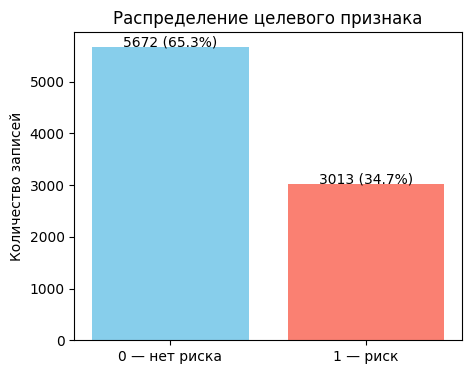

heart_attack_risk_binary
0.0    5672
1.0    3013
Name: count, dtype: int64
heart_attack_risk_binary
0.0    65.31
1.0    34.69
Name: count, dtype: float64


In [30]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
target_counts = heart_train["heart_attack_risk_binary"].value_counts().sort_index()
target_perc = target_counts / target_counts.sum() * 100

plt.figure(figsize=(5,4))
plt.bar(target_counts.index.astype(str), target_counts.values, color=["skyblue","salmon"])
plt.xticks([0,1], ["0 ‚Äî –Ω–µ—Ç —Ä–∏—Å–∫–∞", "1 ‚Äî —Ä–∏—Å–∫"])
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞")

# –ü–µ—á–∞—Ç—å —á–∏—Å–µ–ª –∏ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤
for idx, val in enumerate(target_counts.values):
    plt.text(idx, val + 10, f"{val} ({target_perc.iloc[idx]:.1f}%)", ha="center")

plt.show()

print(target_counts)
print(target_perc.round(2))

–ü–æ—Å–ª–µ –∏–∑—É—á–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –∞–Ω–∞–ª–∏–∑—É –≤—Å–µ—Ö –≤—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö. –¶–µ–ª—å —ç—Ç–æ–≥–æ —ç—Ç–∞–ø–∞ ‚Äî –≤—ã—è–≤–∏—Ç—å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Ç–∏–ø –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ (–±–∏–Ω–∞—Ä–Ω—ã–π, –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–π, –ø–æ—Ä—è–¥–∫–æ–≤—ã–π –∏–ª–∏ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–π), –∞ —Ç–∞–∫–∂–µ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –∞–Ω–æ–º–∞–ª–∏–∏ –∏–ª–∏ –≤—ã–±—Ä–æ—Å—ã.

–î–ª—è –∫–∞–∂–¥–æ–≥–æ —á–∏—Å–ª–æ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å—Ç—Ä–æ—è—Ç—Å—è:

–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–ª–∏ —Å—Ç–æ–ª–±—á–∞—Ç–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö/–±–∏–Ω–∞—Ä–Ω—ã—Ö);

–ë–æ–∫—Å–ø–ª–æ—Ç –¥–ª—è –≤–∏–∑—É–∞–ª—å–Ω–æ–≥–æ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –æ—Ü–µ–Ω–∫–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–π.

–≠—Ç–æ—Ç –∞–Ω–∞–ª–∏–∑ –ø–æ–º–æ–≥–∞–µ—Ç:

–û–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, —Ç—Ä–µ–±—É—é—â–∏–µ –æ—Å–æ–±–æ–π –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ (–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ, –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ, —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤);

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –≤ train –∏ test;

–ù–∞–π—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ —É–∂–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω—ã –∏–ª–∏ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω—ã, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ª–∏—à–Ω–µ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤ –ø–∞–π–ø–ª–∞–π–Ω–µ.

–û—Å–æ–±–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ —É–¥–µ–ª—è–µ—Ç—Å—è –±–∏–Ω–∞—Ä–Ω—ã–º –∏ –ø–æ—Ä—è–¥–∫–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º, —Ç–∞–∫ –∫–∞–∫ –¥–ª—è –Ω–∏—Ö –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∏–º–ø—É—Ç–∞—Ü–∏–∏ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏.

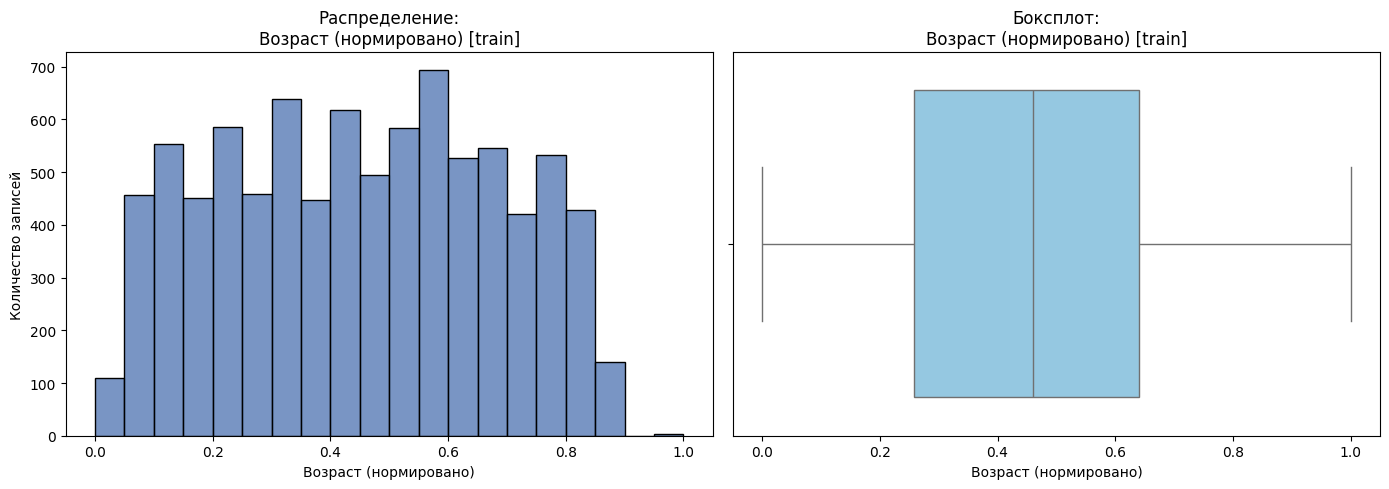

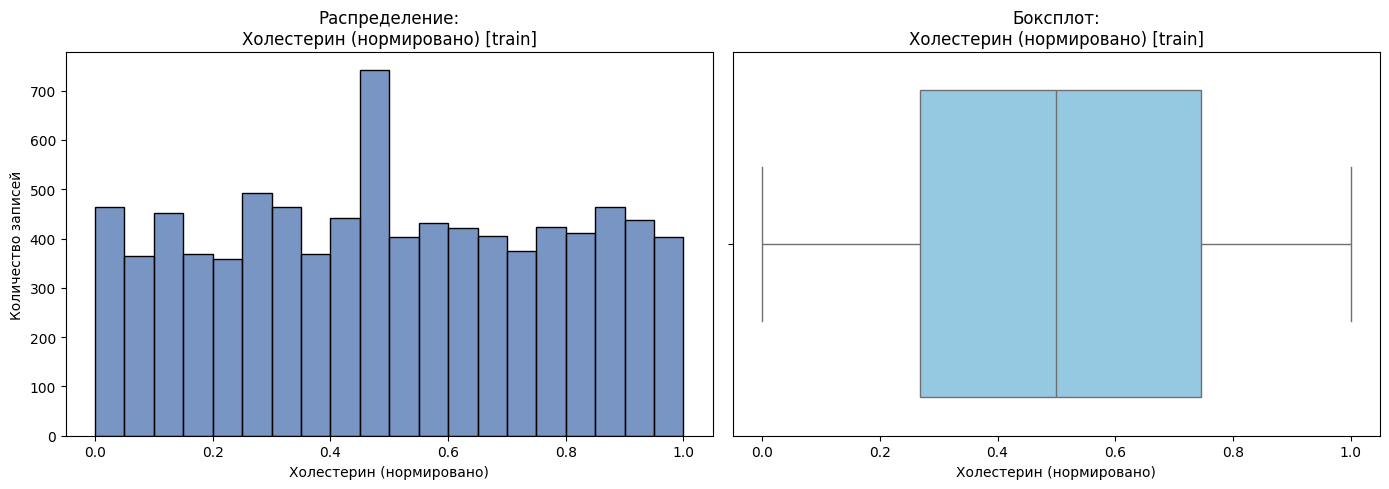

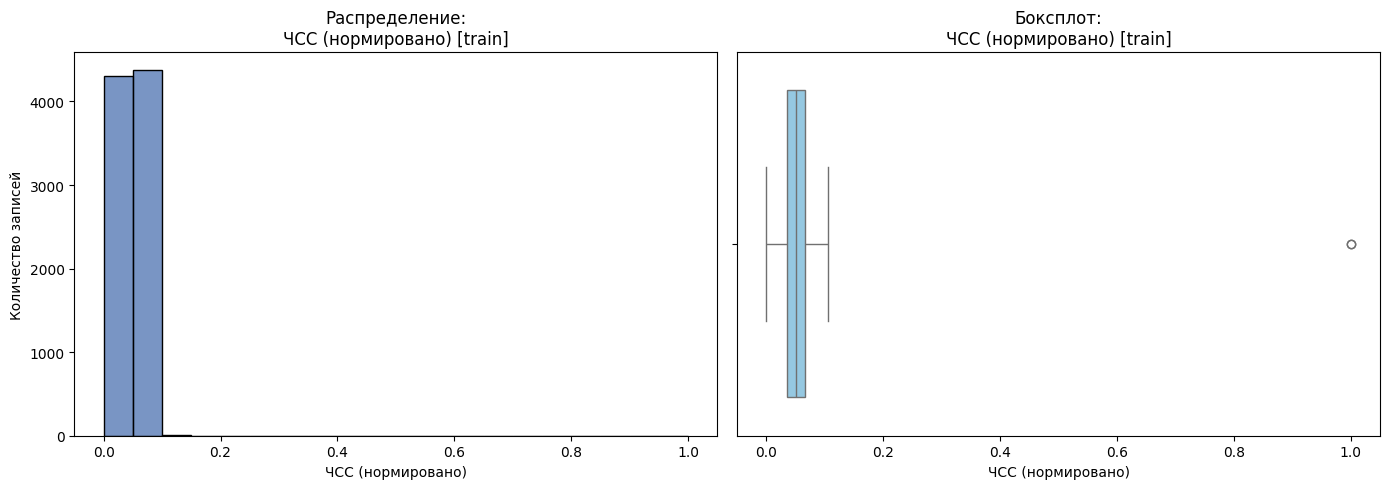

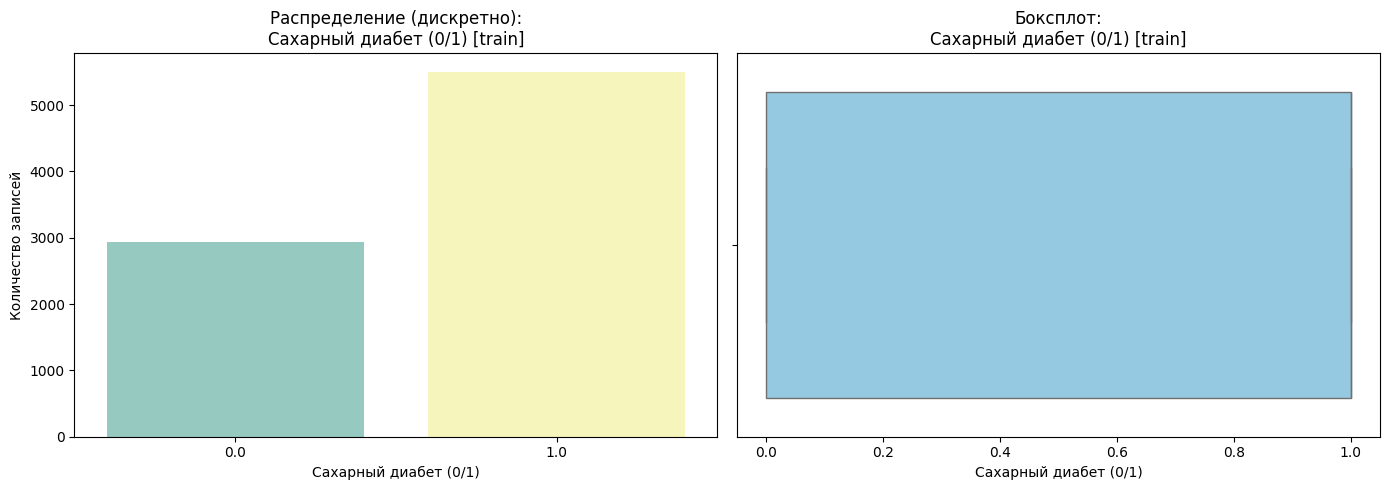

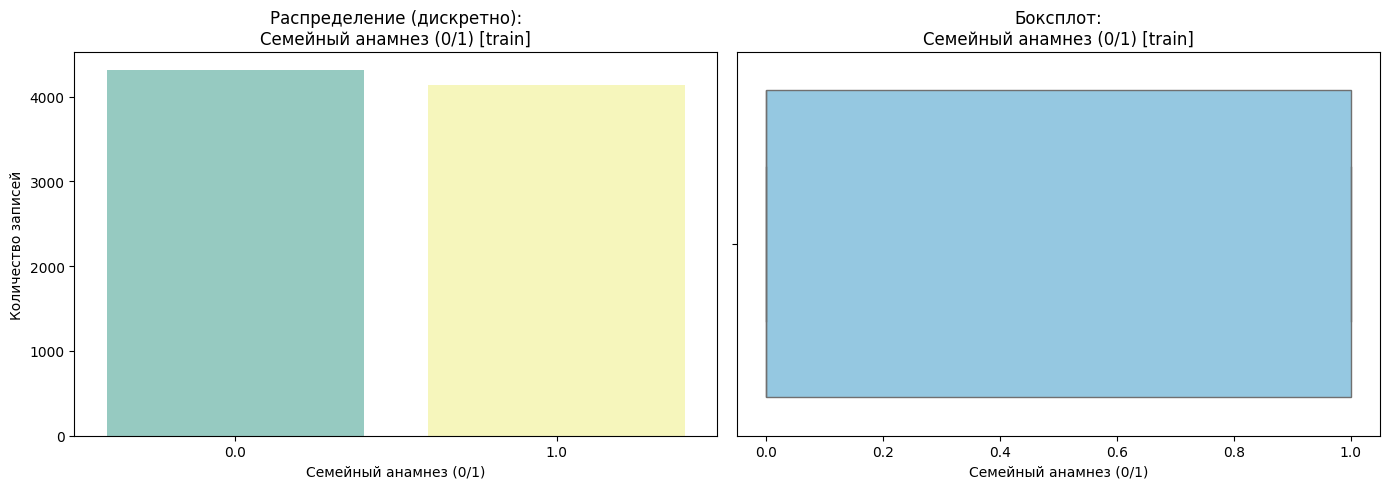

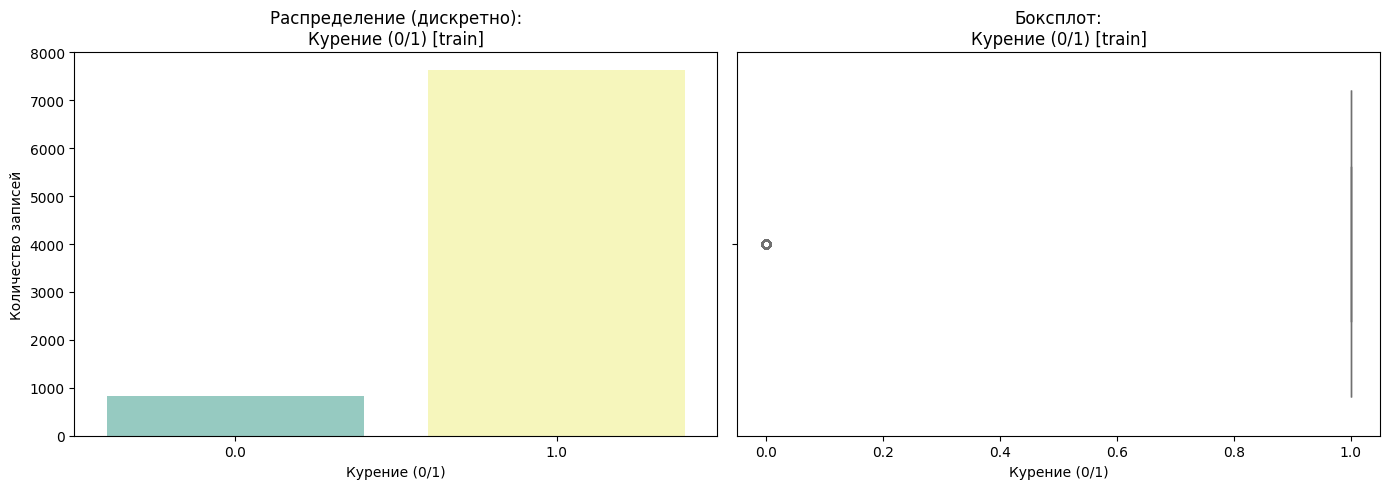

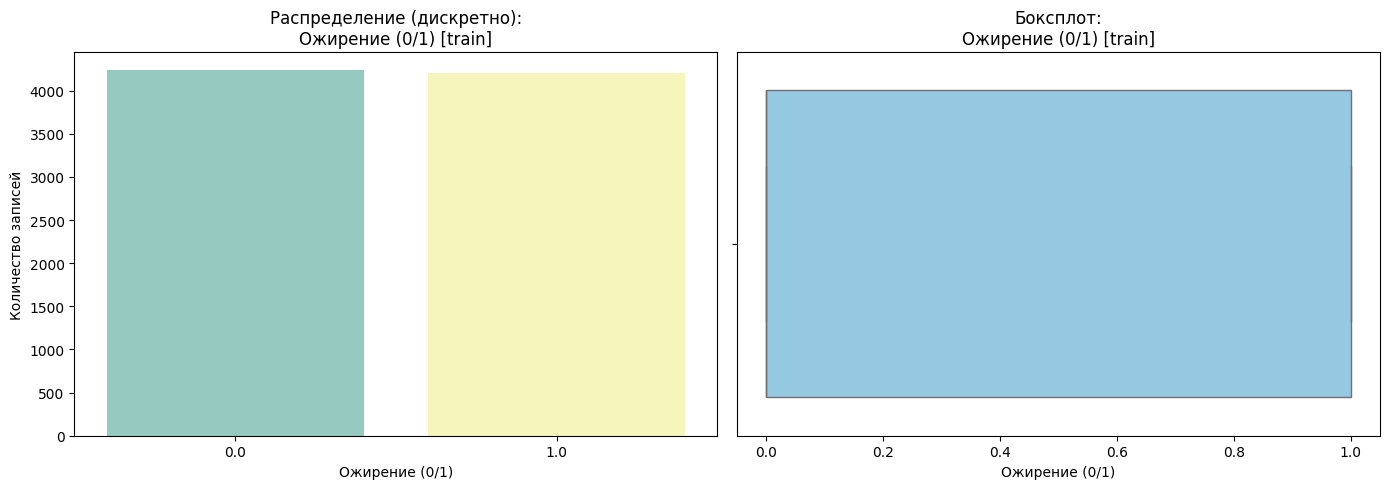

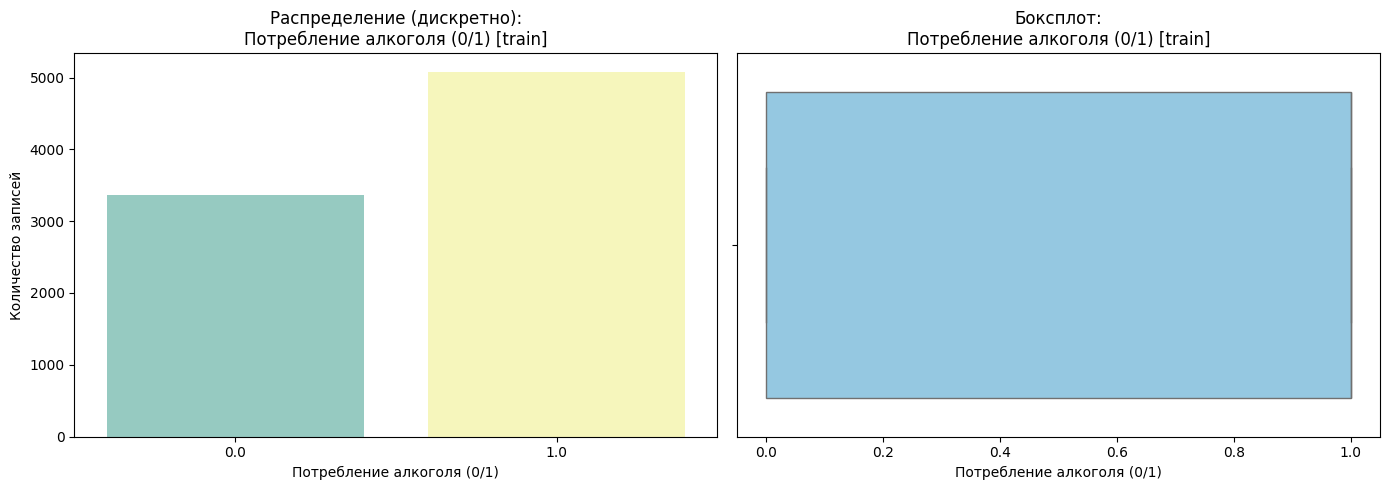

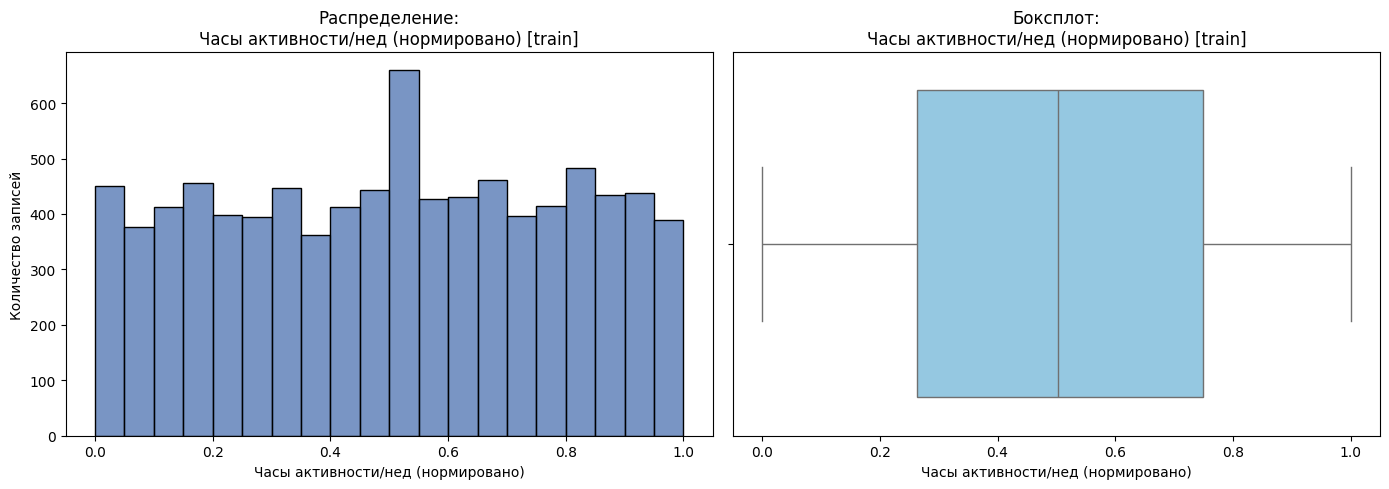

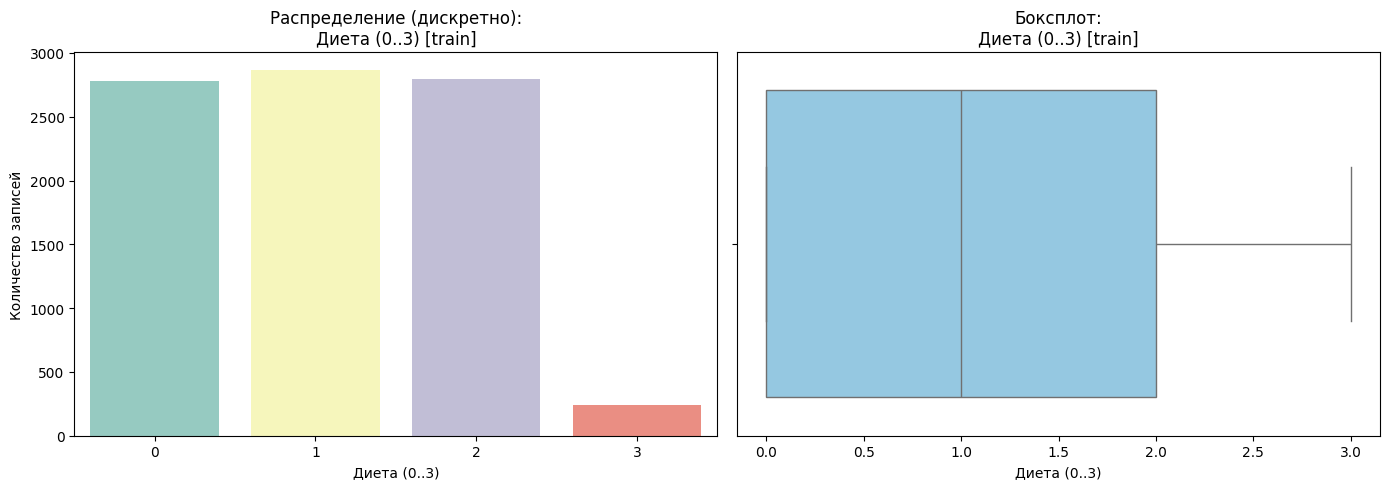

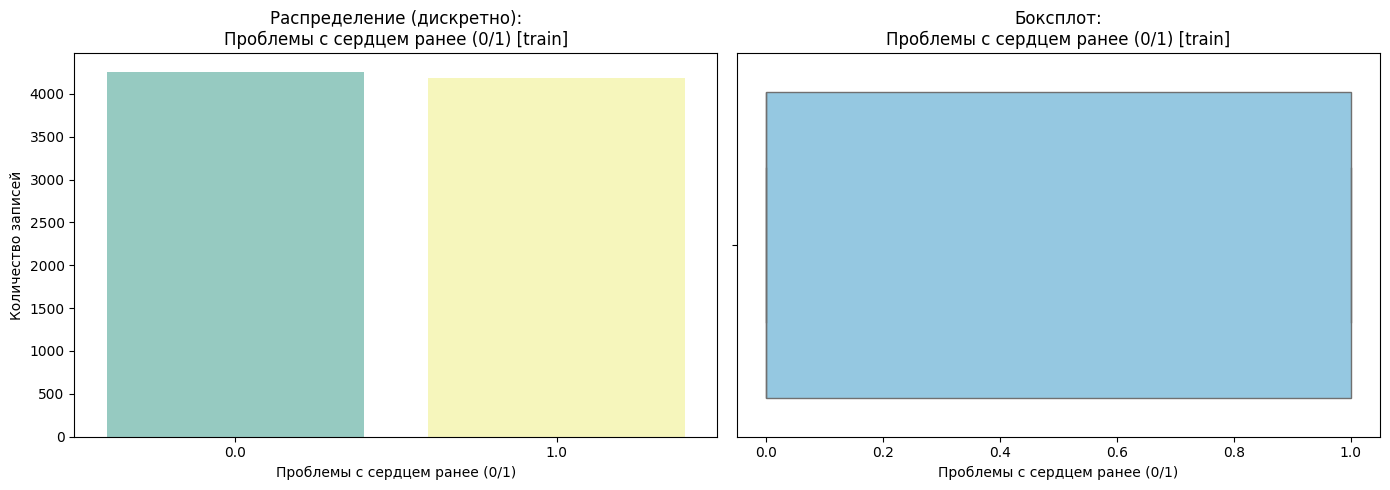

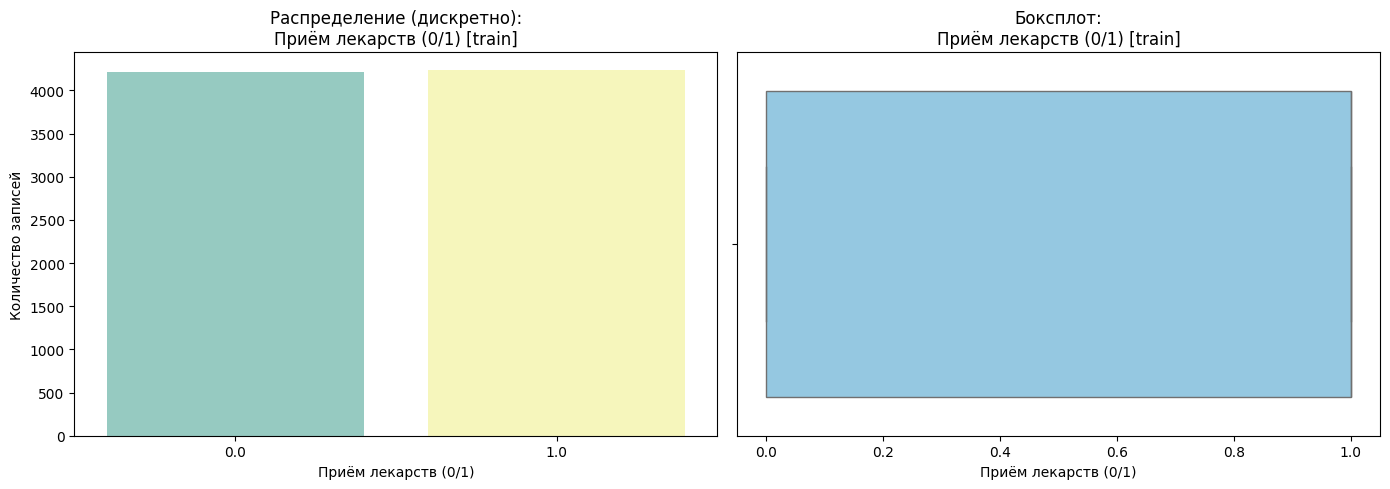

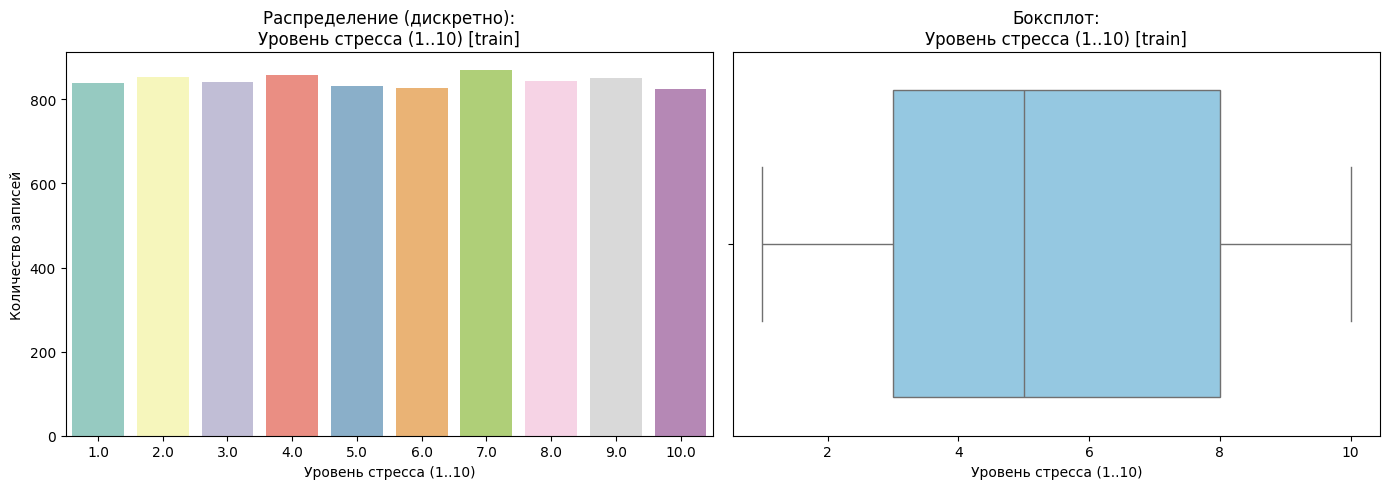

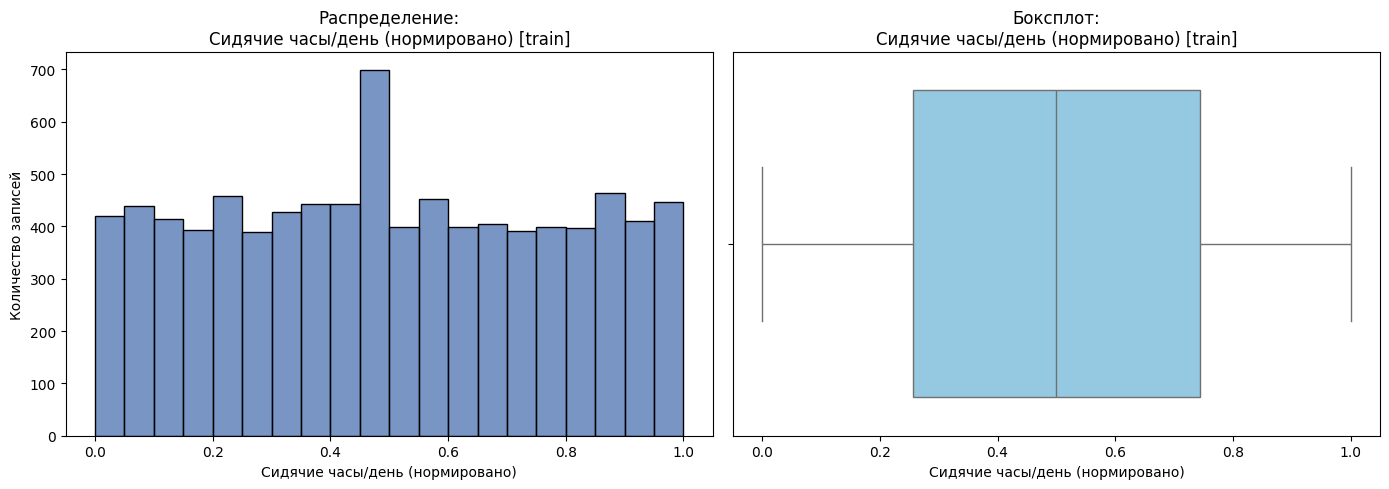

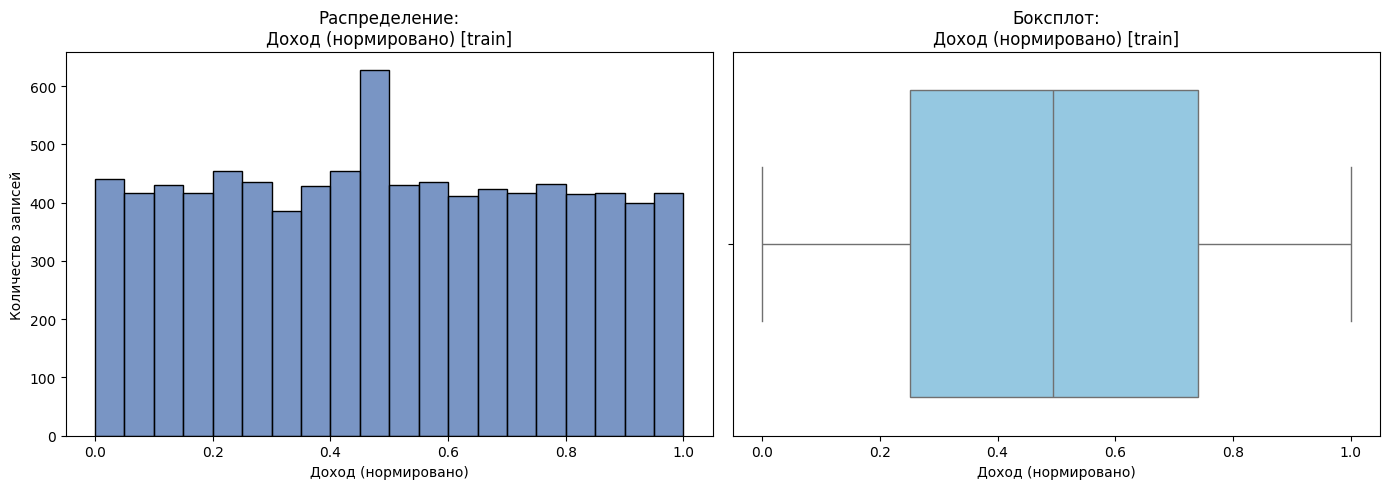

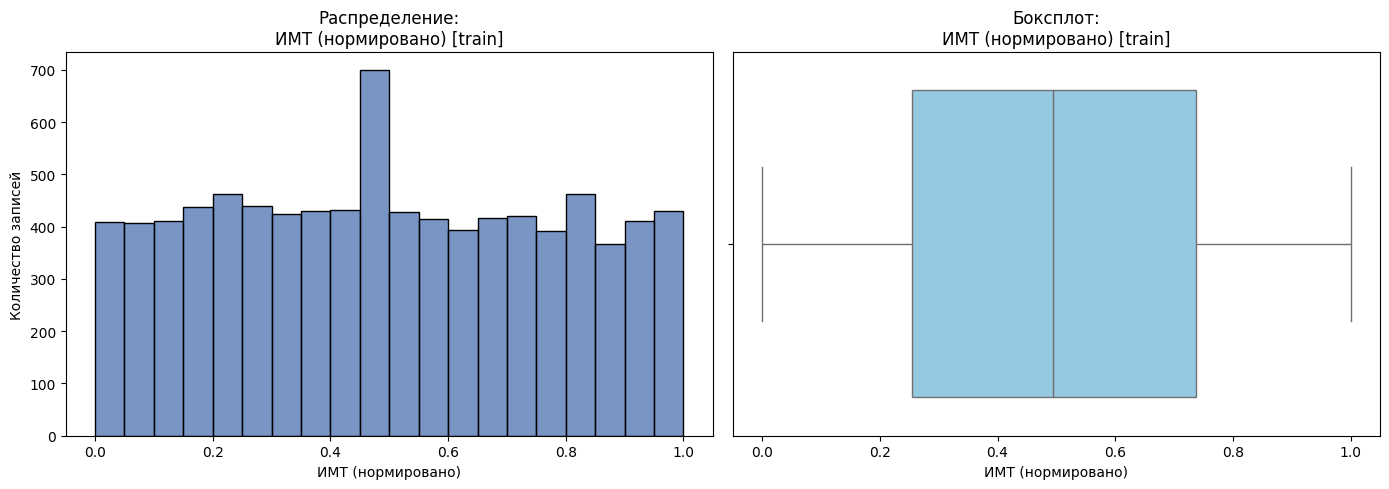

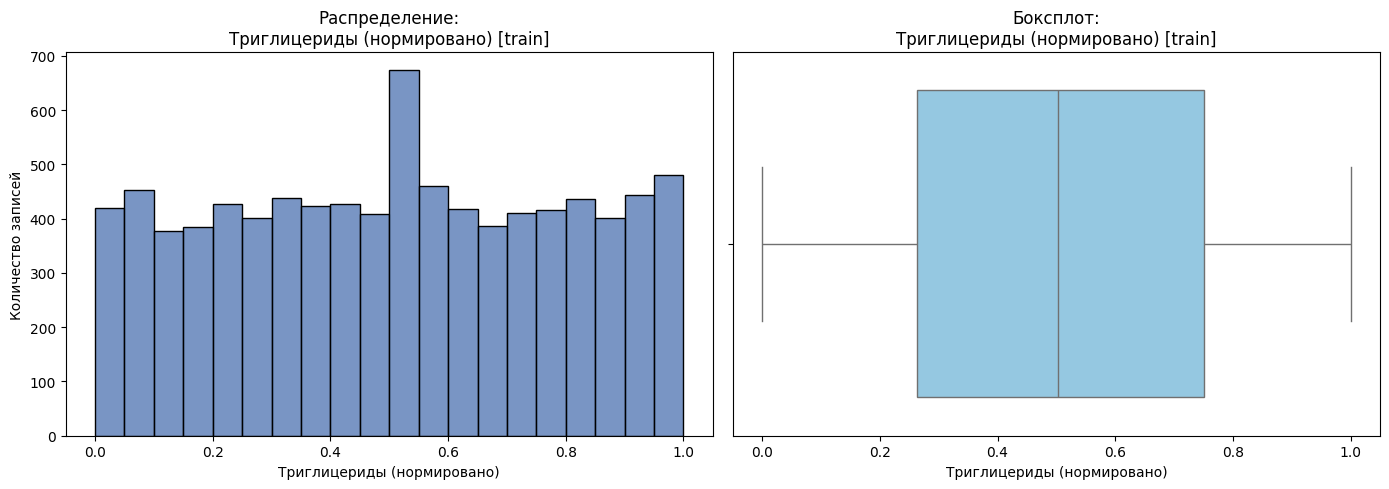

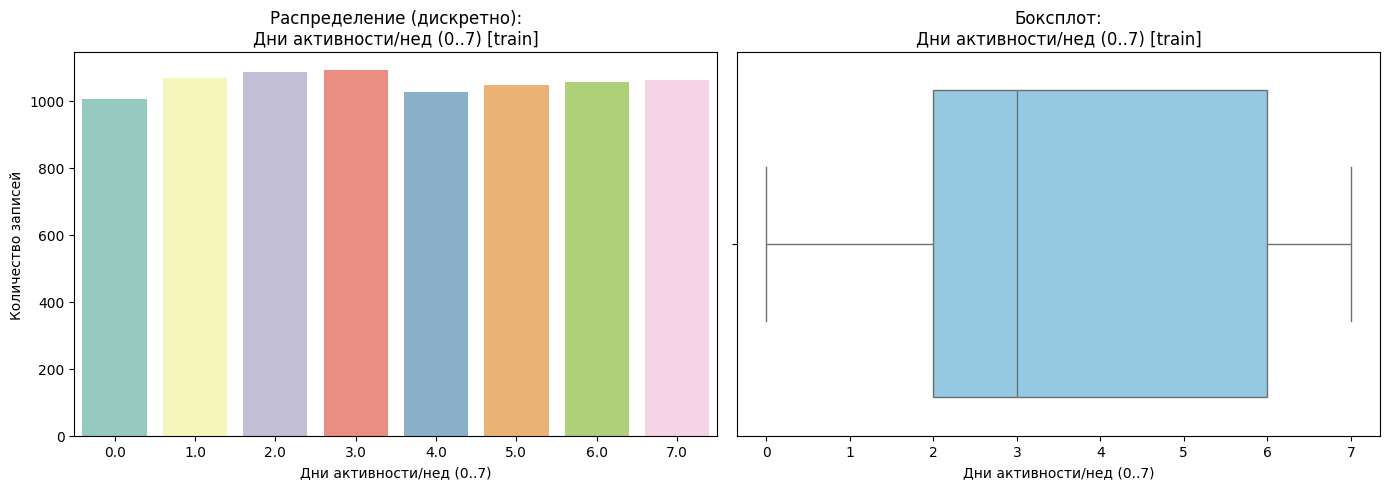

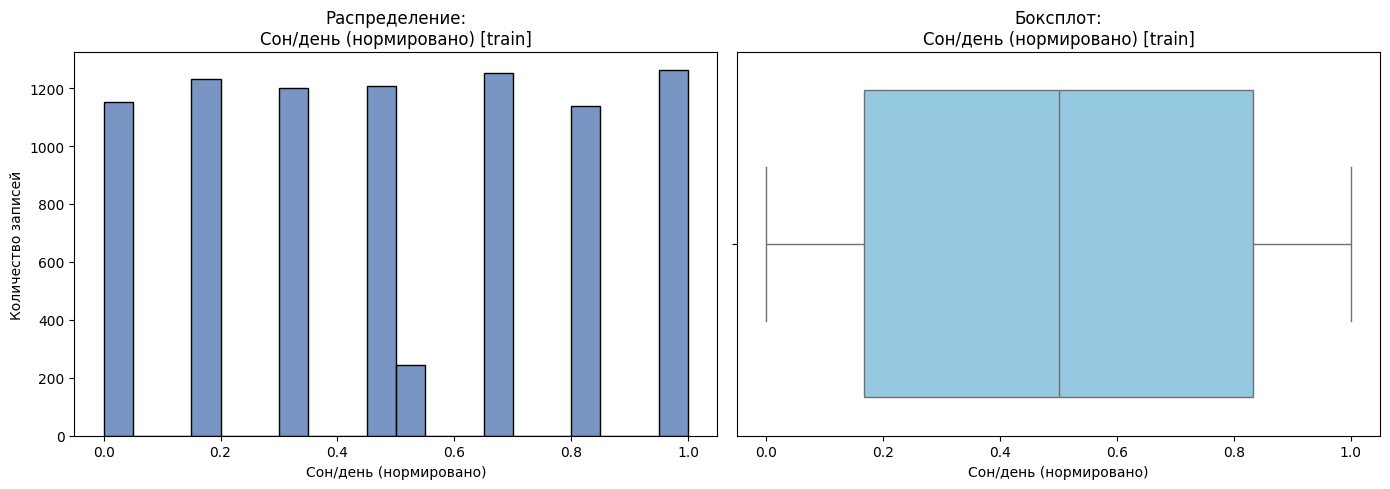

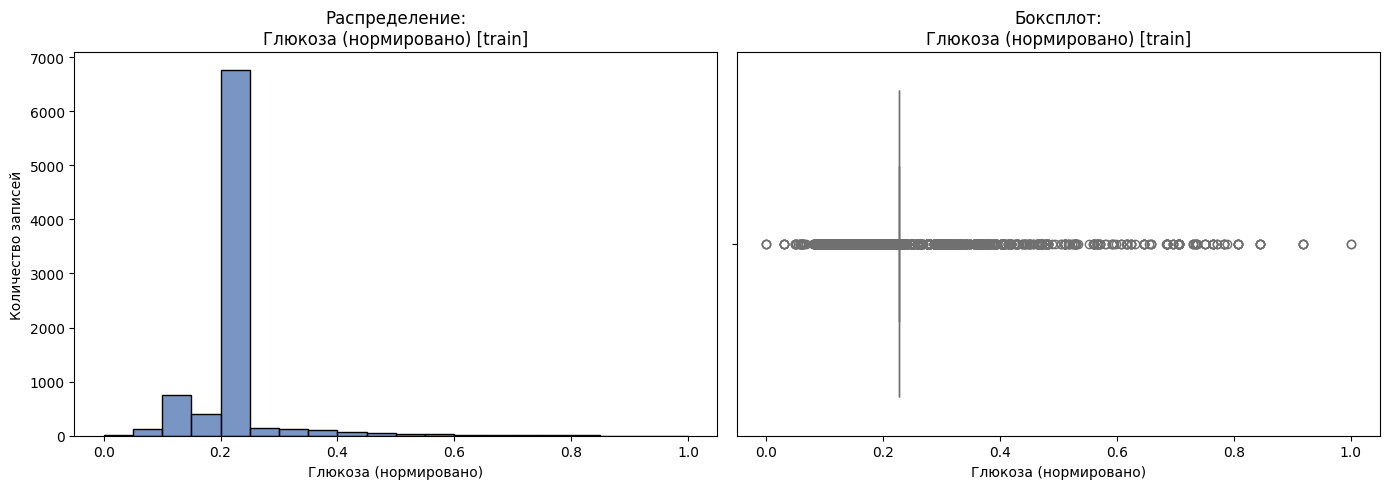

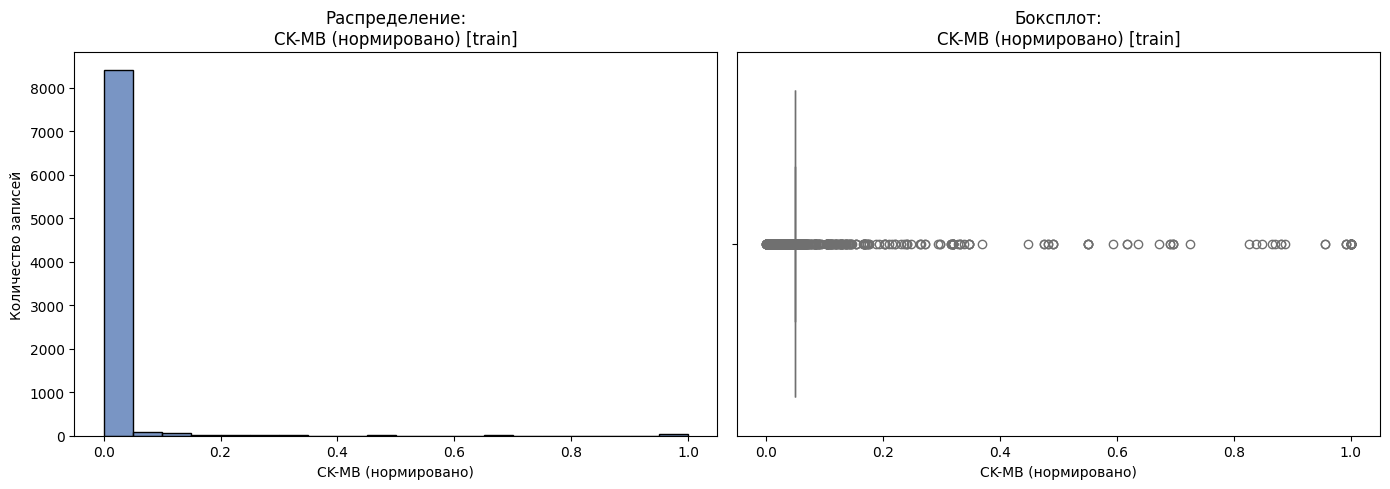

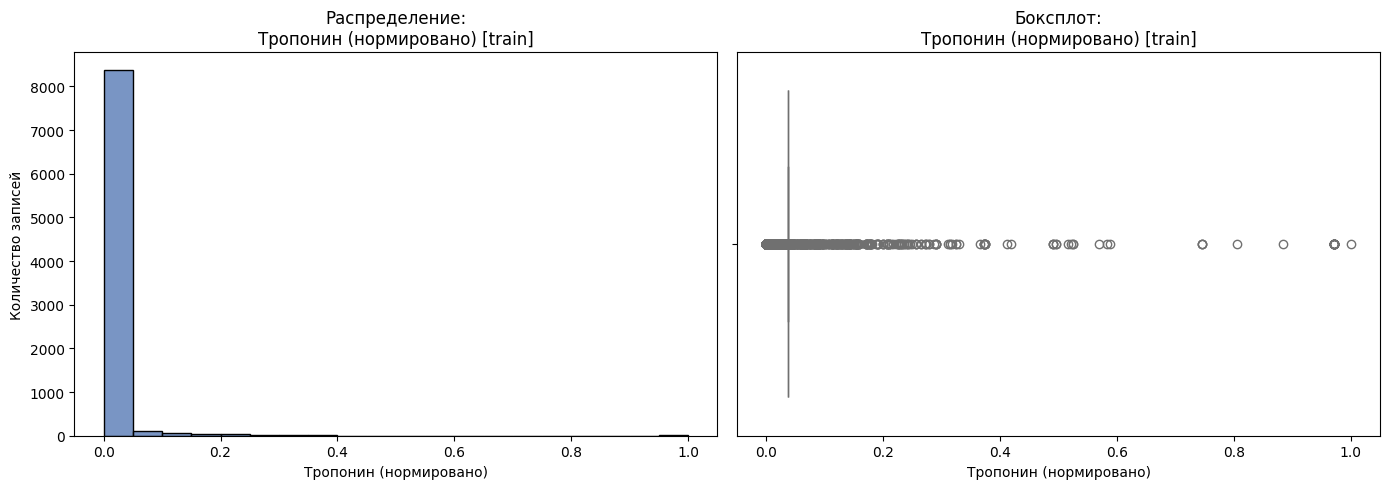

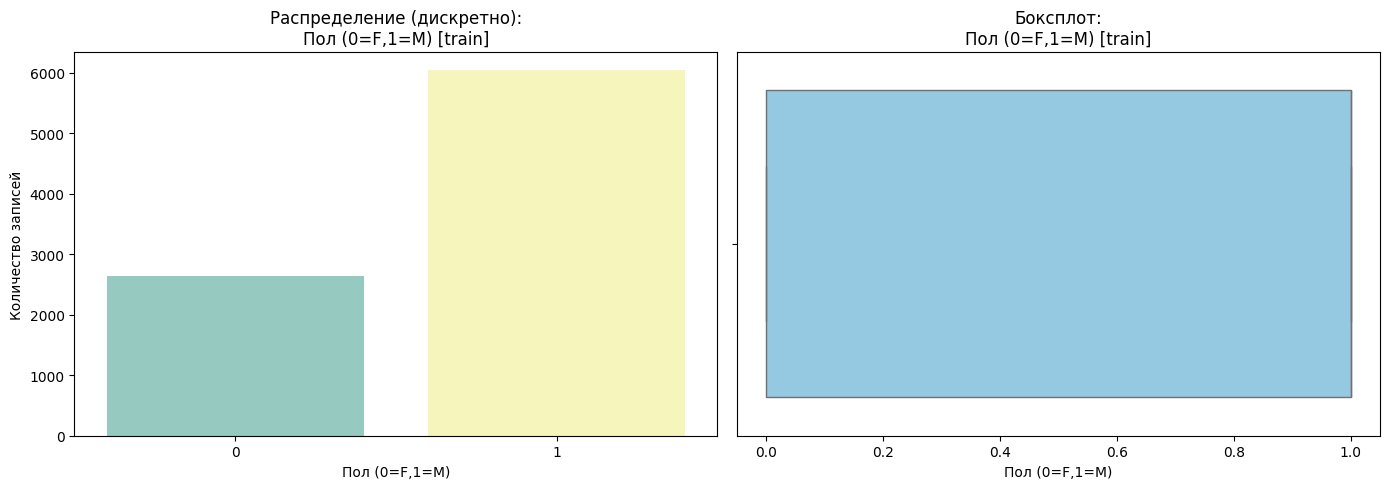

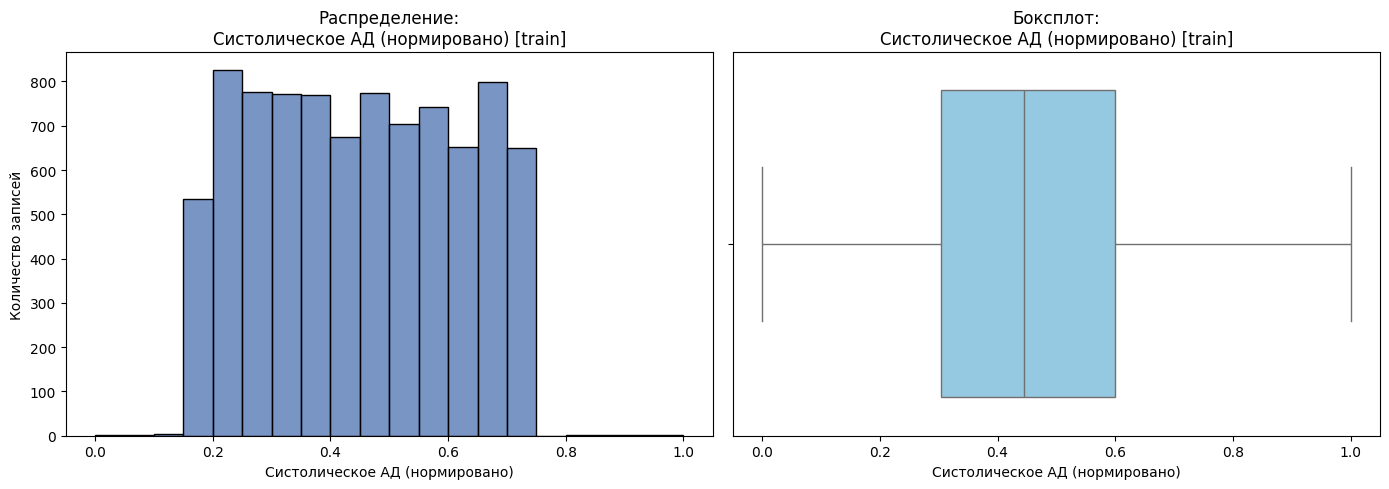

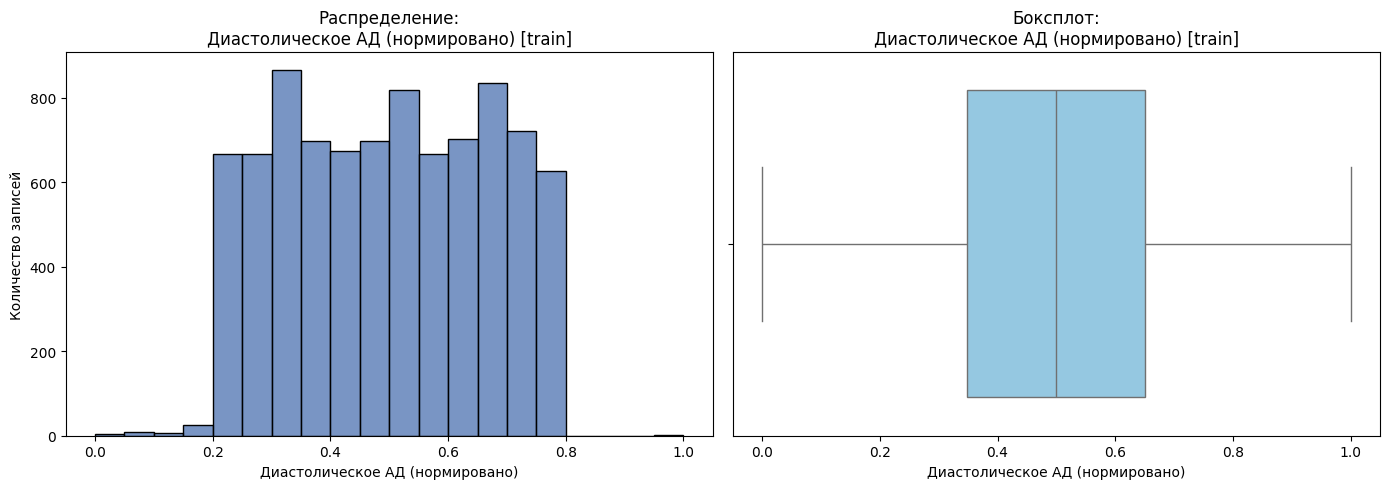

In [31]:
TARGET_COL = "heart_attack_risk_binary"

# 1) —ç–≤—Ä–∏—Å—Ç–∏–∫–∞ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ—Å—Ç–∏ (–∫–∞–∫ –∏ —Ä–∞–Ω—å—à–µ)
def is_binary_feature(s: pd.Series) -> bool:
    vals = set(pd.to_numeric(s.dropna(), errors="coerce").unique().tolist())
    return len(vals) <= 2 and vals.issubset({0, 1})

def is_discrete_feature(s: pd.Series, threshold: int = 15) -> bool:
    if is_binary_feature(s):
        return True
    nunique_ok = s.nunique(dropna=True) < threshold
    if is_integer_dtype(s):
        return nunique_ok
    s_num = pd.to_numeric(s.dropna(), errors="coerce")
    all_int_like = (s_num == np.floor(s_num)).all()
    return nunique_ok and bool(all_int_like)

# 2) –∫—Ä–∞—Å–∏–≤—ã–µ –ø–æ–¥–ø–∏—Å–∏ (–¥–æ–ø–æ–ª–Ω–∏ –ø–æ –≤–∫—É—Å—É)
axis_labels = {
    "age": "–í–æ–∑—Ä–∞—Å—Ç (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "cholesterol": "–•–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "heart_rate": "–ß–°–° (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "diabetes": "–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç (0/1)",
    "family_history": "–°–µ–º–µ–π–Ω—ã–π –∞–Ω–∞–º–Ω–µ–∑ (0/1)",
    "smoking": "–ö—É—Ä–µ–Ω–∏–µ (0/1)",
    "obesity": "–û–∂–∏—Ä–µ–Ω–∏–µ (0/1)",
    "alcohol_consumption": "–ü–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –∞–ª–∫–æ–≥–æ–ª—è (0/1)",
    "exercise_hours_per_week": "–ß–∞—Å—ã –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏/–Ω–µ–¥ (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "diet": "–î–∏–µ—Ç–∞ (0..3)",
    "previous_heart_problems": "–ü—Ä–æ–±–ª–µ–º—ã —Å —Å–µ—Ä–¥—Ü–µ–º —Ä–∞–Ω–µ–µ (0/1)",
    "medication_use": "–ü—Ä–∏—ë–º –ª–µ–∫–∞—Ä—Å—Ç–≤ (0/1)",
    "stress_level": "–£—Ä–æ–≤–µ–Ω—å —Å—Ç—Ä–µ—Å—Å–∞ (1..10)",
    "sedentary_hours_per_day": "–°–∏–¥—è—á–∏–µ —á–∞—Å—ã/–¥–µ–Ω—å (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "income": "–î–æ—Ö–æ–¥ (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "bmi": "–ò–ú–¢ (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "triglycerides": "–¢—Ä–∏–≥–ª–∏—Ü–µ—Ä–∏–¥—ã (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "physical_activity_days_per_week": "–î–Ω–∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏/–Ω–µ–¥ (0..7)",
    "sleep_hours_per_day": "–°–æ–Ω/–¥–µ–Ω—å (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "blood_sugar": "–ì–ª—é–∫–æ–∑–∞ (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "ck_mb": "CK-MB (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "troponin": "–¢—Ä–æ–ø–æ–Ω–∏–Ω (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "gender": "–ü–æ–ª (0=F,1=M)",
    "systolic_blood_pressure": "–°–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –ê–î (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
    "diastolic_blood_pressure": "–î–∏–∞—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –ê–î (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ)",
}

# 3) —É–¥–æ–±–Ω–∞—è –ø–∞–ª–∏—Ç—Ä–∞ ¬´–ø–æ —á–∏—Å–ª—É —Å—Ç–æ–ª–±–∏–∫–æ–≤¬ª
def palette_for_k(k: int):
    # tab20 –¥–æ 20, –¥–∞–ª—å—à–µ ‚Äî husl
    if k <= 12:
        return sns.color_palette("Set3", k)
    elif k <= 20:
        return sns.color_palette("tab20", k)
    else:
        return sns.color_palette("husl", k)

# 4) –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
def plot_feature_distributions(df: pd.DataFrame, dataset_name: str = "train", with_hue: bool = False):
    num_cols = df.select_dtypes(include="number").columns.tolist()
    # –∏—Å–∫–ª—é—á–∞–µ–º id/target (–µ—Å–ª–∏ –≤–¥—Ä—É–≥ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç)
    num_cols = [c for c in num_cols if c.lower() not in ("id",)]
    if TARGET_COL in num_cols:
        num_cols.remove(TARGET_COL)

    for col in num_cols:
        s = df[col]
        label = axis_labels.get(col, col)

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        if is_discrete_feature(s, threshold=15):
            # –ø–æ—Ä—è–¥–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–π (–æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π)
            cats = sorted(s.dropna().unique().tolist())
            pal = palette_for_k(len(cats))

            if with_hue and TARGET_COL in df.columns:
                # –†–∞—Å–∫—Ä–∞—Å–∫–∞ –ø–æ —Ç–∞—Ä–≥–µ—Ç—É (—Å—Ç–æ–ª–±–∏–∫–∏ –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏)
                sns.countplot(
                    data=df, x=col, hue=TARGET_COL,
                    order=cats, palette="Set2", ax=axes[0]
                )
                axes[0].legend(title="target", loc="best")
            else:
                # –ö–∞–∂–¥—ã–π —Å—Ç–æ–ª–±–∏–∫ —Å–≤–æ–∏–º —Ü–≤–µ—Ç–æ–º
                sns.countplot(
                    data=df, x=col,
                    order=cats, palette=pal, ax=axes[0]
                )

            axes[0].set_title(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (–¥–∏—Å–∫—Ä–µ—Ç–Ω–æ):\n{label} [{dataset_name}]")
            axes[0].set_xlabel(label)
            axes[0].set_ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π")
        else:
            # –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–µ ‚Äî –æ–±—ã—á–Ω–∞—è –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
            sns.histplot(s.dropna(), bins=20, kde=False, ax=axes[0], color="#4C72B0")
            axes[0].set_title(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:\n{label} [{dataset_name}]")
            axes[0].set_xlabel(label)
            axes[0].set_ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π")

        # –ë–æ–∫—Å–ø–ª–æ—Ç (–µ–¥–∏–Ω—ã–π)
        sns.boxplot(x=s, ax=axes[1], color="#88CCEE")
        axes[1].set_title(f"–ë–æ–∫—Å–ø–ª–æ—Ç:\n{label} [{dataset_name}]")
        axes[1].set_xlabel(label)

        plt.tight_layout()
        plt.show()

# --- –∑–∞–ø—É—Å–∫ –¥–ª—è train ---
plot_feature_distributions(heart_train, dataset_name="train", with_hue=False)

–ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ —Ç–∏–ø–∞–º
1. –ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
–ü—Ä–∏–º–µ—Ä—ã: gender, diabetes, family_history, smoking, obesity, alcohol_consumption –∏ –¥—Ä.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:

gender ‚Äî –¥–æ–ª—è –º—É–∂—á–∏–Ω –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤—ã—à–µ (~72%), —á—Ç–æ —Å–æ–∑–¥–∞—ë—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å.

–£ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –¥—Ä—É–≥–∏—Ö –±–∏–Ω–∞—Ä–Ω—ã—Ö —Ñ–∏—á–µ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, smoking) —Ç–∞–∫–∂–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ø–µ—Ä–µ–∫–æ—Å –≤ —Å—Ç–æ—Ä–æ–Ω—É –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞.

–ü—Ä–æ–ø—É—Å–∫–∏: –í–∏–∑—É–∞–ª—å–Ω–æ –Ω–∞ countplot –Ω–µ –≤–∏–¥–Ω—ã, –Ω–æ —Ä–∞–Ω–µ–µ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω—ã –≥—Ä—É–ø–ø–æ–≤—ã–µ NaN –≤ –æ–¥–Ω–∏—Ö –∏ —Ç–µ—Ö –∂–µ –∑–∞–ø–∏—Å—è—Ö.

üìå –í—ã–≤–æ–¥:

–î–∏—Å–±–∞–ª–∞–Ω—Å –Ω—É–∂–Ω–æ —É—á–µ—Å—Ç—å –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ (—Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è –∏–ª–∏ –≤–∑–≤–µ—à–∏–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤).

–î–ª—è NaN ‚Äî —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–æ–¥–æ–π –∏–ª–∏ target-based –∏–º–º—É—Ç–∞—Ü–∏–µ–π.

2. –ü–æ—Ä—è–¥–∫–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
–ü—Ä–∏–º–µ—Ä—ã: stress_level, diet, physical_activity_days_per_week.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:

physical_activity_days_per_week ‚Äî –∑–∞–º–µ—Ç–µ–Ω –ø–∏–∫ –Ω–∞ –Ω—É–ª–µ (–ø–æ–ª–Ω–æ–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏).

diet ‚Äî —Ä–µ–¥–∫–∏–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (3), –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å –∫–∞–∫ –≤—ã–±—Ä–æ—Å–∞–º–∏, —Ç–∞–∫ –∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–º –º–∞–ª–æ–π –ø–æ–¥–≥—Ä—É–ø–ø—ã.

üìå –í—ã–≤–æ–¥:

–û—Å—Ç–∞–≤–ª—è–µ–º –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –≤–∏–¥–µ.

–ü—Ä–∏ –∏–º–ø—É—Ç–∞—Ü–∏–∏ ‚Äî –º–µ–¥–∏–∞–Ω–∞ –∏–ª–∏ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –∫–ª–∞—Å—Å—É.

3. –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
–ü—Ä–∏–º–µ—Ä—ã: age, cholesterol, heart_rate, bmi, triglycerides, systolic_bp, diastolic_bp, glucose, ck_mb, troponin.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

age ‚Äî —Å–º–µ—â–µ–Ω–∏–µ –≤ —Å—Ç–æ—Ä–æ–Ω—É —Å—Ç–∞—Ä—à–∏—Ö –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤.

systolic_bp –∏ diastolic_bp ‚Äî —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ—á—Ç–∏ –Ω–µ—Ç.

cholesterol ‚Äî —É–º–µ—Ä–µ–Ω–Ω–æ —Å–∏–º–º–µ—Ç—Ä–∏—á–µ–Ω, —Ä–µ–¥–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã.

glucose ‚Äî —Å–∫–æ—à–µ–Ω –≤–ø—Ä–∞–≤–æ, –µ—Å—Ç—å –∑–Ω–∞—á–∏–º—ã–µ –≤—ã–±—Ä–æ—Å—ã –≤ –≤–µ—Ä—Ö–Ω–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ.

ck_mb –∏ troponin ‚Äî –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–π –ø—Ä–∞–≤—ã–π –ø–µ—Ä–µ–∫–æ—Å, –º–Ω–æ–∂–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤, >95% –∑–Ω–∞—á–µ–Ω–∏–π –±–ª–∏–∑–∫–∏ –∫ –Ω—É–ª—é.

üìå –í—ã–≤–æ–¥:

–î–ª—è ck_mb, troponin, glucose —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–ª–∏ –∫–≤–∞–Ω—Ç–∏–ª—å–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ.

–î–ª—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã—Ö ‚Äî –º–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ –µ—Å—Ç—å (–¥–∞–Ω–Ω—ã–µ —É–∂–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω—ã).

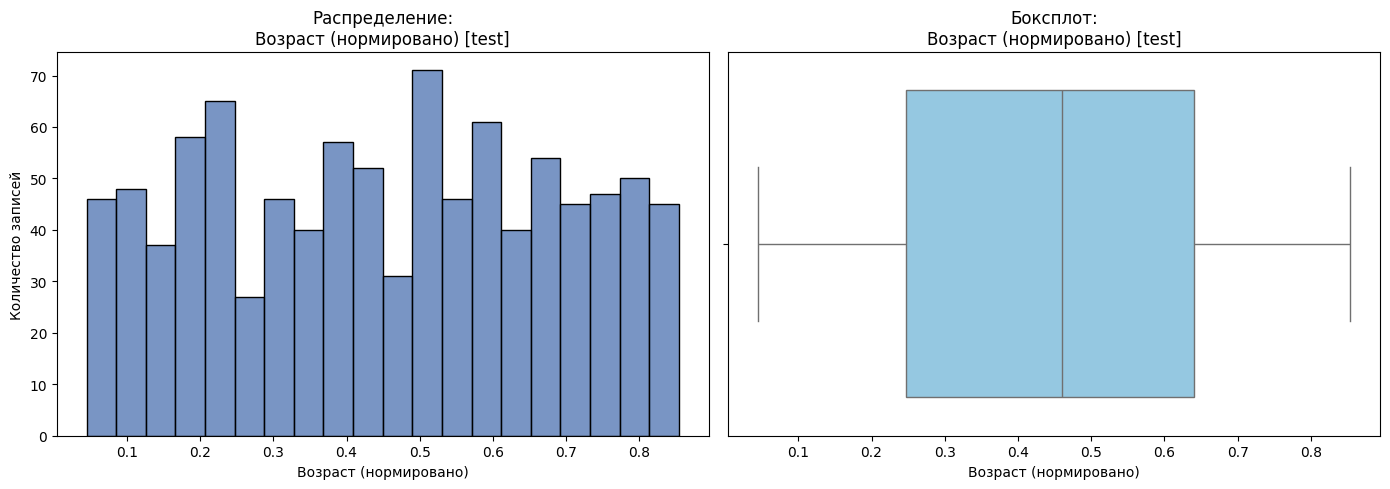

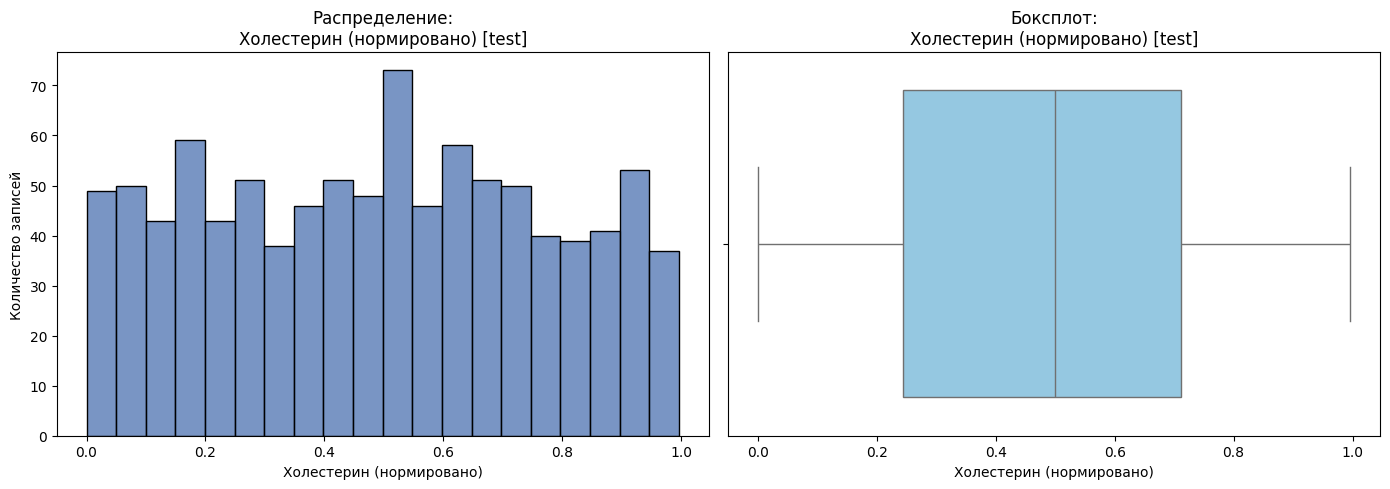

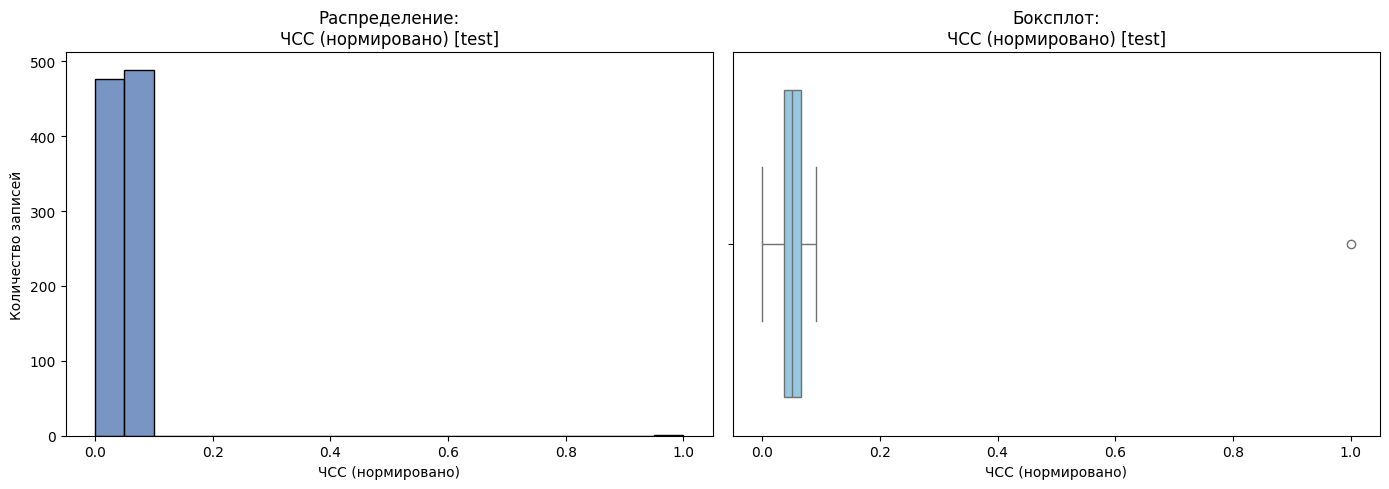

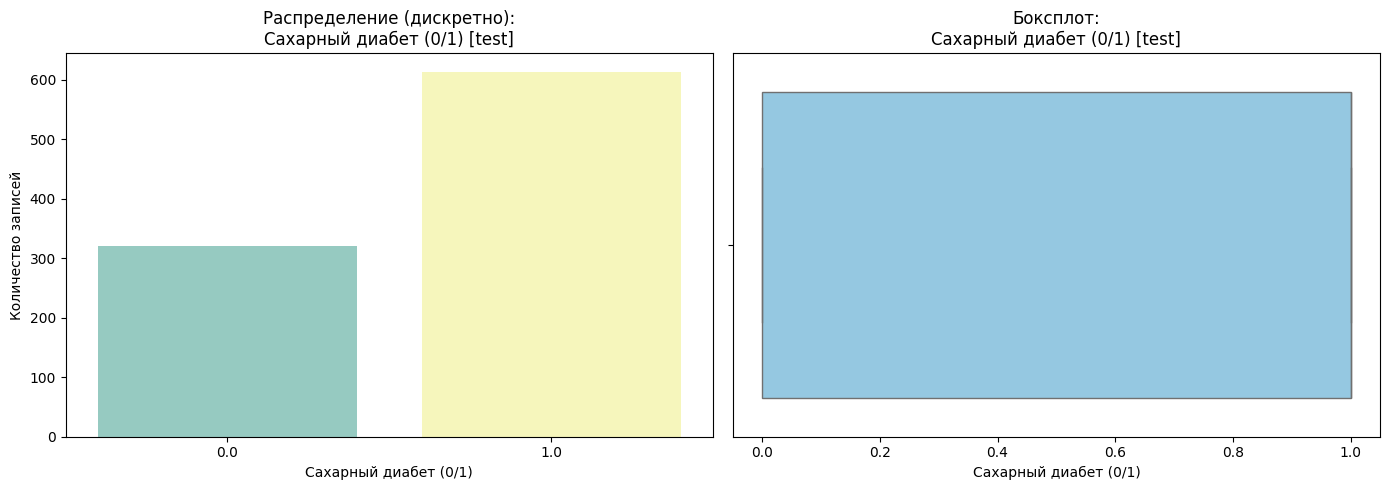

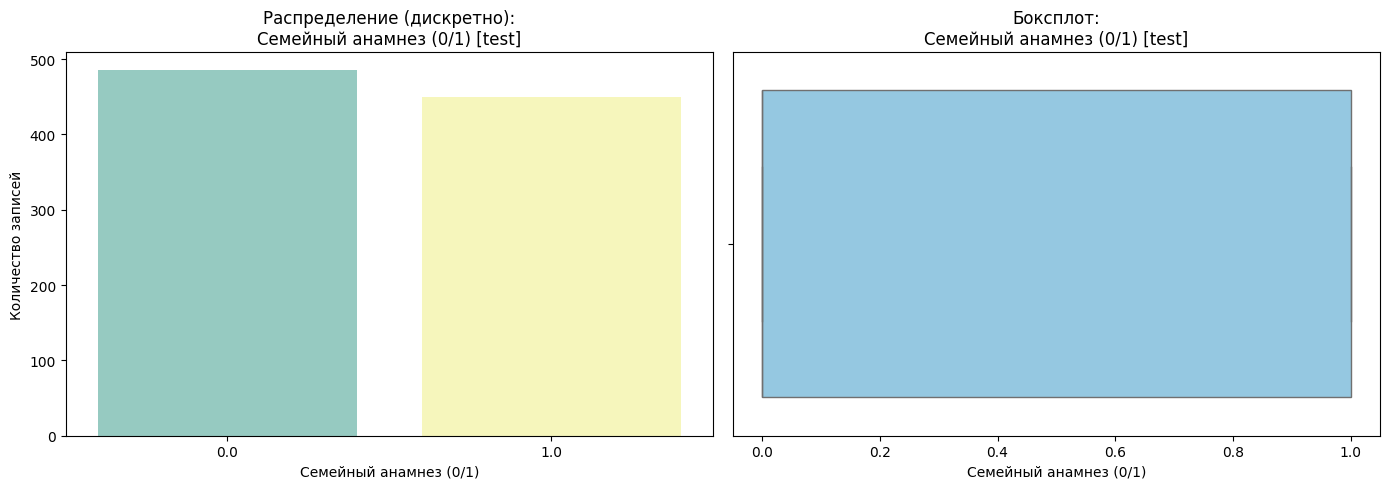

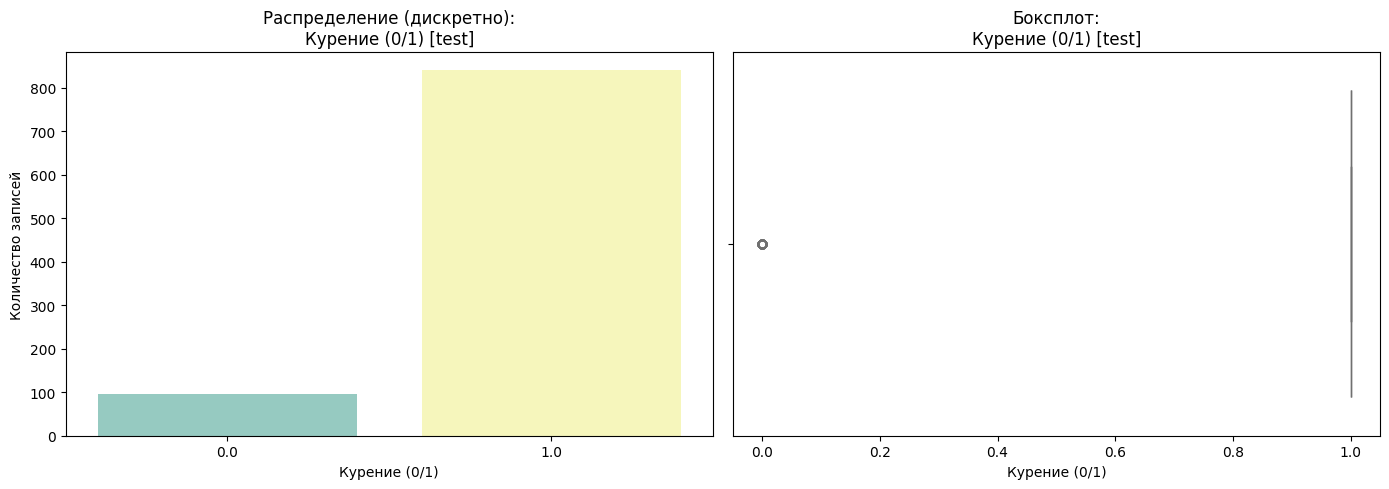

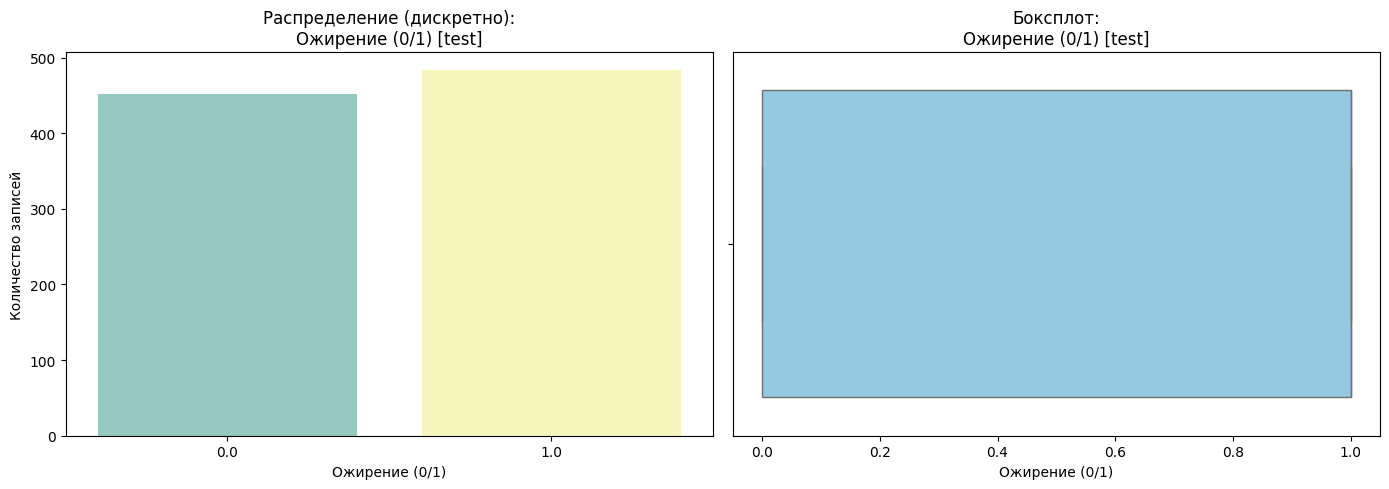

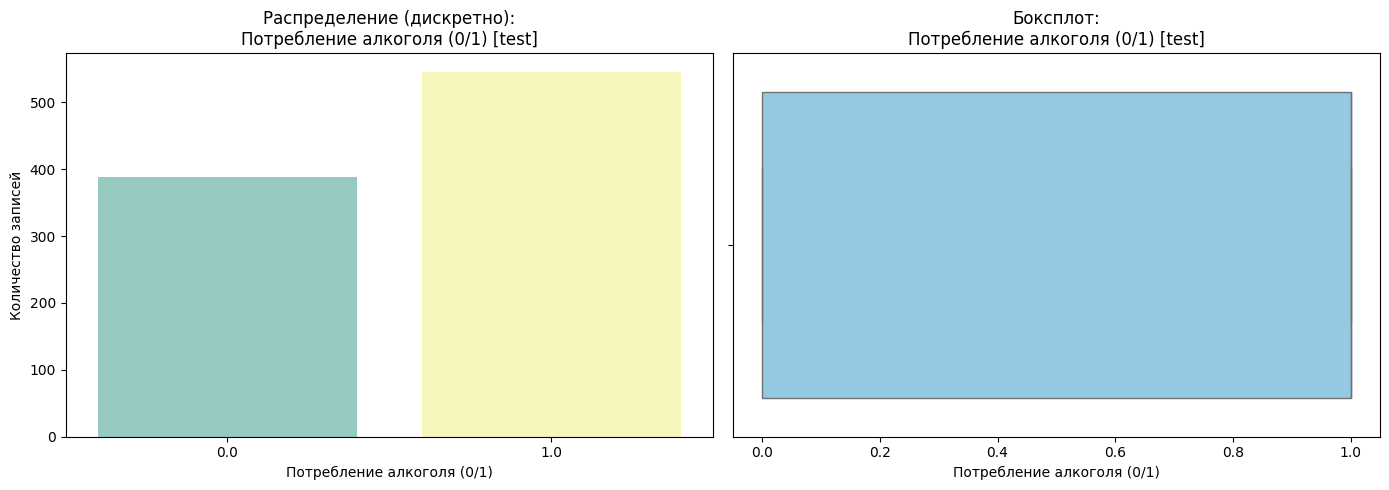

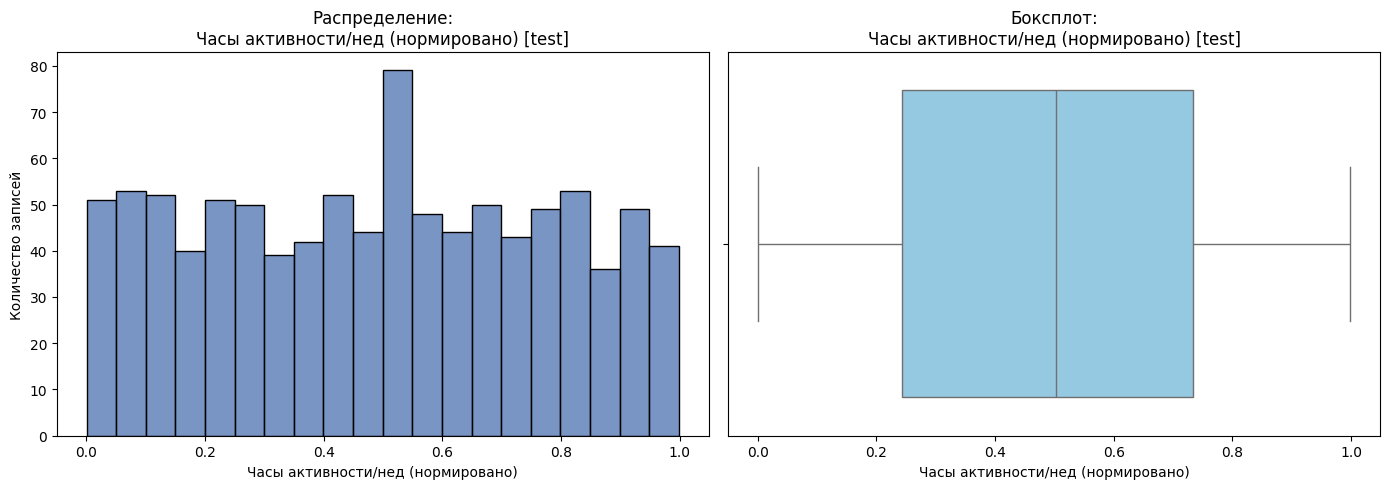

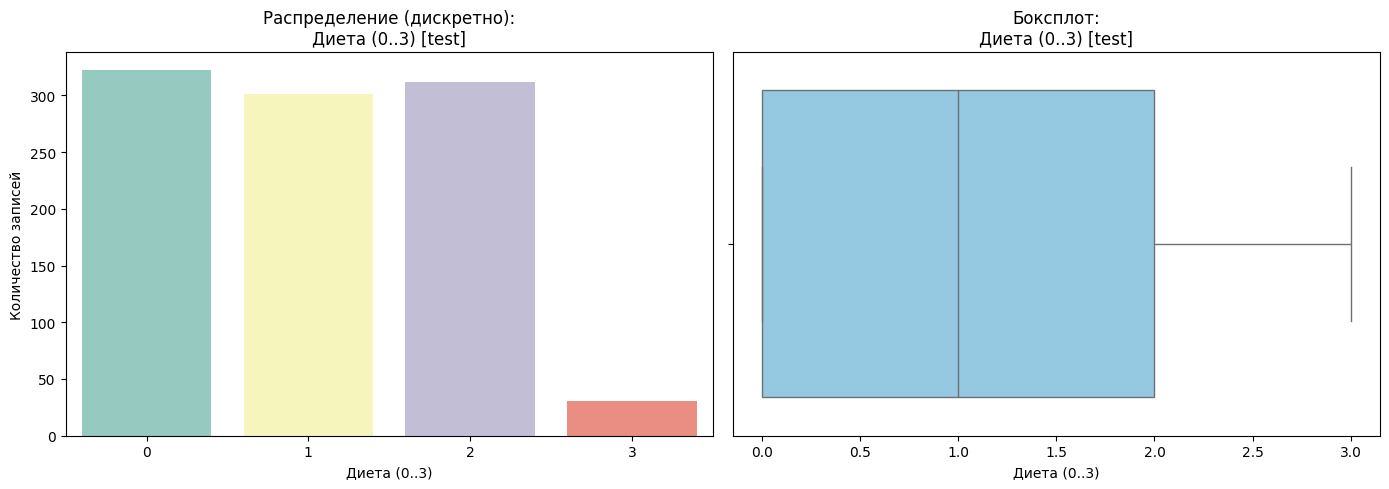

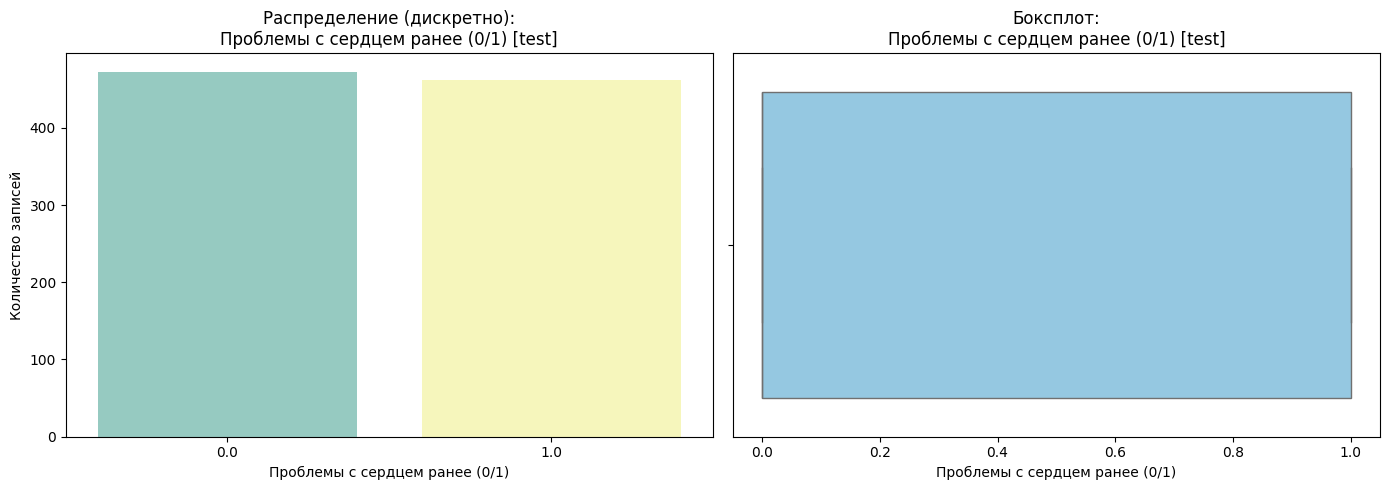

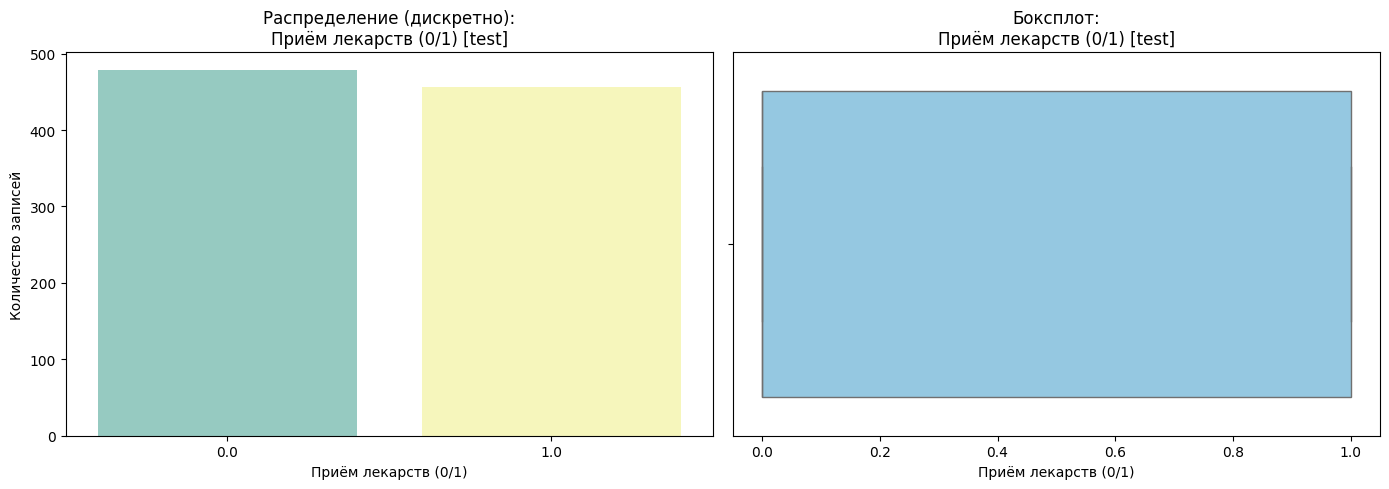

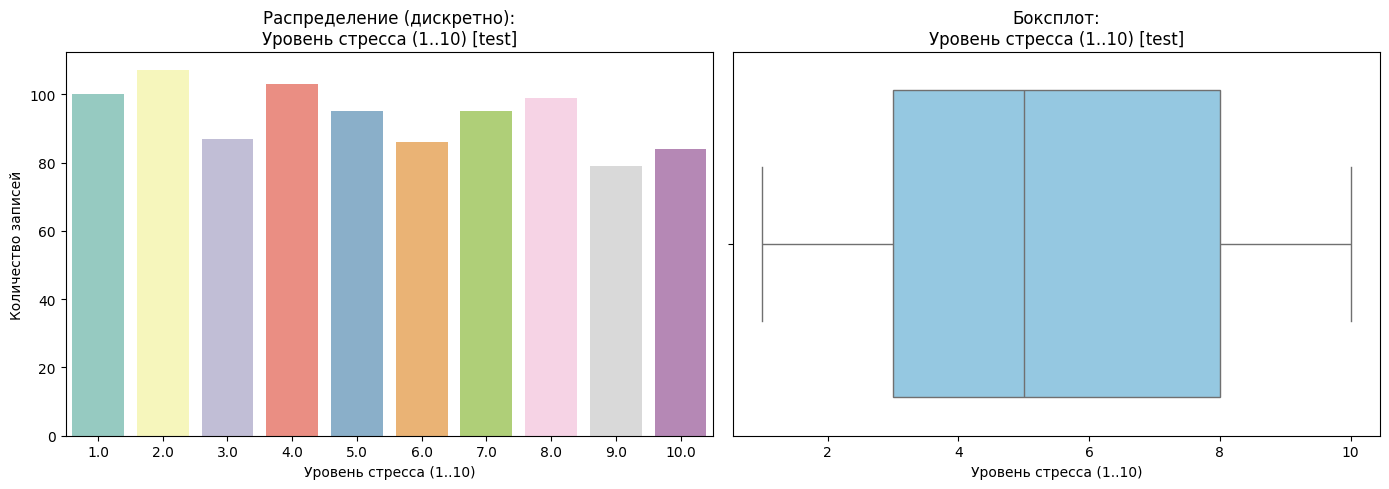

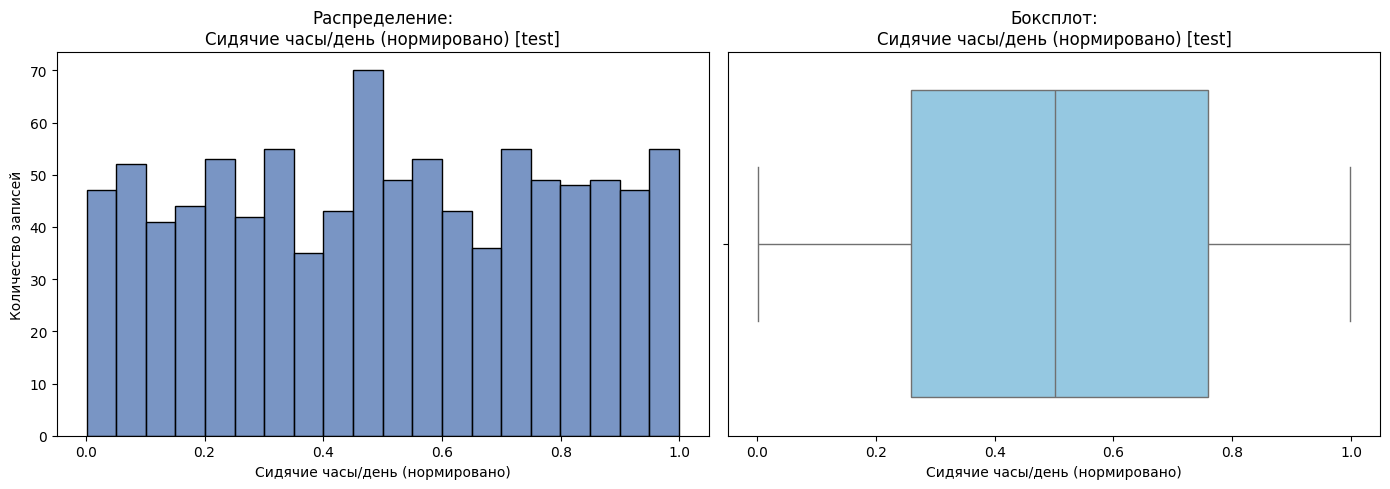

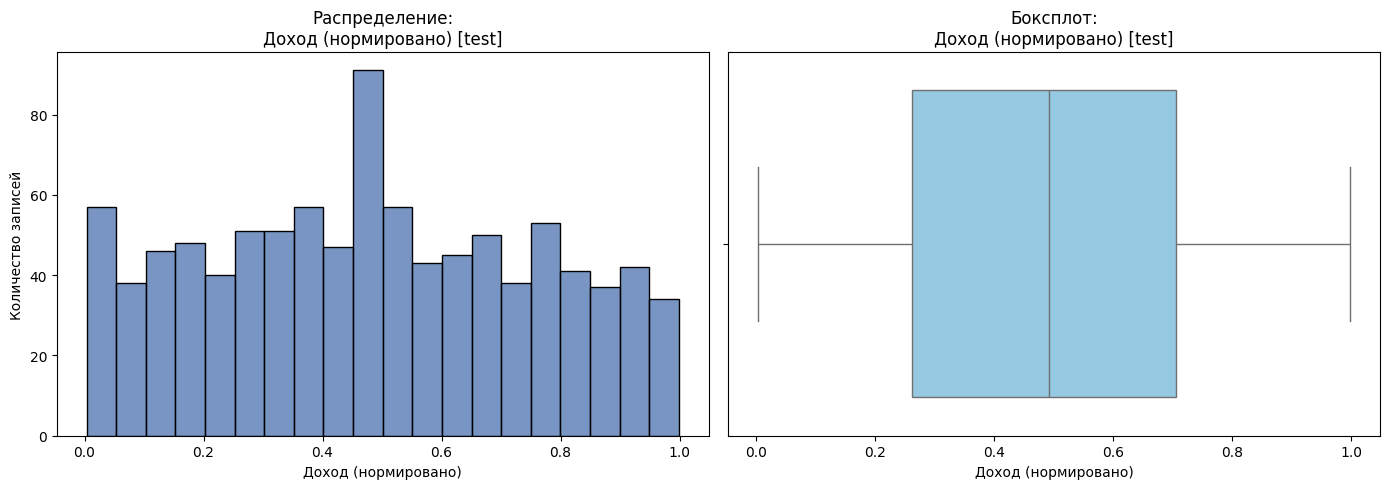

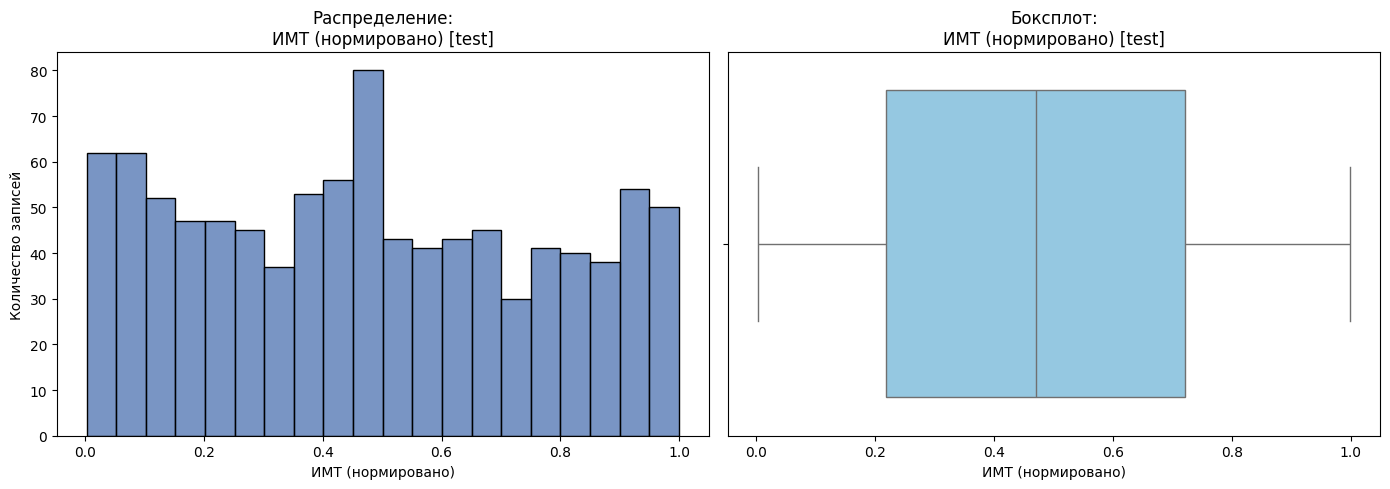

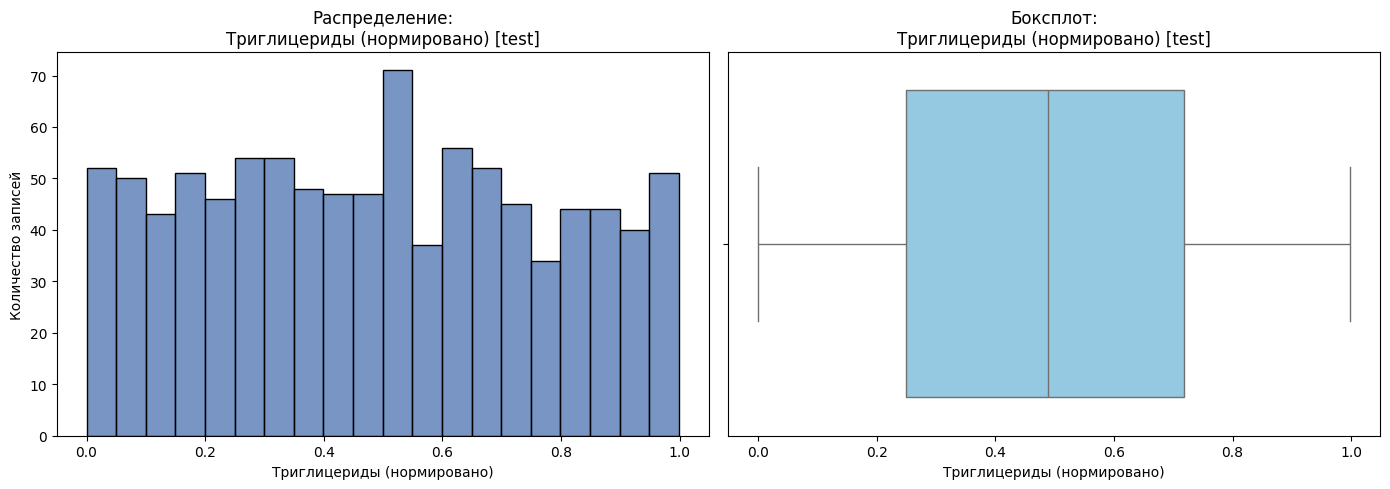

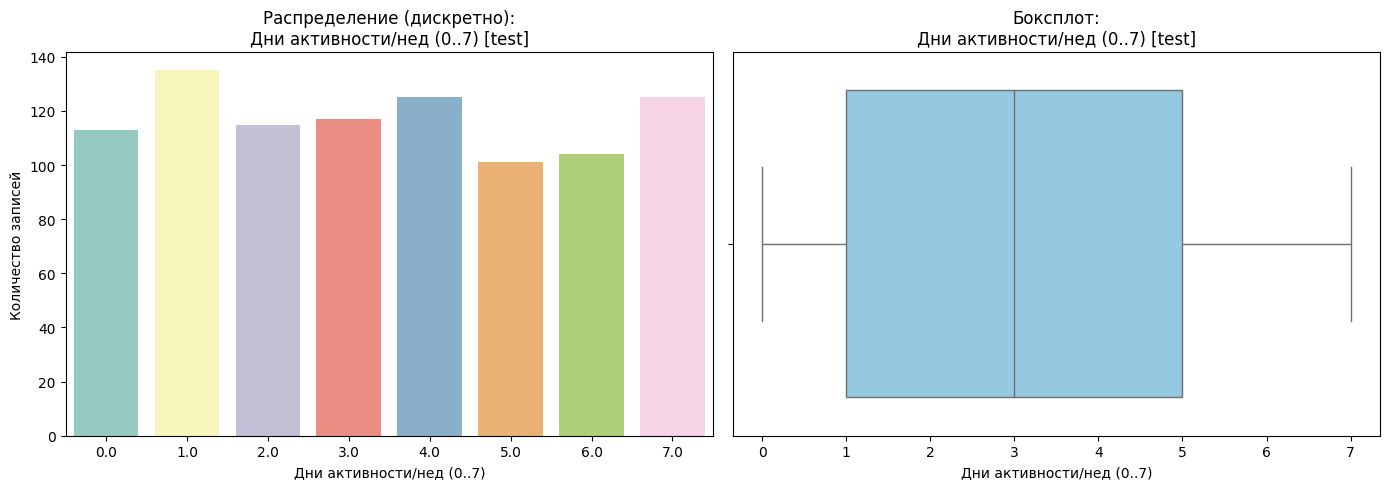

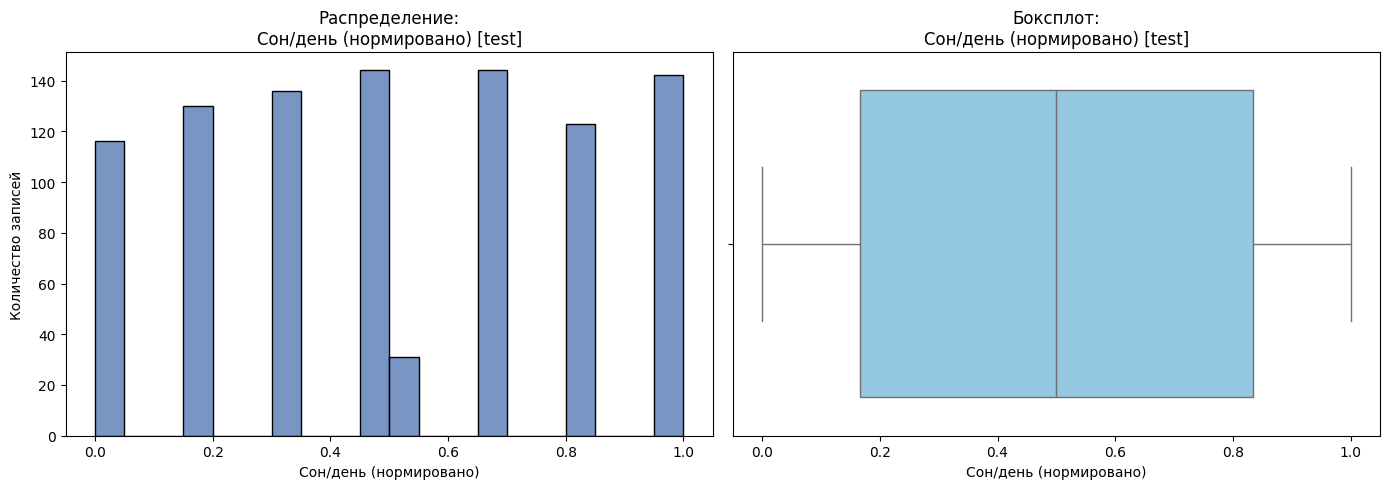

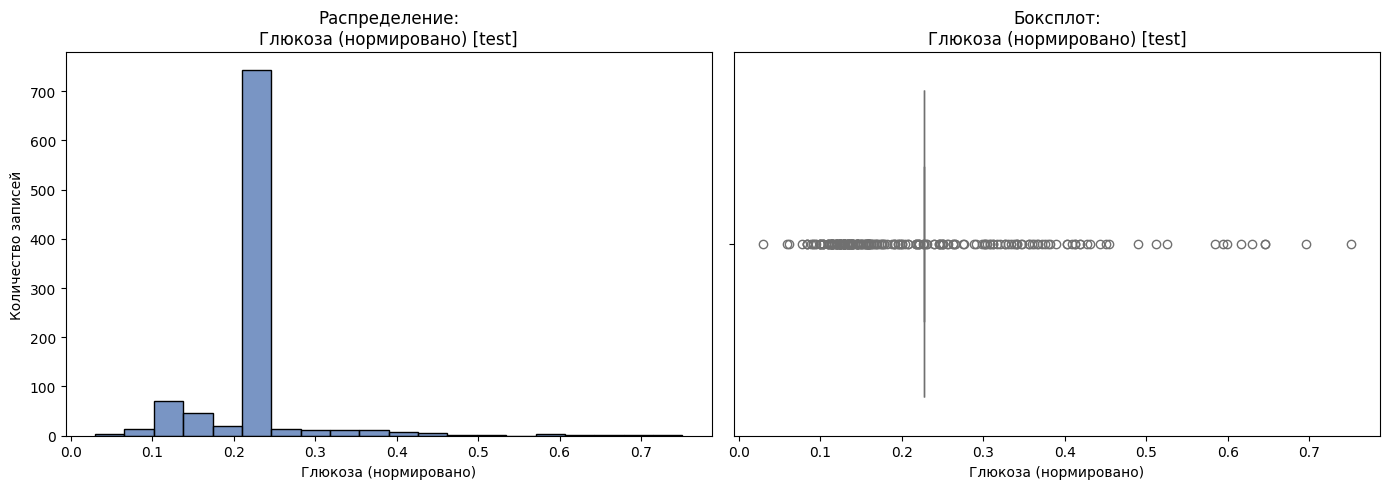

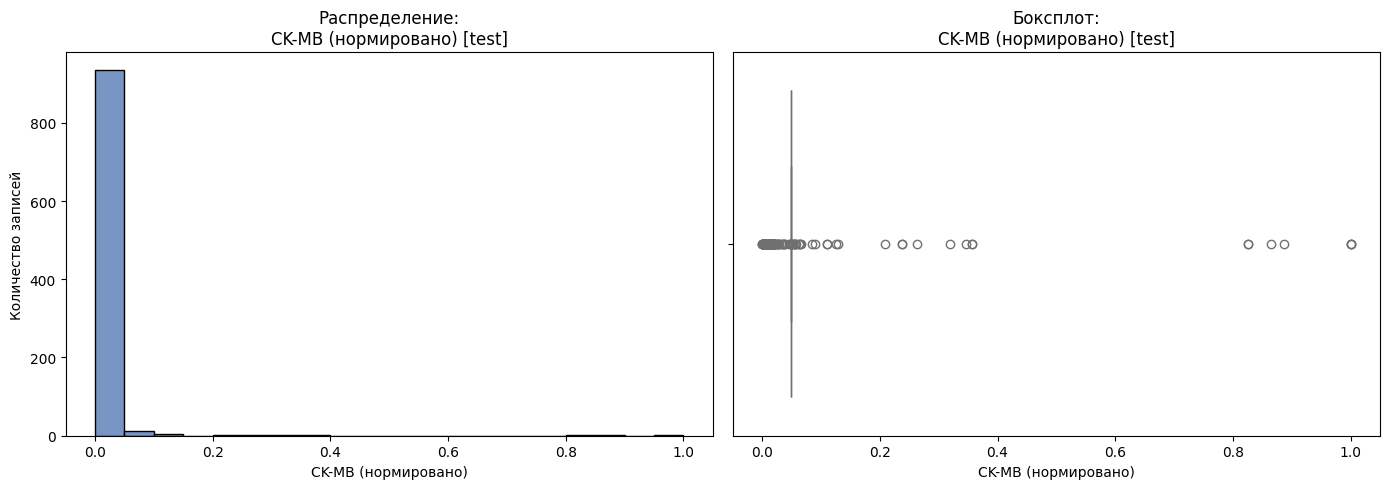

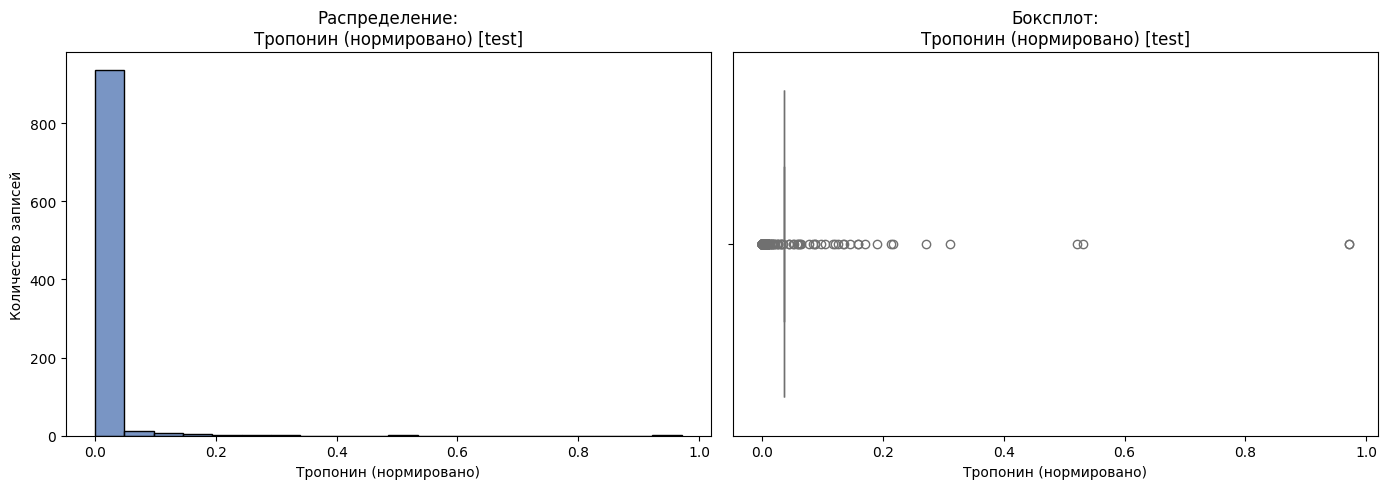

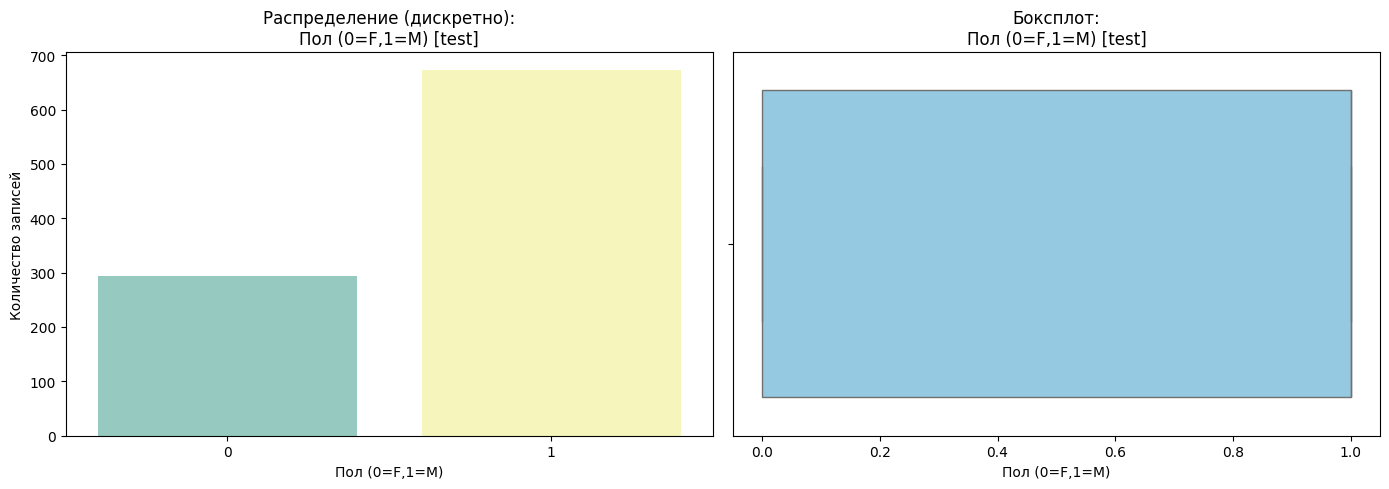

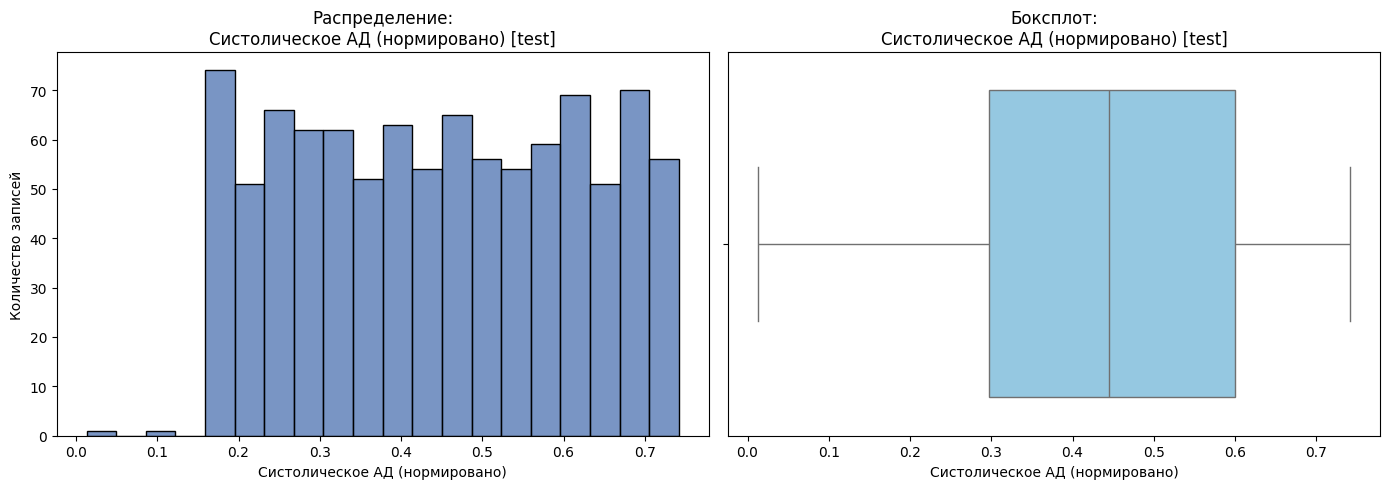

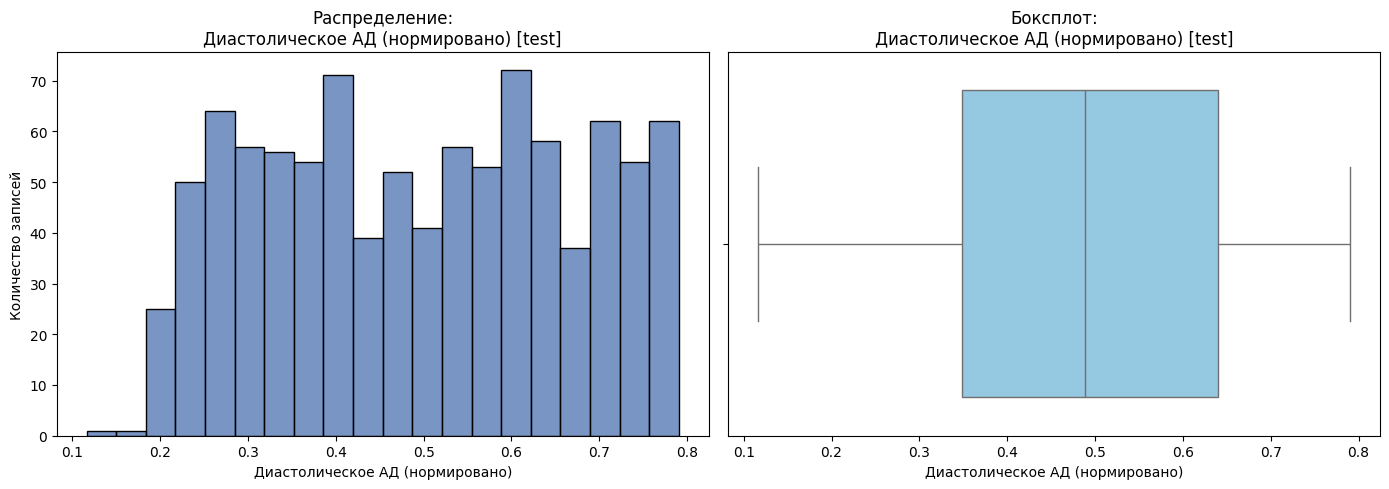

In [32]:
plot_feature_distributions(heart_test, dataset_name="test", with_hue=False)

1. –ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
gender:

–í –æ–±–æ–∏—Ö –Ω–∞–±–æ—Ä–∞—Ö –º—É–∂—á–∏–Ω –∑–∞–º–µ—Ç–Ω–æ –±–æ–ª—å—à–µ, —á–µ–º –∂–µ–Ω—â–∏–Ω.

–î–æ–ª—è –º—É–∂—á–∏–Ω –≤ test –Ω–µ–º–Ω–æ–≥–æ –≤—ã—à–µ, —á–µ–º –≤ train, –Ω–æ —Ä–∞–∑–Ω–∏—Ü–∞ –Ω–µ –∫—Ä–∏—Ç–∏—á–Ω–∞.

–¥—Ä—É–≥–∏–µ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, smoking, diabetes, –µ—Å–ª–∏ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤ —Ç–µ—Å—Ç–µ):

–û–±—â–∏–π —Ç—Ä–µ–Ω–¥ –ø–æ—Ö–æ–∂ ‚Äî –∫–ª–∞—Å—Å—ã –¥–∏—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã, –Ω–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è.

üìå –í—ã–≤–æ–¥: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–µ–∂–¥—É train –∏ test —Å—Ö–æ–∂–∏, –º–æ–¥–µ–ª—å –Ω–µ –¥–æ–ª–∂–Ω–∞ –∏—Å–ø—ã—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–±–ª–µ–º –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ.

2. –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–∂–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω—ã)
–°–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –ê–î:

Train –∏ test –∏–º–µ—é—Ç –ø–æ—á—Ç–∏ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç 0.2 –¥–æ 0.8, –±–µ–∑ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤.

–î–∏–∞—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –ê–î:

–°—Ö–æ–¥–Ω–∞—è –∫–∞—Ä—Ç–∏–Ω–∞ –≤ –æ–±–µ–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö, —Ä–∞–∑–±—Ä–æ—Å –∏ –º–µ–¥–∏–∞–Ω—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç.

üìå –í—ã–≤–æ–¥: —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Å–¥–≤–∏–≥–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ—Ç.

3. –ë–∏–æ–º–∞—Ä–∫–µ—Ä—ã (CK-MB, Troponin)
–í –æ–±–æ–∏—Ö –Ω–∞–±–æ—Ä–∞—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫—Ä–∞–π–Ω–µ —Å–∫–æ—à–µ–Ω—ã –≤–ª–µ–≤–æ (–æ—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –∑–Ω–∞—á–µ–Ω–∏–π –æ–∫–æ–ª–æ 0).

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ test —á—É—Ç—å –º–µ–Ω—å—à–µ, —á–µ–º –≤ train, —á—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –º–µ–Ω—å—à–µ–π –¥–æ–ª–µ –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤ –≤ –æ—Å—Ç—Ä–æ–π —Ñ–∞–∑–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è.

üìå –í—ã–≤–æ–¥: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–æ–≤–ø–∞–¥–∞—é—Ç –ø–æ —Ñ–æ—Ä–º–µ, –Ω–æ —á–∞—Å—Ç–æ—Ç–∞ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ test —á—É—Ç—å –Ω–∏–∂–µ. –≠—Ç–æ –º–æ–∂–µ—Ç –Ω–µ–º–Ω–æ–≥–æ —Å–Ω–∏–∑–∏—Ç—å —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–µ –∫ –≤—ã—è–≤–ª–µ–Ω–∏—é —Ç—è–∂—ë–ª—ã—Ö —Å–ª—É—á–∞–µ–≤.

4. –ü—Ä–∏–∑–Ω–∞–∫–∏ –æ–±—Ä–∞–∑–∞ –∂–∏–∑–Ω–∏
exercise_hours_per_week:

–í train —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–æ–ª–µ–µ "—Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–æ" –Ω–∞ —Å—Ä–µ–¥–Ω–µ–º —É—Ä–æ–≤–Ω–µ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, –≤ test —á—É—Ç—å –±–æ–ª–µ–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ.

sleep_hours_per_day:

–ü–æ—á—Ç–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ –æ–±–µ–∏—Ö –≤—ã–±–æ—Ä–∫–∞—Ö.

sedentary_hours_per_day:

–í test –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –≤–µ—Ä—Ö–Ω–µ–π —á–∞—Å—Ç–∏ –¥–∏–∞–ø–∞–∑–æ–Ω–∞, —á—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –±–æ–ª–µ–µ –º–∞–ª–æ–ø–æ–¥–≤–∏–∂–Ω–æ–π –≥—Ä—É–ø–ø–µ.

üìå –í—ã–≤–æ–¥: —Ä–∞–∑–ª–∏—á–∏—è –µ—Å—Ç—å, –Ω–æ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ, –º–æ–¥–µ–ª—å –Ω–µ –ø–æ—Ç—Ä–µ–±—É–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –∞–¥–∞–ø—Ç–∞—Ü–∏–∏.

5. –ü—Ä–æ–ø—É—Å–∫–∏
–ò –≤ train, –∏ –≤ test –ø—Ä–æ–ø—É—Å–∫–∏ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≥—Ä—É–ø–ø–∞–º–∏ (–æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—É—Å—Ç—ã–µ –≤ –æ–¥–Ω–æ–π –∑–∞–ø–∏—Å–∏).

–í–µ—Ä–æ—è—Ç–Ω–æ, —ç—Ç–æ –ø–∞—Ü–∏–µ–Ω—Ç—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å –æ—Ç–¥–µ–ª—å–Ω—ã–µ –æ–±—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è.

üìå –í—ã–≤–æ–¥: –≤—ã–±—Ä–∞–Ω–Ω–∞—è –¥–ª—è train —Å—Ç—Ä–∞—Ç–µ–≥–∏—è –∏–º–ø—É—Ç–∞—Ü–∏–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –¥–æ–ª–∂–Ω–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∏ –¥–ª—è test, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —Å–º–µ—â–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.

##### –í—ã–≤–æ–¥—ã –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

–î–∞–Ω–Ω—ã–µ —á–∏—Å—Ç—ã–µ, –±–µ–∑ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤, —Å —Å–∏—Å—Ç–µ–º–Ω—ã–º–∏ –ø—Ä–æ–ø—É—Å–∫–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º–æ.
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–µ–∂–¥—É train –∏ test –≤ —Ü–µ–ª–æ–º —Å–æ–≤–ø–∞–¥–∞—é—Ç, —á—Ç–æ —Å–Ω–∏–∂–∞–µ—Ç —Ä–∏—Å–∫ —Å–Ω–∏–∂–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –ø–µ—Ä–µ—Ö–æ–¥–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ.
–û—Å–Ω–æ–≤–Ω—ã–µ —Ä–∏—Å–∫–∏ ‚Äî –¥–∏—Å–±–∞–ª–∞–Ω—Å –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å–∏–ª—å–Ω–∞—è —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç—å –±–∏–æ–º–∞—Ä–∫–µ—Ä–æ–≤.
–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è: —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å —Å—Ç—Ä–∞—Ç–µ–≥–∏—é –∏–º–ø—É—Ç–∞—Ü–∏–∏, —É—á–µ—Å—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏, –¥–æ–±–∞–≤–∏—Ç—å –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –æ—Å—Ç–æ—Ä–æ–∂–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –±–∏–æ–º–∞—Ä–∫–µ—Ä–æ–≤.

#### –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

##### –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

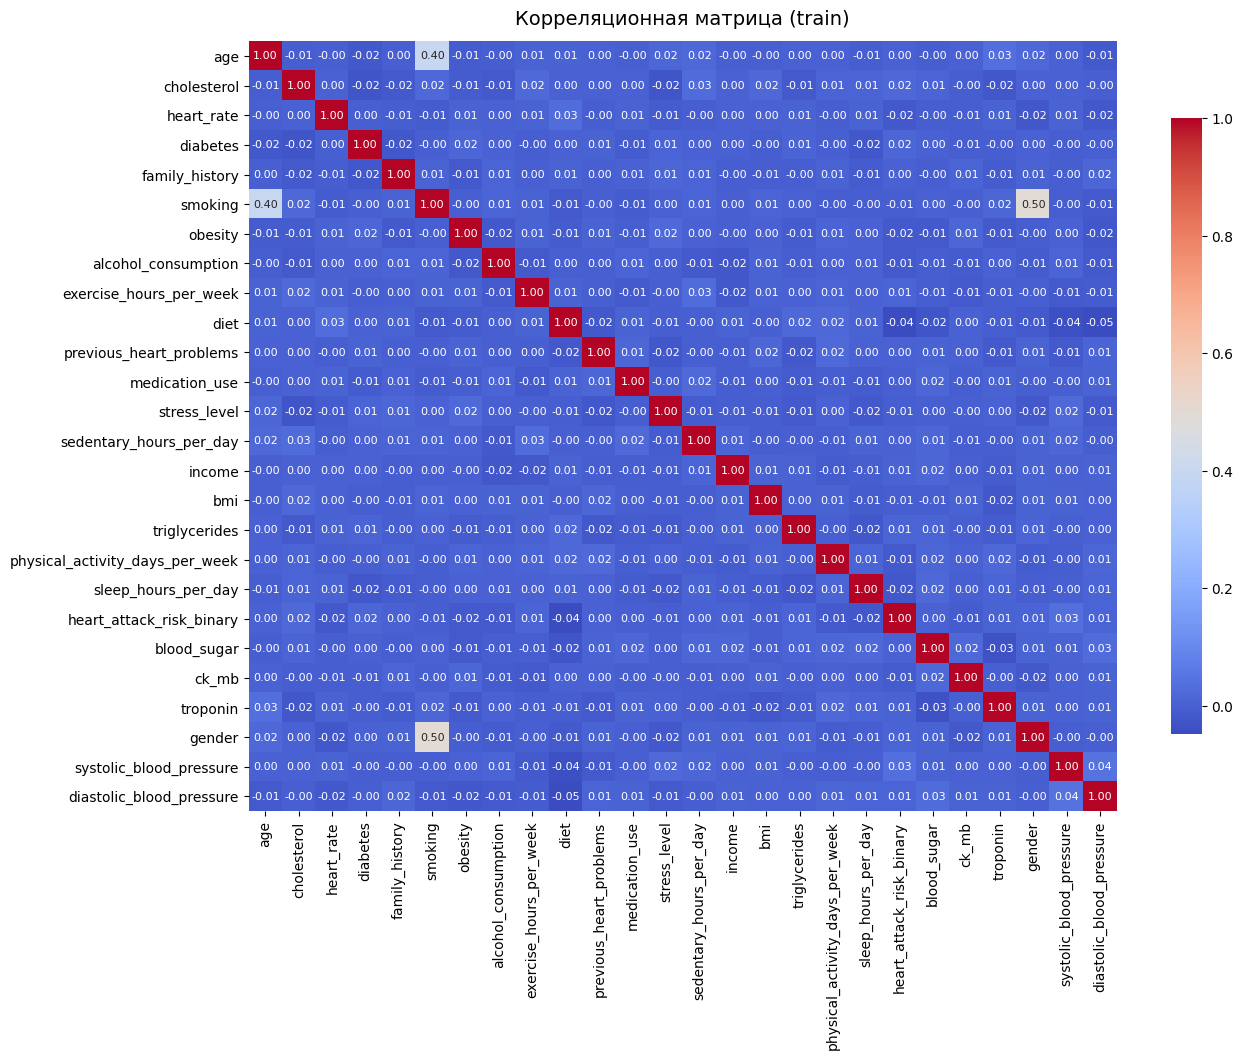

In [ ]:
def plot_correlation_matrix(df, dataset_name="train"):
    # —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    num_df = df.select_dtypes(include='number')
    corr = num_df.corr()

    plt.figure(figsize=(14, 10))
    sns.heatmap(
        corr,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        annot_kws={"size": 8},
        cbar_kws={'shrink': 0.8}
    )
    plt.title(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ ({dataset_name})", fontsize=14, pad=12)
    plt.show()


plot_correlation_matrix(heart_train, dataset_name="train")

1. –û–±—â–∞—è –∫–∞—Ä—Ç–∏–Ω–∞

–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤ —Ü–µ–ª–æ–º –Ω–∏–∑–∫–∏–µ —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏: –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –ü–∏—Ä—Å–æ–Ω–∞ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ -0.05‚Ä¶0.05.

–Ø—Ä–∫–æ –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã—Ö –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω—ã—Ö –ø–∞—Ä (>|0.8|) –Ω–µ—Ç ‚Äî —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ –±—É–¥–µ—Ç —Å—Ç—Ä–∞–¥–∞—Ç—å –æ—Ç —Å–∏–ª—å–Ω–æ–π –∏–∑–±—ã—Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

2. –í—ã–¥–µ–ª—è—é—â–∏–µ—Å—è —Å–≤—è–∑–∏

smoking ‚Üî age: -0.40 ‚Äî –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, —É–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –∫—É—Ä–µ–Ω–∏–µ —á–∞—â–µ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —É –±–æ–ª–µ–µ –º–æ–ª–æ–¥—ã—Ö –ø–∞—Ü–∏–µ–Ω—Ç–æ–≤.

gender ‚Üî smoking: 0.50 ‚Äî —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, –≤–µ—Ä–æ—è—Ç–Ω–æ, –∫—É—Ä–µ–Ω–∏–µ –±–æ–ª—å—à–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–æ —Å—Ä–µ–¥–∏ –æ–¥–Ω–æ–≥–æ –ø–æ–ª–∞ (–Ω—É–∂–Ω–æ —É—á–µ—Å—Ç—å –ø—Ä–∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –º–æ–¥–µ–ª–µ–π).

age ‚Üî smoking: —É–∂–µ —É–ø–æ–º—è–Ω—É—Ç–∞—è –æ–±—Ä–∞—Ç–Ω–∞—è —Å–≤—è–∑—å, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –Ω–∞ –ø—Ä–∏–≤—ã—á–∫–∏.

–û—Å—Ç–∞–ª—å–Ω—ã–µ —Å–≤—è–∑–∏ –Ω–µ –ø—Ä–µ–≤—ã—à–∞—é—Ç |0.05|, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Å–ª–∞–±–æ–π –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

3. –¶–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫

heart_attack_risk_binary —Å–ª–∞–±–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å –ª—é–±—ã–º–∏ –æ—Ç–¥–µ–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ (|corr| < 0.05). –≠—Ç–æ –æ–∂–∏–¥–∞–µ–º–æ –¥–ª—è –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –≥–¥–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Ç—Ä–µ–±—É–µ—Ç –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —Ñ–∞–∫—Ç–æ—Ä–æ–≤.

–≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –¥–æ–ª–∂–Ω–∞ —É–ª–∞–≤–ª–∏–≤–∞—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∏ –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –∞ –Ω–µ –ø–æ–ª–∞–≥–∞—Ç—å—Å—è –Ω–∞ –æ–¥–∏–Ω-–¥–≤–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è.

4. –í—ã–≤–æ–¥—ã –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

–û–ø–∞—Å–Ω–æ—Å—Ç–∏ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –Ω–µ—Ç ‚Äî –º–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–ª—è—Ç—å –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫—Ä–æ–º–µ, –≤–æ–∑–º–æ–∂–Ω–æ, –ø–∞—Ä—ã smoking –∏ gender, –≥–¥–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è 0.50 –º–æ–∂–µ—Ç –¥–∞—Ç—å –∏–∑–±—ã—Ç–æ—á–Ω–æ—Å—Ç—å –≤ –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª—è—Ö.

–°–ª–∞–±—ã–µ —Å–≤—è–∑–∏ —Å —Ç–∞—Ä–≥–µ—Ç–æ–º ‚Äî –ø—Ä–∏–∑–Ω–∞–∫ —Ç–æ–≥–æ, —á—Ç–æ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –≤ —á–∏—Å—Ç–æ–º –≤–∏–¥–µ –±—É–¥–µ—Ç —Å–ª–∞–±–æ–π, –∞ –¥–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π, –±—É—Å—Ç–∏–Ω–≥ –∏–ª–∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Å–º–æ–≥—É—Ç –∏–∑–≤–ª–µ—á—å –±–æ–ª—å—à–µ –ø–æ–ª—å–∑—ã –∏–∑ –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–ü—Ä–∏ –æ—Ç–±–æ—Ä–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ª—É—á—à–µ –æ–ø–∏—Ä–∞—Ç—å—Å—è –Ω–µ —Ç–æ–ª—å–∫–æ –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é, –Ω–æ –∏ –Ω–∞ feature importance –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è.



–í —Ç–≤–æ—ë–º —Å–ª—É—á–∞–µ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –º–æ–≥—É—Ç –±—ã—Ç—å:

1. previous_heart_problems
–õ–æ–≥–∏—á–Ω–æ, —á—Ç–æ –ø—Ä–æ—à–ª—ã–µ –ø—Ä–æ–±–ª–µ–º—ã —Å —Å–µ—Ä–¥—Ü–µ–º –Ω–∞–ø—Ä—è–º—É—é —Å–≤—è–∑–∞–Ω—ã —Å —Ä–∏—Å–∫–æ–º —Å–µ—Ä–¥–µ—á–Ω–æ–≥–æ –ø—Ä–∏—Å—Ç—É–ø–∞.

–ï—Å–ª–∏ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ —Ñ–∏–∫—Å–∏—Ä—É–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –¥–ª—è —Ç–µ—Ö, —É –∫–æ–≥–æ —É–∂–µ –±—ã–ª –¥–∏–∞–≥–Ω–æ–∑, –æ–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–Ω—ã–º –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–º –∏ –æ—Ç—Ä–∞–∂–∞—Ç—å —É–∂–µ —Å–ª—É—á–∏–≤—à–µ–µ—Å—è —Å–æ–±—ã—Ç–∏–µ, –∞ –Ω–µ —Ä–∏—Å–∫.

2. medication_use
–ï—Å–ª–∏ –≤ –¥–∞–Ω–Ω—ã–µ –ø–æ–ø–∞–¥–∞—é—Ç –ª–µ–∫–∞—Ä—Å—Ç–≤–∞, –Ω–∞–∑–Ω–∞—á–µ–Ω–Ω—ã–µ –ø–æ—Å–ª–µ –≤—ã—è–≤–ª–µ–Ω–∏—è –±–æ–ª–µ–∑–Ω–∏, —ç—Ç–æ –ø—Ä—è–º–æ–π –ø—É—Ç—å –∫ —É—Ç–µ—á–∫–µ.

–û—Å–æ–±–µ–Ω–Ω–æ, –µ—Å–ª–∏ —ç—Ç–∏ –ø—Ä–µ–ø–∞—Ä–∞—Ç—ã –ø—Ä–∏–º–µ–Ω—è—é—Ç—Å—è –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏ –ª–µ—á–µ–Ω–∏–∏ —Å–µ—Ä–¥–µ—á–Ω—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.

3. ck_mb –∏ troponin
–≠—Ç–æ –±–∏–æ–º–∞—Ä–∫–µ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –∏–∑–º–µ—Ä—è—é—Ç –≤–æ –≤—Ä–µ–º—è –∏–ª–∏ —Å—Ä–∞–∑—É –ø–æ—Å–ª–µ –∏–Ω—Ñ–∞—Ä–∫—Ç–∞.

–ò—Ö –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –Ω–µ –ø—Ä–æ—Å—Ç–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞—Ç—å, –∞ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ —É–∫–∞–∑—ã–≤–∞—Ç—å, —á—Ç–æ —Å–æ–±—ã—Ç–∏–µ —É–∂–µ –ø—Ä–æ–∏–∑–æ—à–ª–æ.

–î–ª—è –∑–∞–¥–∞—á –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ç–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ–±—ã—á–Ω–æ –∏—Å–∫–ª—é—á–∞—é—Ç –∏–ª–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ç–æ–ª—å–∫–æ –≤ –∑–∞–¥–∞—á–∞—Ö –ø–æ—Å—Ç-—Ñ–∞–∫—Ç—É–º –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∏.

4. blood_sugar, cholesterol, triglycerides (–≤ –º–µ–Ω—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏)
–°–∞–º–∏ –ø–æ —Å–µ–±–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è —É—Ç–µ—á–∫–æ–π, –Ω–æ –µ—Å–ª–∏ –∑–∞–º–µ—Ä—ã –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å –ø–æ—Å–ª–µ –æ—Å—Ç—Ä–æ–≥–æ —ç–ø–∏–∑–æ–¥–∞, –æ–Ω–∏ –º–æ–≥—É—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å —Å–ª–µ–¥—ã —É–∂–µ —Å–ª—É—á–∏–≤—à–µ–≥–æ—Å—è —Å–æ–±—ã—Ç–∏—è.

5. medication_use + previous_heart_problems –≤ —Å–≤—è–∑–∫–µ
–ï—Å–ª–∏ –º–æ–¥–µ–ª—å —É–≤–∏–¥–∏—Ç –∏ —Ç–æ, –∏ –¥—Ä—É–≥–æ–µ, –æ–Ω–∞ –º–æ–∂–µ—Ç –ø–æ—á—Ç–∏ –Ω–∞–ø—Ä—è–º—É—é "—É–≥–∞–¥—ã–≤–∞—Ç—å" –∫–ª–∞—Å—Å.

##### –ê–Ω–∞–ª–∏–∑ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏–π —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å –≤—Ö–æ–¥–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

–ü–µ—Ä–µ–¥ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ–º –∏ –æ—Ç–±–æ—Ä–æ–º –º–æ–¥–µ–ª–µ–π –≤–∞–∂–Ω–æ –ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–≥—É—Ç –±—ã—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π heart_attack_risk_binary (–Ω–∞–ª–∏—á–∏–µ/–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Ä–∏—Å–∫–∞ —Å–µ—Ä–¥–µ—á–Ω–æ–≥–æ –ø—Ä–∏—Å—Ç—É–ø–∞).
–¢–∞–∫–æ–π –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–º–æ–≥–∞–µ—Ç:

–≤—ã—è–≤–∏—Ç—å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏–∑–Ω–∞–∫–∏, –Ω–∞–ø—Ä—è–º—É—é —É–∫–∞–∑—ã–≤–∞—é—â–∏–µ –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞),

–æ–±–Ω–∞—Ä—É–∂–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å —Å–∏–ª—å–Ω–æ–π –¥–∏—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–æ–π –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏,

–æ—Ü–µ–Ω–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —á–∞—Å—Ç–æ—Ç—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π,

–ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –º–æ–≥—É—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –≤–∞–∂–Ω—ã–º–∏ –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏.

–î–ª—è —ç—Ç–æ–≥–æ –º—ã —Ä–∞–∑–¥–µ–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –¥–≤–∞ —Ç–∏–ø–∞:

–ë–∏–Ω–∞—Ä–Ω—ã–µ –∏ –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–µ ‚Äî –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —á–µ—Ä–µ–∑ countplot, —á—Ç–æ–±—ã —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ —Ç–∞—Ä–≥–µ—Ç–∞.

–ù–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ ‚Äî –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —á–µ—Ä–µ–∑ boxplot (–ø–æ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º), —á—Ç–æ–±—ã —É–≤–∏–¥–µ—Ç—å —Ä–∞–∑–ª–∏—á–∏—è –≤ –º–µ–¥–∏–∞–Ω–∞—Ö –∏ –≤—ã–±—Ä–æ—Å–∞—Ö –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏.

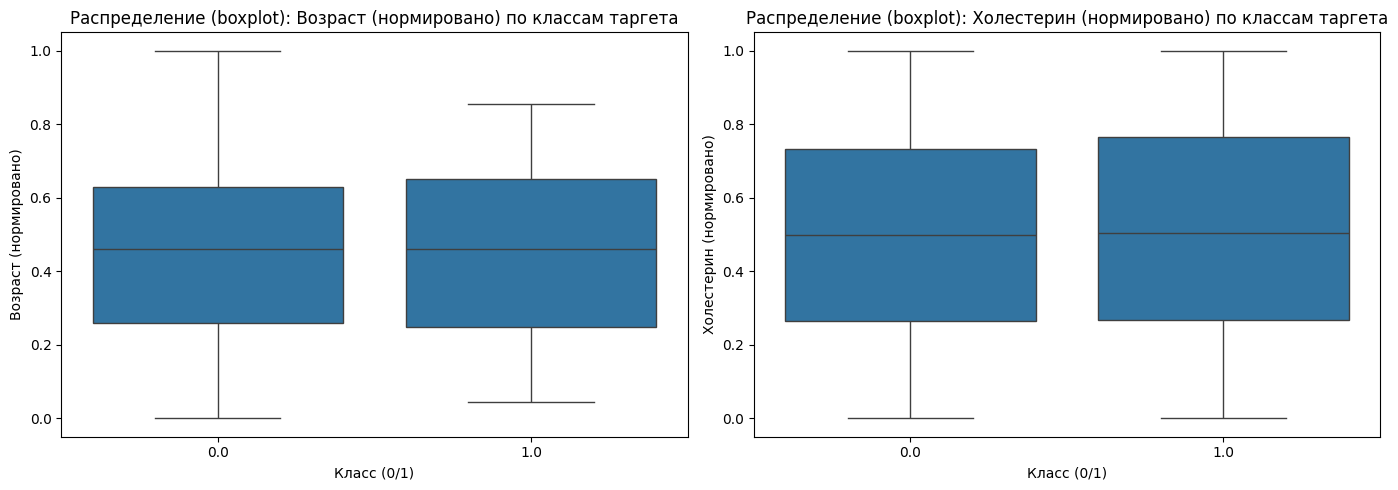

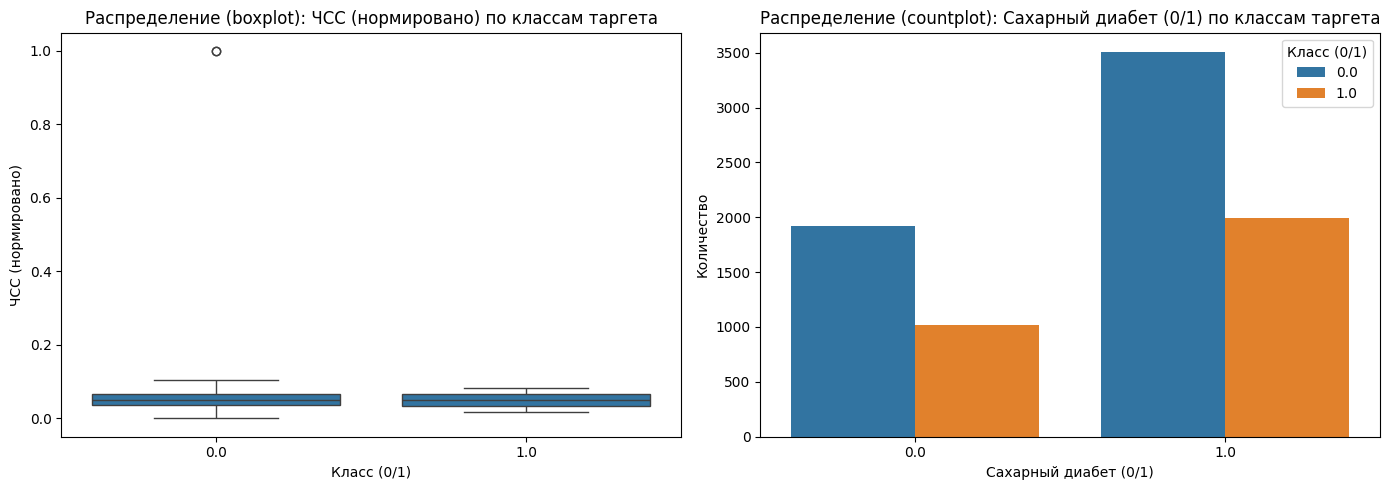

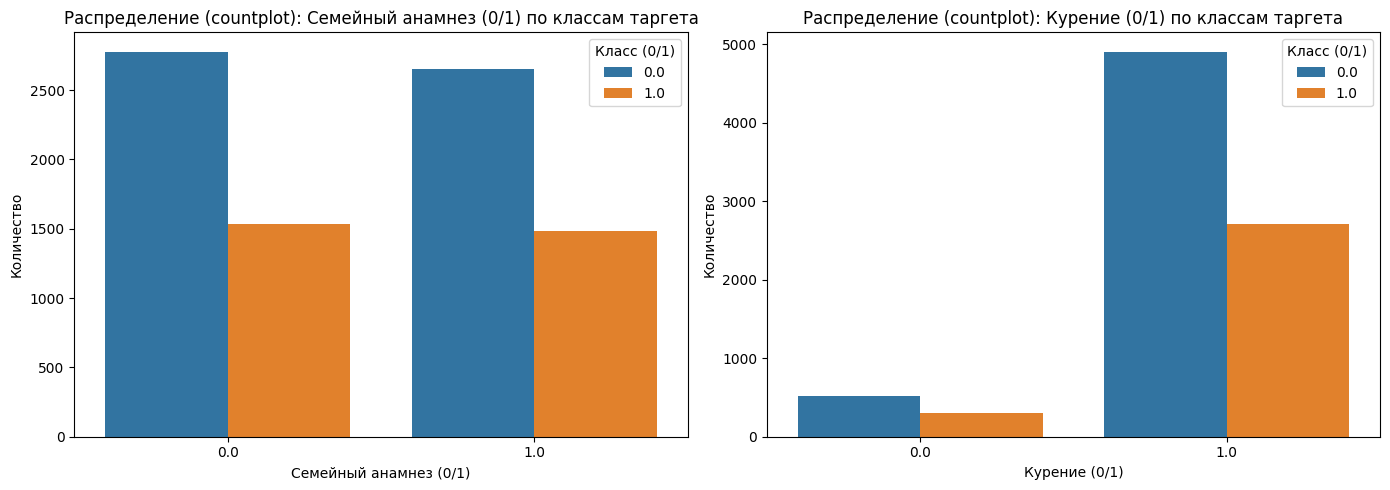

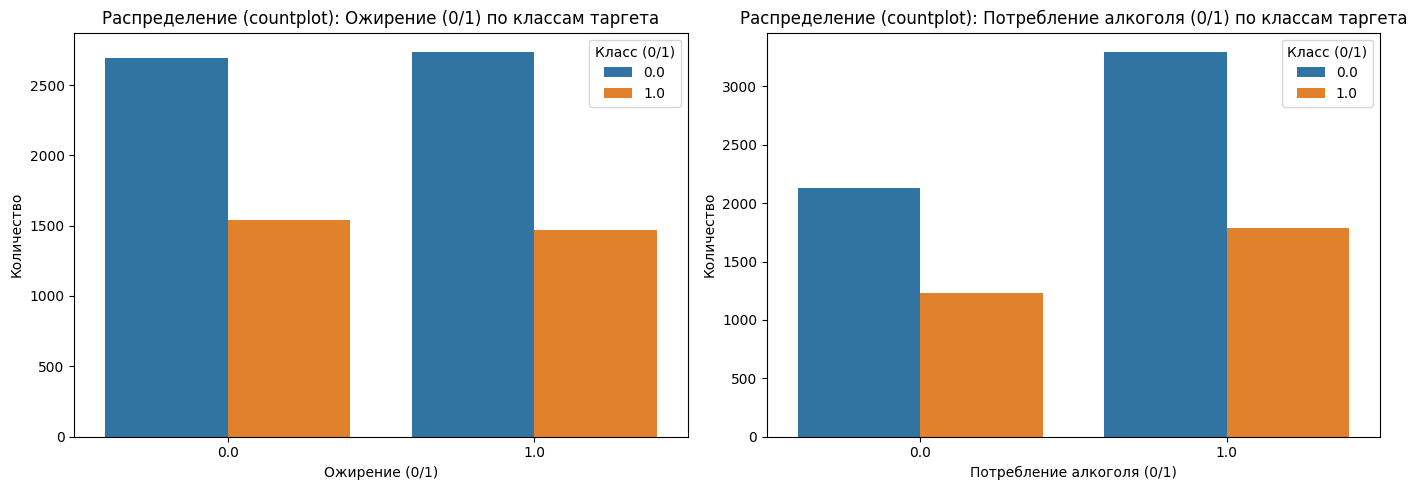

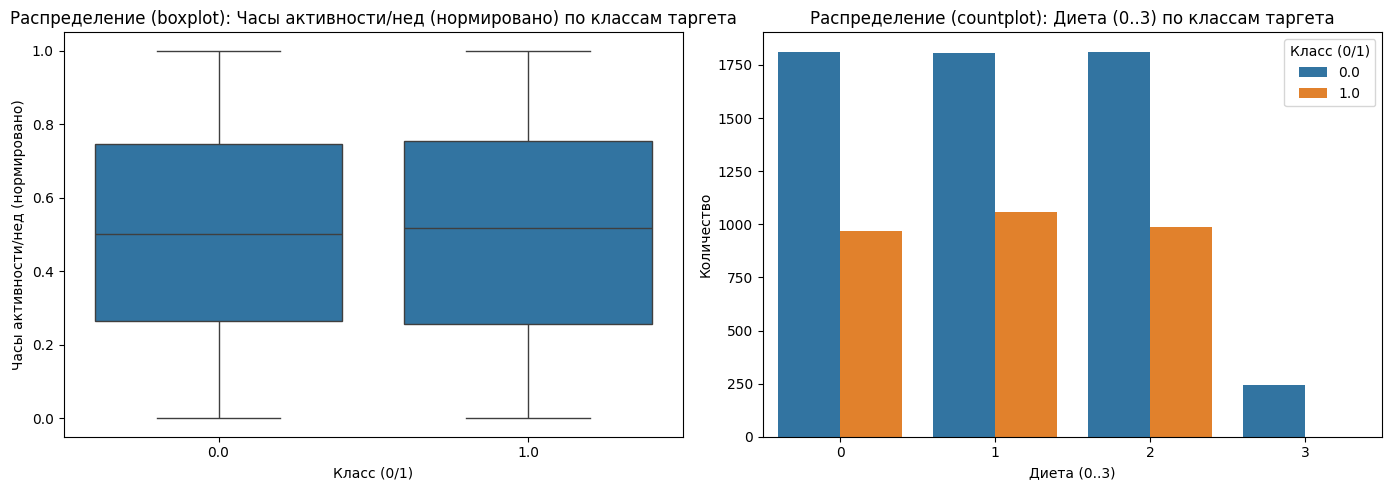

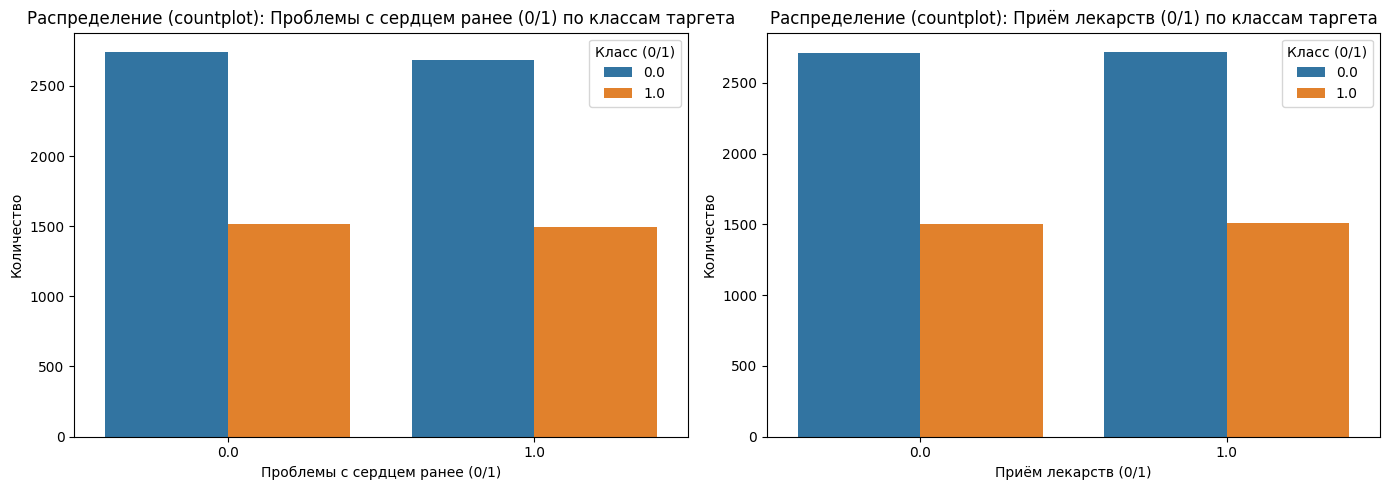

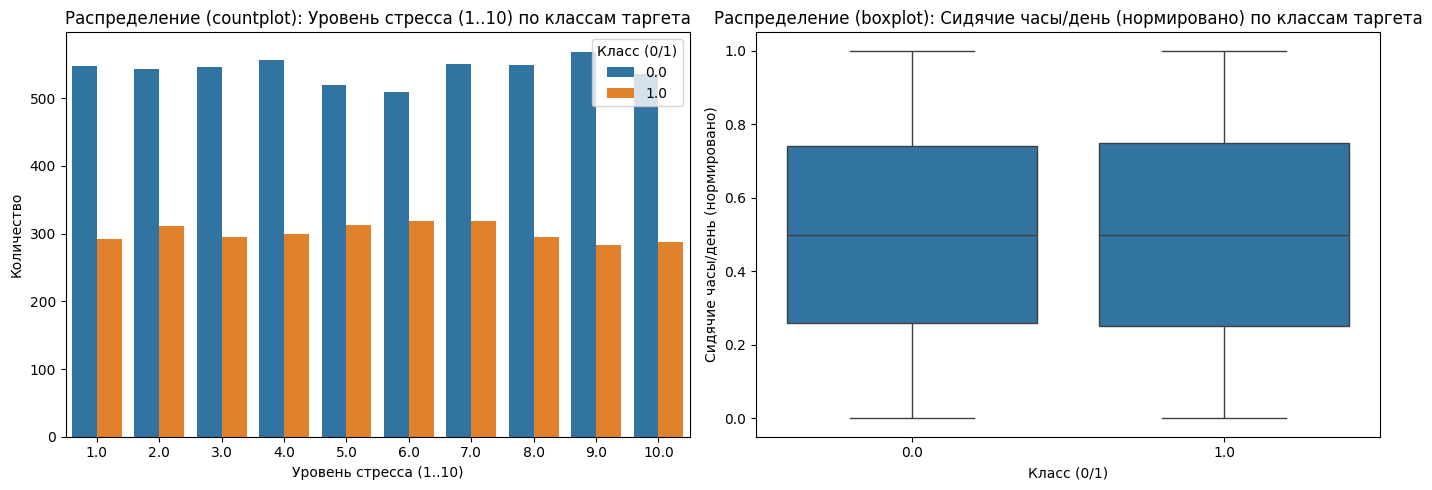

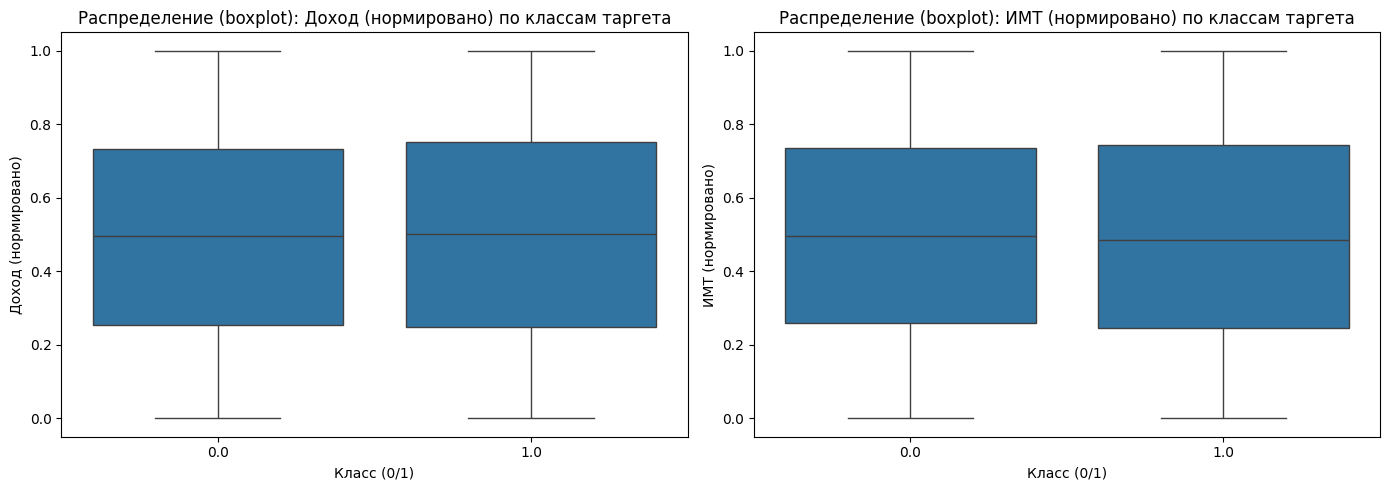

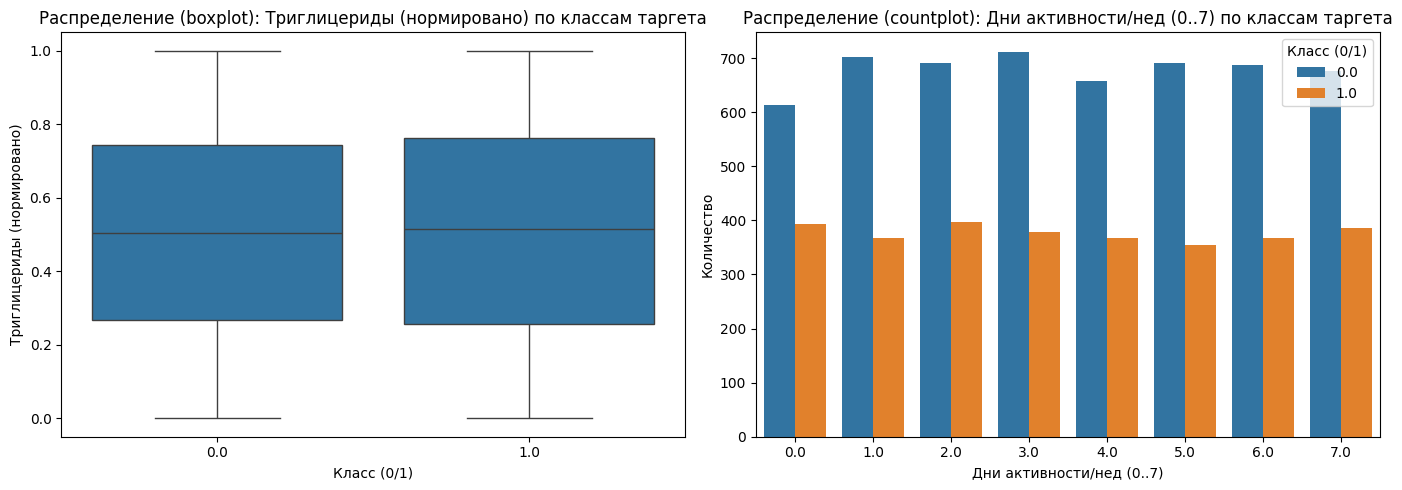

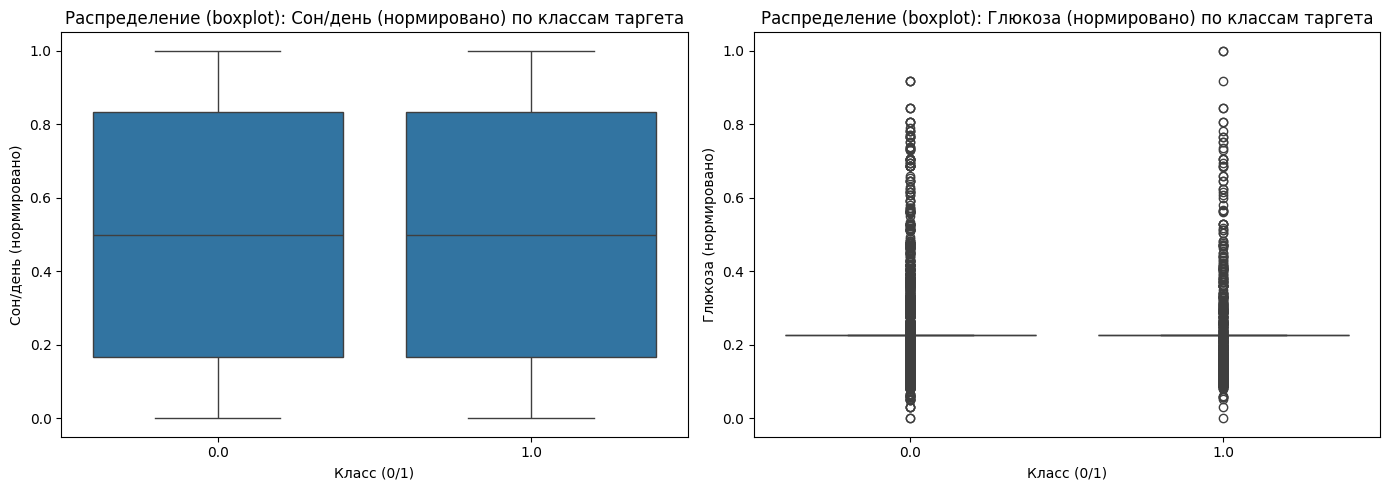

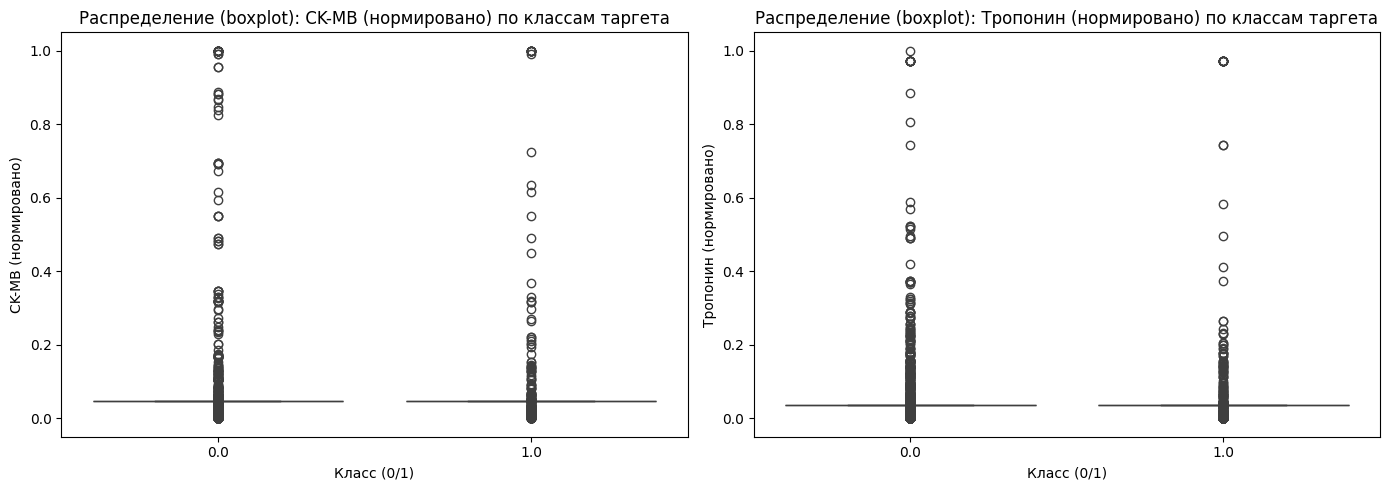

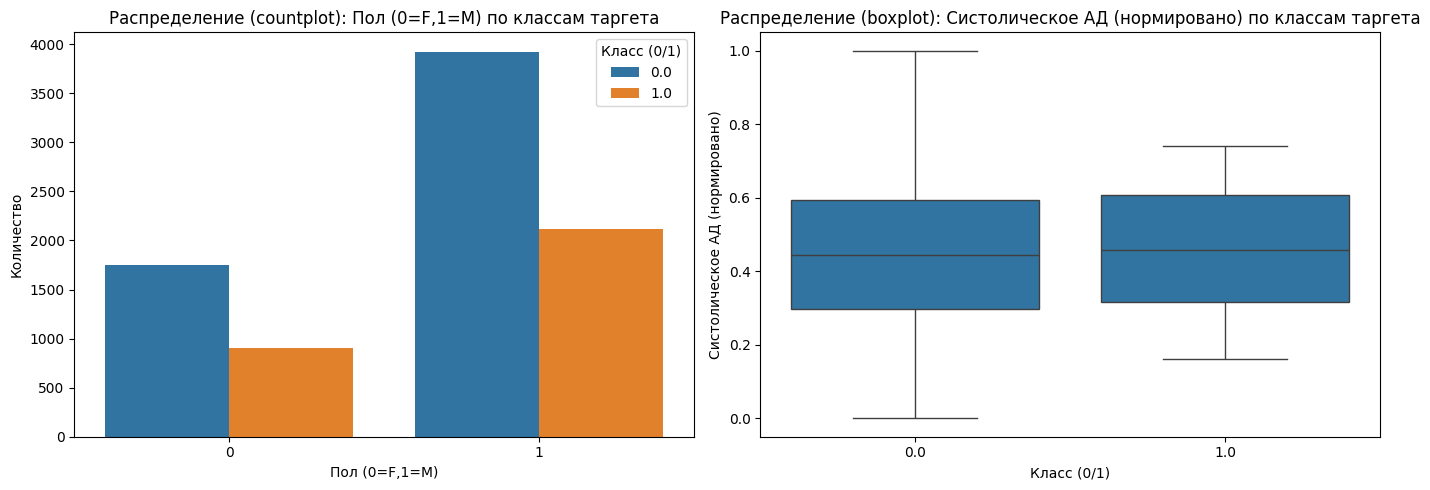

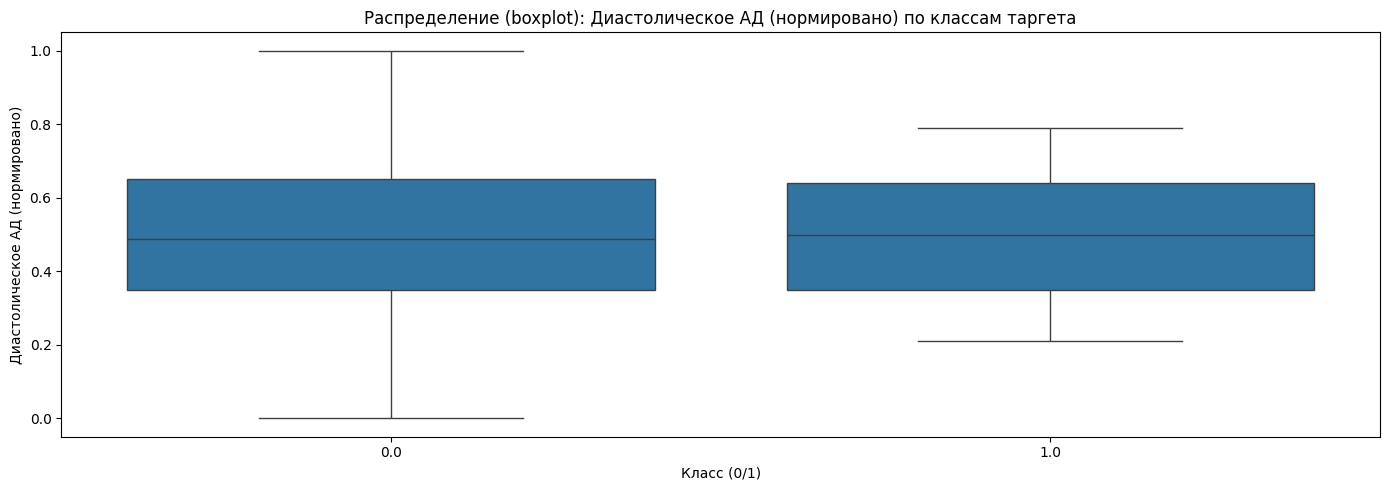

In [44]:
num_cols = heart_train.select_dtypes(include="number").columns.tolist()
feature_cols = [c for c in num_cols if c != TARGET_COL]

for i in range(0, len(feature_cols), 2):
    n_subplots = min(2, len(feature_cols) - i)
    fig, axes = plt.subplots(1, n_subplots, figsize=(14, 5))
    if n_subplots == 1:
        axes = [axes]

    for j in range(n_subplots):
        col = feature_cols[i + j]
        label = axis_labels.get(col, col)

        # –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –±–µ–∑ NaN
        dfp = heart_train[[TARGET_COL, col]].dropna()

        # –µ—Å–ª–∏ –ø—É—Å—Ç–æ ‚Äî –ø—Ä–æ–ø—É—Å–∫–∞–µ–º
        if dfp.empty:
            axes[j].set_visible(False)
            continue

        # –≤—ã–±–æ—Ä —Ç–∏–ø–∞ –≥—Ä–∞—Ñ–∏–∫–∞
        if is_discrete_feature(heart_train[col]):
            # --- –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–π/–±–∏–Ω–∞—Ä–Ω—ã–π: countplot
            order_x = sorted(dfp[col].unique())
            hue_order = sorted(dfp[TARGET_COL].unique())
            sns.countplot(
                data=dfp, x=col, hue=TARGET_COL,
                order=order_x, hue_order=hue_order, ax=axes[j]
            )
            axes[j].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (countplot): {label} –ø–æ –∫–ª–∞—Å—Å–∞–º —Ç–∞—Ä–≥–µ—Ç–∞')
            axes[j].set_xlabel(label)
            axes[j].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
            axes[j].legend(title='–ö–ª–∞—Å—Å (0/1)')
        else:
            # --- –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–π (–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–π): boxplot
            # –µ—Å–ª–∏ –æ—Å—Ç–∞–ª—Å—è —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –∫–ª–∞—Å—Å ‚Äî —Å–º—ã—Å–ª–∞ –≤ boxplot –Ω–µ—Ç
            cls_present = sorted(dfp[TARGET_COL].unique())
            if len(cls_present) < 2:
                axes[j].text(0.5, 0.5, '–ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∫–ª–∞—Å—Å–æ–≤ –¥–ª—è boxplot',
                             ha='center', va='center', transform=axes[j].transAxes)
                axes[j].set_axis_off()
                continue

            sns.boxplot(
                data=dfp, x=TARGET_COL, y=col,
                order=cls_present, showfliers=True, ax=axes[j]
            )
            axes[j].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ (boxplot): {label} –ø–æ –∫–ª–∞—Å—Å–∞–º —Ç–∞—Ä–≥–µ—Ç–∞')
            axes[j].set_xlabel('–ö–ª–∞—Å—Å (0/1)')
            axes[j].set_ylabel(label)

    plt.tight_layout()
    plt.show()

1. –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –∏ –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏

–í–æ–∑—Ä–∞—Å—Ç –∏ —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω ‚Äî –∑–∞–º–µ—Ç–Ω–æ–≥–æ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ –Ω–µ—Ç, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ö–æ–∂–∏.

–ß–°–° ‚Äî –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—á—Ç–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã, –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–∏–∑–∫–∞—è.

2. –ë–∏–Ω–∞—Ä–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã —Ä–∏—Å–∫–∞

–î–∏–∞–±–µ—Ç, —Å–µ–º–µ–π–Ω—ã–π –∞–Ω–∞–º–Ω–µ–∑, –æ–∂–∏—Ä–µ–Ω–∏–µ, –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –∞–ª–∫–æ–≥–æ–ª—è ‚Äî —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –∫–ª–∞—Å—Å–∞–º –ø–æ—á—Ç–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ, –≤–∏–∑—É–∞–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç.

–ö—É—Ä–µ–Ω–∏–µ ‚Äî –æ–±–∞ –∫–ª–∞—Å—Å–∞ –∏–º–µ—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –¥–æ–ª—é –∫—É—Ä–∏–ª—å—â–∏–∫–æ–≤, –Ω–æ –µ—Å—Ç—å —Ä–µ–¥–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã –≤ –¥–∞–Ω–Ω—ã—Ö.

–ü—Ä–æ–±–ª–µ–º—ã —Å —Å–µ—Ä–¥—Ü–µ–º —Ä–∞–Ω–µ–µ ‚Äî —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ, –Ω–æ –ª–æ–≥–∏—á–µ—Å–∫–∏ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å –≤—ã—Å–æ–∫—É—é –ø—Ä–æ–≥–Ω–æ—Å—Ç–∏—á–µ—Å–∫—É—é —Ü–µ–Ω–Ω–æ—Å—Ç—å.

3. –û–±—Ä–∞–∑ –∂–∏–∑–Ω–∏ –∏ –ø–æ–≤–µ–¥–µ–Ω–∏–µ

–ß–∞—Å—ã –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤ –Ω–µ–¥–µ–ª—é, –¥–Ω–∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤ –Ω–µ–¥–µ–ª—é, —Å–æ–Ω, —Å–∏–¥—è—á–µ–µ –≤—Ä–µ–º—è ‚Äî —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å–¥–≤–∏–≥–æ–≤ –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ –Ω–µ—Ç, –º–µ–¥–∏–∞–Ω—ã –ø–æ—á—Ç–∏ —Ä–∞–≤–Ω—ã.

–î–æ—Ö–æ–¥ ‚Äî –Ω–µ–±–æ–ª—å—à–æ–µ —Å–º–µ—â–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω—ã —É –∫–ª–∞—Å—Å–∞ 1 –≤ —Å—Ç–æ—Ä–æ–Ω—É —á—É—Ç—å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–æ –≤–∏–∑—É–∞–ª—å–Ω–æ —ç—Ñ—Ñ–µ–∫—Ç —Å–ª–∞–±—ã–π.

4. –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏

–ì–ª—é–∫–æ–∑–∞, –°–ö-–ú–í, —Ç—Ä–æ–ø–æ–Ω–∏–Ω ‚Äî —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –ø—Ä–∏ –Ω–∏–∑–∫–∏—Ö –º–µ–¥–∏–∞–Ω–∞—Ö –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö. –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–∂–µ—Ç –ø—Ä–æ—è–≤–∏—Ç—å—Å—è –Ω–µ –≤ –º–µ–¥–∏–∞–Ω–∞—Ö, –∞ –≤ —Ö–≤–æ—Å—Ç–∞—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–¢—Ä–∏–≥–ª–∏—Ü–µ—Ä–∏–¥—ã ‚Äî —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ –±–ª–∏–∑–∫–∏, –Ω–µ–±–æ–ª—å—à–∞—è –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å.

5. –ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–∞–≤–ª–µ–Ω–∏—è

–°–∏—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –∏ –¥–∏–∞—Å—Ç–æ–ª–∏—á–µ—Å–∫–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ ‚Äî –º–µ–¥–∏–∞–Ω—ã –Ω–µ–º–Ω–æ–≥–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏, —É –∫–ª–∞—Å—Å–∞ 1 —á—É—Ç—å –Ω–∏–∂–µ —Ä–∞–∑–±—Ä–æ—Å –∑–Ω–∞—á–µ–Ω–∏–π.

üìå –í—ã–≤–æ–¥:
–ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º —Å–∏–ª—å–Ω–æ–π —è–≤–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ç–∞—Ä–≥–µ—Ç–æ–º –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–æ, –æ–Ω–∏ –≤–ª–∏—è—é—Ç –≤ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏, –∞ –Ω–µ –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏. 
–ü—Ä–∏–∑–Ω–∞–∫–∏ ck_mb –∏ troponin –æ—Ç—Ä–∞–∂–∞—é—Ç –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—é —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏—Ö —Å–µ—Ä–¥–µ—á–Ω—ã—Ö –±–∏–æ–º–∞—Ä–∫–µ—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤ –º–µ–¥–∏—Ü–∏–Ω—Å–∫–æ–π –ø—Ä–∞–∫—Ç–∏–∫–µ –∏–∑–º–µ—Ä—è—é—Ç—Å—è –≤–æ –≤—Ä–µ–º—è –∏–ª–∏ —Å—Ä–∞–∑—É –ø–æ—Å–ª–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–æ–≥–æ –∏–Ω—Ñ–∞—Ä–∫—Ç–∞ –º–∏–æ–∫–∞—Ä–¥–∞ –¥–ª—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è –¥–∏–∞–≥–Ω–æ–∑–∞.
–≠—Ç–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Ñ–∏–∫—Å–∏—Ä—É—é—Ç —É–∂–µ –ø—Ä–æ–∏–∑–æ—à–µ–¥—à–µ–µ –ø–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ —Å–µ—Ä–¥–µ—á–Ω–æ–π –º—ã—à—Ü—ã –∏ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –∏—Å—Ö–æ–¥–Ω—ã–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏ —Ä–∏—Å–∫–∞.

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–∞–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –º–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∏–≤–µ–¥—ë—Ç –∫ —É—Ç–µ—á–∫–µ –¥–∞–Ω–Ω—ã—Ö (data leakage): –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –ø–æ—è–≤–ª—è–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –ø–æ—Å–ª–µ –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Å–æ–±—ã—Ç–∏—è, —á—Ç–æ –Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ä–µ–∞–ª—å–Ω–æ–º—É —Å—Ü–µ–Ω–∞—Ä–∏—é —Ä–∞–Ω–Ω–µ–π –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∏.

–í—ã–≤–æ–¥: ck_mb –∏ troponin –∏—Å–∫–ª—é—á–∞—é—Ç—Å—è –∏–∑ –Ω–∞–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –Ω–µ –ø—Ä–∏–º–µ–Ω–∏–º—ã –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∏—Å–∫–∞ –¥–æ —Ä–∞–∑–≤–∏—Ç–∏—è —Å–µ—Ä–¥–µ—á–Ω–æ–≥–æ –ø—Ä–∏—Å—Ç—É–ø–∞.